# Action-Time Distributions in LLVM Optimization Environment (Wazuhl)

The goal of this notebook is to explore possible actions in llvm optimization environment.

The main questions are:

1. Is the time that each action can take even predictable? It should be, but some actions can run different analyses and thus slow down the compilation.
2. What magnitude of variance is typical for sequences of actions? Is the environment noisy?
3. Does llvm test suite generate much variance, or is it task itself? In the other words, can more data help learning?

### 0. Preparation code

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("dark")
sns.set_context("talk")

In [1]:
import random
import gym

In [2]:
from tqdm import tqdm_notebook as tqdm

In [3]:
env = gym.make('wazuhl_gym:wazuhl-v0')

In [7]:
def filter_nones(tt):
    return dict(filter(lambda kv: None not in kv[1], tt.items()))

In [8]:
def transform_to_pairs(d):
    ans = []
    for k, v in d.items():
        ans.extend([(k, va) for va in v])
    return ans

In [80]:
make_data_points = lambda x: transform_to_pairs(filter_nones(x))

In [75]:
import datetime
def save_data(data_points, fname):
    sizes = np.array([d[0] for d in data_points])
    times = np.array([d[1] for d in data_points])
    now = datetime.datetime.now()
    np.save(fname + " sizes " + str(now), sizes)
    np.save(fname + " times " + str(now), times)

### 1. Time plots for different actions

Let us firstly run each action solo multiple times on each test case in test suite and compare compilation (and run) time with no optimizations case. We will consider tests one test case if they have the same initial state size.

Firstly let us measure all compilation and execution times for no optimizations at all.

In [86]:
possible_actions = env.action_names

In [87]:
len(possible_actions)

107

In [88]:
possible_non_term = list(set(possible_actions) - set(["terminal"]))

In [89]:
len(possible_non_term)

101

In [4]:
from collections import defaultdict

compile_times = defaultdict(list)
exec_times = defaultdict(list)


In [5]:
# baseline
env.reset()
done = False
for i in tqdm(range(500)):
    while not done:
        state, reward, done, _ = env.step_name("terminal") # take terminating action as first
    assert done, "Not done!"
    c_t, e_t = env.get_last_compile_exec_time()
    compile_times[len(state)].append(c_t)
    exec_times[len(state)].append(e_t)
    env.reset()
    done = False

INFO:root:Env reset


INFO:root:Sent action terminal
INFO:root:State len: 146
INFO:root:Done: True
DEBUG:root:Current case: 0
DEBUG:root:All runned indices:
DEBUG:root:[]
INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 48828
INFO:root:Done: True
DEBUG:root:Current case: 1
DEBUG:root:All runned indices:
DEBUG:root:[0]
INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 4448
INFO:root:Done: True
DEBUG:root:Current case: 2
DEBUG:root:All runned indices:
DEBUG:root:[0, 1]
INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 555
INFO:root:Done: True
DEBUG:root:Current case: 3
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2]
INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 3609
INFO:root:Done: True
DEBUG:root:Current case: 4
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3]
INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 2492
INFO:root:Done: True
DEBUG:root:Current case: 5
DEBUG:root:All runned in

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 1416
INFO:root:Done: True
DEBUG:root:Current case: 36
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 4448
INFO:root:Done: True
DEBUG:root:Current case: 37
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]
INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 3058
INFO:root:Done: True
DEBUG:root:Current case: 38
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]
INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 3250
IN

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 1379
INFO:root:Done: True
DEBUG:root:Current case: 60
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 3377
INFO:root:Done: True
DEBUG:root:Current case: 61
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 8036
INFO:root:Done: True
DEBUG:root:Current case: 62
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9,

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 8036
INFO:root:Done: True
DEBUG:root:Current case: 79
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]
INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 3054
INFO:root:Done: True
DEBUG:root:Current case: 80
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
INFO:root:Env reset
INFO:root:Sent action term

DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94]
INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 1756
INFO:root:Done: True
DEBUG:root:Current case: 96
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]
INFO:root:Env reset
INFO:root:Sent action te

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 54744
INFO:root:Done: True
DEBUG:root:Current case: 110
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109]
INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 4885
INFO:root:Done: True
DEBUG:root:Current case: 111
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 5

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 3778
INFO:root:Done: True
DEBUG:root:Current case: 123
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122]
INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 2701
INFO:root:Done: True
DEBUG:root:Current case: 124
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 4

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 371
INFO:root:Done: True
DEBUG:root:Current case: 135
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134]
INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 513
INFO:root:Done: True
DEBUG:root:Current case: 136
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 3609
INFO:root:Done: True
DEBUG:root:Current case: 146
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145]
INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 3077
INFO:root:Done: True
DEBUG:root:Current case: 147
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12

INFO:root:Done: True
DEBUG:root:Current case: 156
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155]
INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 592
INFO:root:Done: True
DEBUG:root:Current case: 157
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 302
INFO:root:Done: True
DEBUG:root:Current case: 166
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165]
INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 3295
INFO:root:Done: True
DEBUG:root:Cu

INFO:root:Sent action terminal
INFO:root:State len: 1232
INFO:root:Done: True
DEBUG:root:Current case: 175
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174]
INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 1063
INFO:roo

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 1155
INFO:root:Done: True
DEBUG:root:Current case: 184
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183]
INFO:root:Env reset


INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 3295
INFO:root:Done: True
DEBUG:root:Current case: 193
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 3075
INFO:root:Done: True
DEBUG:root:Current case: 201
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 3047
INFO:root:Done: True
DEBUG:root:Current case: 209
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 2412
INFO:root:Done: True
DEBUG:root:Current case: 217
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 

INFO:root:Done: True
DEBUG:root:Current case: 224
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 20

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 664
INFO:root:Done: True
DEBUG:root:Current case: 231
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 1

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 3809
INFO:root:Done: True
DEBUG:root:Current case: 238
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 2412
INFO:root:Done: True
DEBUG:root:Current case: 245
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 48828
INFO:root:Done: True
DEBUG:root:Current case: 252
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187,

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 3873
INFO:root:Done: True
DEBUG:root:Current case: 259
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 25307
INFO:root:Done: True
DEBUG:root:Current case: 265
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187,

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 1868
INFO:root:Done: True
DEBUG:root:Current case: 271
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 165
INFO:root:Done: True
DEBUG:root:Current case: 277
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 1

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 1640
INFO:root:Done: True
DEBUG:root:Current case: 283
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 2118
INFO:root:Done: True
DEBUG:root:Current case: 289
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 1089
INFO:root:Done: True
DEBUG:root:Current case: 295
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 25307
INFO:root:Done: True
DEBUG:root:Current case: 301
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187,

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 386
INFO:root:Done: True
DEBUG:root:Current case: 307
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 1

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 325
INFO:root:Done: True
DEBUG:root:Current case: 313
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 1

INFO:root:Sent action terminal
INFO:root:State len: 1529
INFO:root:Done: True
DEBUG:root:Current case: 318
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 20969
INFO:root:Done: True
DEBUG:root:Current case: 323
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187,

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 3441
INFO:root:Done: True
DEBUG:root:Current case: 328
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 1155
INFO:root:Done: True
DEBUG:root:Current case: 333
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 3265
INFO:root:Done: True
DEBUG:root:Current case: 338
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 455
INFO:root:Done: True
DEBUG:root:Current case: 343
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 1

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 4853
INFO:root:Done: True
DEBUG:root:Current case: 348
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 3903
INFO:root:Done: True
DEBUG:root:Current case: 353
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 5071
INFO:root:Done: True
DEBUG:root:Current case: 358
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 1598
INFO:root:Done: True
DEBUG:root:Current case: 363
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 2492
INFO:root:Done: True
DEBUG:root:Current case: 368
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 3084
INFO:root:Done: True
DEBUG:root:Current case: 373
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 5847
INFO:root:Done: True
DEBUG:root:Current case: 378
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 20969
INFO:root:Done: True
DEBUG:root:Current case: 383
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187,

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 1640
INFO:root:Done: True
DEBUG:root:Current case: 388
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 3285
INFO:root:Done: True
DEBUG:root:Current case: 393
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 

INFO:root:Done: True
DEBUG:root:Current case: 397
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 20

INFO:root:Done: True
DEBUG:root:Current case: 401
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 20

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 1089
INFO:root:Done: True
DEBUG:root:Current case: 405
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 277353
INFO:root:Done: True
DEBUG:root:Current case: 409
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 10594
INFO:root:Done: True
DEBUG:root:Current case: 413
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187,

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 4448
INFO:root:Done: True
DEBUG:root:Current case: 417
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 1756
INFO:root:Done: True
DEBUG:root:Current case: 421
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 25307
INFO:root:Done: True
DEBUG:root:Current case: 425
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187,

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 513
INFO:root:Done: True
DEBUG:root:Current case: 429
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 1

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 168535
INFO:root:Done: True
DEBUG:root:Current case: 433
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 5869
INFO:root:Done: True
DEBUG:root:Current case: 437
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 5071
INFO:root:Done: True
DEBUG:root:Current case: 441
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 3809
INFO:root:Done: True
DEBUG:root:Current case: 445
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 1598
INFO:root:Done: True
DEBUG:root:Current case: 449
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 825
INFO:root:Done: True
DEBUG:root:Current case: 453
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 1

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 4853
INFO:root:Done: True
DEBUG:root:Current case: 457
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 799
INFO:root:Done: True
DEBUG:root:Current case: 461
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 1

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 3665
INFO:root:Done: True
DEBUG:root:Current case: 465
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 54744
INFO:root:Done: True
DEBUG:root:Current case: 469
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187,

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 3047
INFO:root:Done: True
DEBUG:root:Current case: 473
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 621
INFO:root:Done: True
DEBUG:root:Current case: 477
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 1

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 2492
INFO:root:Done: True
DEBUG:root:Current case: 481
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 5869
INFO:root:Done: True
DEBUG:root:Current case: 485
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 3791
INFO:root:Done: True
DEBUG:root:Current case: 489
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 3220
INFO:root:Done: True
DEBUG:root:Current case: 493
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 

INFO:root:Env reset
INFO:root:Sent action terminal
INFO:root:State len: 2987
INFO:root:Done: True
DEBUG:root:Current case: 497
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 

In [81]:
data_points_exec = make_data_points(exec_times)
data_points_compile =  make_data_points(compile_times)

In [99]:
# 20 random actions
compile_times_one_action = defaultdict(list)
exec_times_one_action = defaultdict(list)

env.reset()
done = False
for i in tqdm(range(500)):
    steps = []
    while not done:
        for _ in range(20):
            st = np.random.choice(possible_non_term)
            state, reward, done, _ = env.step_name(st)
            steps.append(st)
        state, reward, done, _ = env.step_name("terminal")
    assert done, "Not done!"
    ident = len(state)
    c_t, e_t = env.get_last_compile_exec_time()
    compile_times_one_action[(ident, " ".join(steps))].append(c_t)
    exec_times_one_action[(ident, " ".join(steps))].append(e_t)
    env.reset()
    done = False

INFO:root:Env reset


INFO:root:Sent action name-anon-globals
INFO:root:State len: 642
INFO:root:Done: False
INFO:root:Sent action always-inline
INFO:root:State len: 642
INFO:root:Done: False
INFO:root:Sent action correlated-propagation
INFO:root:State len: 642
INFO:root:Done: False
INFO:root:Sent action simplify-cfg
INFO:root:State len: 624
INFO:root:Done: False
INFO:root:Sent action dce
INFO:root:State len: 624
INFO:root:Done: False
INFO:root:Sent action inline
INFO:root:State len: 624
INFO:root:Done: False
INFO:root:Sent action postdomtree
INFO:root:State len: 624
INFO:root:Done: False
INFO:root:Sent action adce
INFO:root:State len: 624
INFO:root:Done: False
INFO:root:Sent action instsimplify
INFO:root:State len: 606
INFO:root:Done: False
INFO:root:Sent action globalsplit
INFO:root:State len: 606
INFO:root:Done: False
INFO:root:Sent action mem2reg
INFO:root:State len: 356
INFO:root:Done: False
INFO:root:Sent action strength-reduce
INFO:root:State len: 357
INFO:root:Done: False
INFO:root:Sent action dse
I

INFO:root:Env reset
INFO:root:Sent action memdep
INFO:root:State len: 1640
INFO:root:Done: False
INFO:root:Sent action bdce
INFO:root:State len: 1639
INFO:root:Done: False
INFO:root:Sent action partial-inliner
INFO:root:State len: 2087
INFO:root:Done: False
INFO:root:Sent action loop-simplify
INFO:root:State len: 2088
INFO:root:Done: False
INFO:root:Sent action lazy-value-info
INFO:root:State len: 2088
INFO:root:Done: False
INFO:root:Sent action gvn-hoist
INFO:root:State len: 1872
INFO:root:Done: False
INFO:root:Sent action partially-inline-libcalls
INFO:root:State len: 1872
INFO:root:Done: False
INFO:root:Sent action loop-vectorize
INFO:root:State len: 1880
INFO:root:Done: False
INFO:root:Sent action deadargelim
INFO:root:State len: 1880
INFO:root:Done: False
INFO:root:Sent action forceattrs
INFO:root:State len: 1880
INFO:root:Done: False
INFO:root:Sent action scalar-evolution
INFO:root:State len: 1880
INFO:root:Done: False
INFO:root:Sent action adce
INFO:root:State len: 1866
INFO:roo

INFO:root:Env reset
INFO:root:Sent action loop-load-elim
INFO:root:State len: 3075
INFO:root:Done: False
INFO:root:Sent action targetlibinfo
INFO:root:State len: 3075
INFO:root:Done: False
INFO:root:Sent action rotate
INFO:root:State len: 3161
INFO:root:Done: False
INFO:root:Sent action early-cse
INFO:root:State len: 2899
INFO:root:Done: False
INFO:root:Sent action globaldce
INFO:root:State len: 2899
INFO:root:Done: False
INFO:root:Sent action argpromotion
INFO:root:State len: 2899
INFO:root:Done: False
INFO:root:Sent action cross-dso-cfi
INFO:root:State len: 2899
INFO:root:Done: False
INFO:root:Sent action ipsccp
INFO:root:State len: 2899
INFO:root:Done: False
INFO:root:Sent action gvn
INFO:root:State len: 2480
INFO:root:Done: False
INFO:root:Sent action targetir
INFO:root:State len: 2480
INFO:root:Done: False
INFO:root:Sent action constmerge
INFO:root:State len: 2480
INFO:root:Done: False
INFO:root:Sent action partially-inline-libcalls
INFO:root:State len: 2480
INFO:root:Done: False


INFO:root:Env reset
INFO:root:Sent action lcg
INFO:root:State len: 621
INFO:root:Done: False
INFO:root:Sent action aa
INFO:root:State len: 621
INFO:root:Done: False
INFO:root:Sent action instsimplify
INFO:root:State len: 621
INFO:root:Done: False
INFO:root:Sent action lcg
INFO:root:State len: 621
INFO:root:Done: False
INFO:root:Sent action loop-sink
INFO:root:State len: 621
INFO:root:Done: False
INFO:root:Sent action ipsccp
INFO:root:State len: 621
INFO:root:Done: False
INFO:root:Sent action guard-widening
INFO:root:State len: 621
INFO:root:Done: False
INFO:root:Sent action pre-isel-intrinsic-lowering
INFO:root:State len: 621
INFO:root:Done: False
INFO:root:Sent action da
INFO:root:State len: 621
INFO:root:Done: False
INFO:root:Sent action postdomtree
INFO:root:State len: 621
INFO:root:Done: False
INFO:root:Sent action basic-aa
INFO:root:State len: 621
INFO:root:Done: False
INFO:root:Sent action loop-load-elim
INFO:root:State len: 621
INFO:root:Done: False
INFO:root:Sent action loop-pr

INFO:root:Env reset
INFO:root:Sent action branch-prob
INFO:root:State len: 1567
INFO:root:Done: False
INFO:root:Sent action float2int
INFO:root:State len: 1567
INFO:root:Done: False
INFO:root:Sent action loop-deletion
INFO:root:State len: 1567
INFO:root:Done: False
INFO:root:Sent action gvn-hoist
INFO:root:State len: 1468
INFO:root:Done: False
INFO:root:Sent action loop-idiom
INFO:root:State len: 1468
INFO:root:Done: False
INFO:root:Sent action lowerinvoke
INFO:root:State len: 1468
INFO:root:Done: False
INFO:root:Sent action invalidate<all>
INFO:root:State len: 1468
INFO:root:Done: False
INFO:root:Sent action da
INFO:root:State len: 1468
INFO:root:Done: False
INFO:root:Sent action pre-isel-intrinsic-lowering
INFO:root:State len: 1468
INFO:root:Done: False
INFO:root:Sent action deadargelim
INFO:root:State len: 1468
INFO:root:Done: False
INFO:root:Sent action sink
INFO:root:State len: 1468
INFO:root:Done: False
INFO:root:Sent action pre-isel-intrinsic-lowering
INFO:root:State len: 1468
I

INFO:root:Env reset
INFO:root:Sent action instcombine
INFO:root:State len: 2054
INFO:root:Done: False
INFO:root:Sent action lower-expect
INFO:root:State len: 2054
INFO:root:Done: False
INFO:root:Sent action targetir
INFO:root:State len: 2054
INFO:root:Done: False
INFO:root:Sent action scalar-evolution
INFO:root:State len: 2054
INFO:root:Done: False
INFO:root:Sent action mldst-motion
INFO:root:State len: 2054
INFO:root:Done: False
INFO:root:Sent action targetir
INFO:root:State len: 2054
INFO:root:Done: False
INFO:root:Sent action globaldce
INFO:root:State len: 2054
INFO:root:Done: False
INFO:root:Sent action unroll-full
INFO:root:State len: 2054
INFO:root:Done: False
INFO:root:Sent action licm
INFO:root:State len: 2050
INFO:root:Done: False
INFO:root:Sent action scalar-evolution
INFO:root:State len: 2050
INFO:root:Done: False
INFO:root:Sent action da
INFO:root:State len: 2050
INFO:root:Done: False
INFO:root:Sent action rewrite-symbols
INFO:root:State len: 2050
INFO:root:Done: False
INFO

INFO:root:Env reset
INFO:root:Sent action loop-sink
INFO:root:State len: 1244
INFO:root:Done: False
INFO:root:Sent action memdep
INFO:root:State len: 1244
INFO:root:Done: False
INFO:root:Sent action inferattrs
INFO:root:State len: 1244
INFO:root:Done: False
INFO:root:Sent action loop-instsimplify
INFO:root:State len: 1234
INFO:root:Done: False
INFO:root:Sent action da
INFO:root:State len: 1234
INFO:root:Done: False
INFO:root:Sent action strength-reduce
INFO:root:State len: 1234
INFO:root:Done: False
INFO:root:Sent action lower-expect
INFO:root:State len: 1234
INFO:root:Done: False
INFO:root:Sent action regions
INFO:root:State len: 1234
INFO:root:Done: False
INFO:root:Sent action targetlibinfo
INFO:root:State len: 1234
INFO:root:Done: False
INFO:root:Sent action constmerge
INFO:root:State len: 1234
INFO:root:Done: False
INFO:root:Sent action bdce
INFO:root:State len: 1234
INFO:root:Done: False
INFO:root:Sent action deadargelim
INFO:root:State len: 1234
INFO:root:Done: False
INFO:root:Se

INFO:root:Env reset
INFO:root:Sent action inline
INFO:root:State len: 325
INFO:root:Done: False
INFO:root:Sent action loop-distribute
INFO:root:State len: 325
INFO:root:Done: False
INFO:root:Sent action strip-dead-prototypes
INFO:root:State len: 325
INFO:root:Done: False
INFO:root:Sent action lowertypetests
INFO:root:State len: 325
INFO:root:Done: False
INFO:root:Sent action loop-load-elim
INFO:root:State len: 325
INFO:root:Done: False
INFO:root:Sent action lowertypetests
INFO:root:State len: 325
INFO:root:Done: False
INFO:root:Sent action unroll
INFO:root:State len: 325
INFO:root:Done: False
INFO:root:Sent action sccp
INFO:root:State len: 324
INFO:root:Done: False
INFO:root:Sent action strength-reduce
INFO:root:State len: 324
INFO:root:Done: False
INFO:root:Sent action lcg
INFO:root:State len: 324
INFO:root:Done: False
INFO:root:Sent action jump-threading
INFO:root:State len: 311
INFO:root:Done: False
INFO:root:Sent action module-summary
INFO:root:State len: 311
INFO:root:Done: False


INFO:root:Env reset
INFO:root:Sent action indvars
INFO:root:State len: 455
INFO:root:Done: False
INFO:root:Sent action scalar-evolution
INFO:root:State len: 455
INFO:root:Done: False
INFO:root:Sent action break-crit-edges
INFO:root:State len: 462
INFO:root:Done: False
INFO:root:Sent action function-attrs
INFO:root:State len: 462
INFO:root:Done: False
INFO:root:Sent action tailcallelim
INFO:root:State len: 466
INFO:root:Done: False
INFO:root:Sent action loop-distribute
INFO:root:State len: 466
INFO:root:Done: False
INFO:root:Sent action deadargelim
INFO:root:State len: 466
INFO:root:Done: False
INFO:root:Sent action lowertypetests
INFO:root:State len: 466
INFO:root:Done: False
INFO:root:Sent action lazy-value-info
INFO:root:State len: 466
INFO:root:Done: False
INFO:root:Sent action loop-sink
INFO:root:State len: 466
INFO:root:Done: False
INFO:root:Sent action lowertypetests
INFO:root:State len: 466
INFO:root:Done: False
INFO:root:Sent action loop-data-prefetch
INFO:root:State len: 466
I

INFO:root:Env reset
INFO:root:Sent action licm
INFO:root:State len: 56159
INFO:root:Done: False
INFO:root:Sent action demanded-bits
INFO:root:State len: 56159
INFO:root:Done: False
INFO:root:Sent action cross-dso-cfi
INFO:root:State len: 56159
INFO:root:Done: False
INFO:root:Sent action demanded-bits
INFO:root:State len: 56159
INFO:root:Done: False
INFO:root:Sent action cross-dso-cfi
INFO:root:State len: 56159
INFO:root:Done: False
INFO:root:Sent action scalar-evolution
INFO:root:State len: 56159
INFO:root:Done: False
INFO:root:Sent action loop-instsimplify
INFO:root:State len: 56102
INFO:root:Done: False
INFO:root:Sent action adce
INFO:root:State len: 56090
INFO:root:Done: False
INFO:root:Sent action domfrontier
INFO:root:State len: 56090
INFO:root:Done: False
INFO:root:Sent action globals-aa
INFO:root:State len: 56090
INFO:root:Done: False
INFO:root:Sent action constmerge
INFO:root:State len: 56090
INFO:root:Done: False
INFO:root:Sent action gvn-hoist
INFO:root:State len: 50863
INFO:

INFO:root:Env reset
INFO:root:Sent action always-inline
INFO:root:State len: 945
INFO:root:Done: False
INFO:root:Sent action ipsccp
INFO:root:State len: 944
INFO:root:Done: False
INFO:root:Sent action libcalls-shrinkwrap
INFO:root:State len: 944
INFO:root:Done: False
INFO:root:Sent action deadargelim
INFO:root:State len: 944
INFO:root:Done: False
INFO:root:Sent action reassociate
INFO:root:State len: 947
INFO:root:Done: False
INFO:root:Sent action callgraph
INFO:root:State len: 947
INFO:root:Done: False
INFO:root:Sent action deadargelim
INFO:root:State len: 947
INFO:root:Done: False
INFO:root:Sent action lowerinvoke
INFO:root:State len: 947
INFO:root:Done: False
INFO:root:Sent action lowerinvoke
INFO:root:State len: 947
INFO:root:Done: False
INFO:root:Sent action loop-distribute
INFO:root:State len: 947
INFO:root:Done: False
INFO:root:Sent action licm
INFO:root:State len: 935
INFO:root:Done: False
INFO:root:Sent action opt-remark-emit
INFO:root:State len: 935
INFO:root:Done: False
INFO

INFO:root:Env reset
INFO:root:Sent action correlated-propagation
INFO:root:State len: 8036
INFO:root:Done: False
INFO:root:Sent action da
INFO:root:State len: 8036
INFO:root:Done: False
INFO:root:Sent action sink
INFO:root:State len: 8036
INFO:root:Done: False
INFO:root:Sent action adce
INFO:root:State len: 8035
INFO:root:Done: False
INFO:root:Sent action lowertypetests
INFO:root:State len: 8035
INFO:root:Done: False
INFO:root:Sent action type-based-aa
INFO:root:State len: 8035
INFO:root:Done: False
INFO:root:Sent action loop-data-prefetch
INFO:root:State len: 8035
INFO:root:Done: False
INFO:root:Sent action basic-aa
INFO:root:State len: 8035
INFO:root:Done: False
INFO:root:Sent action loop-simplify
INFO:root:State len: 8035
INFO:root:Done: False
INFO:root:Sent action type-based-aa
INFO:root:State len: 8035
INFO:root:Done: False
INFO:root:Sent action mem2reg
INFO:root:State len: 5252
INFO:root:Done: False
INFO:root:Sent action reassociate
INFO:root:State len: 5175
INFO:root:Done: False

INFO:root:Env reset
INFO:root:Sent action gvn-hoist
INFO:root:State len: 2950
INFO:root:Done: False
INFO:root:Sent action simplify-cfg
INFO:root:State len: 2926
INFO:root:Done: False
INFO:root:Sent action lower-guard-intrinsic
INFO:root:State len: 2926
INFO:root:Done: False
INFO:root:Sent action memcpyopt
INFO:root:State len: 2926
INFO:root:Done: False
INFO:root:Sent action function-attrs
INFO:root:State len: 2926
INFO:root:Done: False
INFO:root:Sent action globalopt
INFO:root:State len: 2926
INFO:root:Done: False
INFO:root:Sent action wholeprogramdevirt
INFO:root:State len: 2926
INFO:root:Done: False
INFO:root:Sent action constmerge
INFO:root:State len: 2926
INFO:root:Done: False
INFO:root:Sent action loop-idiom
INFO:root:State len: 2926
INFO:root:Done: False
INFO:root:Sent action loop-sink
INFO:root:State len: 2926
INFO:root:Done: False
INFO:root:Sent action instcombine
INFO:root:State len: 2778
INFO:root:Done: False
INFO:root:Sent action ipsccp
INFO:root:State len: 2778
INFO:root:Do

INFO:root:Env reset
INFO:root:Sent action rotate
INFO:root:State len: 550
INFO:root:Done: False
INFO:root:Sent action indvars
INFO:root:State len: 550
INFO:root:Done: False
INFO:root:Sent action loop-data-prefetch
INFO:root:State len: 550
INFO:root:Done: False
INFO:root:Sent action guard-widening
INFO:root:State len: 550
INFO:root:Done: False
INFO:root:Sent action lcg
INFO:root:State len: 550
INFO:root:Done: False
INFO:root:Sent action loop-data-prefetch
INFO:root:State len: 550
INFO:root:Done: False
INFO:root:Sent action licm
INFO:root:State len: 538
INFO:root:Done: False
INFO:root:Sent action partial-inliner
INFO:root:State len: 877
INFO:root:Done: False
INFO:root:Sent action scalar-evolution
INFO:root:State len: 877
INFO:root:Done: False
INFO:root:Sent action callgraph
INFO:root:State len: 877
INFO:root:Done: False
INFO:root:Sent action libcalls-shrinkwrap
INFO:root:State len: 877
INFO:root:Done: False
INFO:root:Sent action simplify-cfg
INFO:root:State len: 863
INFO:root:Done: False

INFO:root:Env reset
INFO:root:Sent action loop-sink
INFO:root:State len: 3609
INFO:root:Done: False
INFO:root:Sent action loop-data-prefetch
INFO:root:State len: 3609
INFO:root:Done: False
INFO:root:Sent action add-discriminators
INFO:root:State len: 3609
INFO:root:Done: False
INFO:root:Sent action invalidate<all>
INFO:root:State len: 3609
INFO:root:Done: False
INFO:root:Sent action sink
INFO:root:State len: 3609
INFO:root:Done: False
INFO:root:Sent action cfl-anders-aa
INFO:root:State len: 3609
INFO:root:Done: False
INFO:root:Sent action dce
INFO:root:State len: 3609
INFO:root:Done: False
INFO:root:Sent action branch-prob
INFO:root:State len: 3609
INFO:root:Done: False
INFO:root:Sent action cfl-steens-aa
INFO:root:State len: 3609
INFO:root:Done: False
INFO:root:Sent action argpromotion
INFO:root:State len: 3609
INFO:root:Done: False
INFO:root:Sent action guard-widening
INFO:root:State len: 3609
INFO:root:Done: False
INFO:root:Sent action function-attrs
INFO:root:State len: 3609
INFO:r

INFO:root:Env reset
INFO:root:Sent action reassociate
INFO:root:State len: 684
INFO:root:Done: False
INFO:root:Sent action lowerinvoke
INFO:root:State len: 684
INFO:root:Done: False
INFO:root:Sent action break-crit-edges
INFO:root:State len: 700
INFO:root:Done: False
INFO:root:Sent action targetir
INFO:root:State len: 700
INFO:root:Done: False
INFO:root:Sent action argpromotion
INFO:root:State len: 700
INFO:root:Done: False
INFO:root:Sent action function-attrs
INFO:root:State len: 700
INFO:root:Done: False
INFO:root:Sent action forceattrs
INFO:root:State len: 700
INFO:root:Done: False
INFO:root:Sent action loop-deletion
INFO:root:State len: 700
INFO:root:Done: False
INFO:root:Sent action loop-simplify
INFO:root:State len: 700
INFO:root:Done: False
INFO:root:Sent action branch-prob
INFO:root:State len: 700
INFO:root:Done: False
INFO:root:Sent action alignment-from-assumptions
INFO:root:State len: 700
INFO:root:Done: False
INFO:root:Sent action jump-threading
INFO:root:State len: 667
INF

INFO:root:Env reset
INFO:root:Sent action wholeprogramdevirt
INFO:root:State len: 285
INFO:root:Done: False
INFO:root:Sent action indvars
INFO:root:State len: 285
INFO:root:Done: False
INFO:root:Sent action strength-reduce
INFO:root:State len: 285
INFO:root:Done: False
INFO:root:Sent action tailcallelim
INFO:root:State len: 285
INFO:root:Done: False
INFO:root:Sent action demanded-bits
INFO:root:State len: 285
INFO:root:Done: False
INFO:root:Sent action branch-prob
INFO:root:State len: 285
INFO:root:Done: False
INFO:root:Sent action jump-threading
INFO:root:State len: 280
INFO:root:Done: False
INFO:root:Sent action float2int
INFO:root:State len: 280
INFO:root:Done: False
INFO:root:Sent action early-cse
INFO:root:State len: 265
INFO:root:Done: False
INFO:root:Sent action globalopt
INFO:root:State len: 265
INFO:root:Done: False
INFO:root:Sent action domfrontier
INFO:root:State len: 265
INFO:root:Done: False
INFO:root:Sent action lazy-value-info
INFO:root:State len: 265
INFO:root:Done: Fal

INFO:root:Env reset
INFO:root:Sent action loops
INFO:root:State len: 3597
INFO:root:Done: False
INFO:root:Sent action invalidate<all>
INFO:root:State len: 3597
INFO:root:Done: False
INFO:root:Sent action name-anon-globals
INFO:root:State len: 3597
INFO:root:Done: False
INFO:root:Sent action loop-load-elim
INFO:root:State len: 3597
INFO:root:Done: False
INFO:root:Sent action domtree
INFO:root:State len: 3597
INFO:root:Done: False
INFO:root:Sent action loop-distribute
INFO:root:State len: 3597
INFO:root:Done: False
INFO:root:Sent action inferattrs
INFO:root:State len: 3597
INFO:root:Done: False
INFO:root:Sent action lowertypetests
INFO:root:State len: 3597
INFO:root:Done: False
INFO:root:Sent action sroa
INFO:root:State len: 2058
INFO:root:Done: False
INFO:root:Sent action globals-aa
INFO:root:State len: 2058
INFO:root:Done: False
INFO:root:Sent action dse
INFO:root:State len: 2058
INFO:root:Done: False
INFO:root:Sent action memcpyopt
INFO:root:State len: 2058
INFO:root:Done: False
INFO:

INFO:root:Env reset
INFO:root:Sent action module-summary
INFO:root:State len: 19320
INFO:root:Done: False
INFO:root:Sent action loops
INFO:root:State len: 19320
INFO:root:Done: False
INFO:root:Sent action scoped-noalias-aa
INFO:root:State len: 19320
INFO:root:Done: False
INFO:root:Sent action lowerinvoke
INFO:root:State len: 19320
INFO:root:Done: False
INFO:root:Sent action deadargelim
INFO:root:State len: 19320
INFO:root:Done: False
INFO:root:Sent action function-attrs
INFO:root:State len: 19320
INFO:root:Done: False
INFO:root:Sent action slp-vectorizer
INFO:root:State len: 19320
INFO:root:Done: False
INFO:root:Sent action opt-remark-emit
INFO:root:State len: 19320
INFO:root:Done: False
INFO:root:Sent action dse
INFO:root:State len: 19320
INFO:root:Done: False
INFO:root:Sent action sroa
INFO:root:State len: 9708
INFO:root:Done: False
INFO:root:Sent action loop-sink
INFO:root:State len: 9708
INFO:root:Done: False
INFO:root:Sent action globaldce
INFO:root:State len: 9708
INFO:root:Done:

INFO:root:Env reset
INFO:root:Sent action simplify-cfg
INFO:root:State len: 3028
INFO:root:Done: False
INFO:root:Sent action loop-vectorize
INFO:root:State len: 3028
INFO:root:Done: False
INFO:root:Sent action demanded-bits
INFO:root:State len: 3028
INFO:root:Done: False
INFO:root:Sent action aa-eval
INFO:root:State len: 3028
INFO:root:Done: False
INFO:root:Sent action rpo-functionattrs
INFO:root:State len: 3028
INFO:root:Done: False
INFO:root:Sent action lowerinvoke
INFO:root:State len: 3028
INFO:root:Done: False
INFO:root:Sent action rewrite-symbols
INFO:root:State len: 3028
INFO:root:Done: False
INFO:root:Sent action cfl-steens-aa
INFO:root:State len: 3028
INFO:root:Done: False
INFO:root:Sent action simplify-cfg
INFO:root:State len: 3028
INFO:root:Done: False
INFO:root:Sent action type-based-aa
INFO:root:State len: 3028
INFO:root:Done: False
INFO:root:Sent action loop-idiom
INFO:root:State len: 3028
INFO:root:Done: False
INFO:root:Sent action da
INFO:root:State len: 3028
INFO:root:D

INFO:root:Env reset
INFO:root:Sent action lower-expect
INFO:root:State len: 3045
INFO:root:Done: False
INFO:root:Sent action loops
INFO:root:State len: 3045
INFO:root:Done: False
INFO:root:Sent action memcpyopt
INFO:root:State len: 3045
INFO:root:Done: False
INFO:root:Sent action sccp
INFO:root:State len: 3045
INFO:root:Done: False
INFO:root:Sent action scev-aa
INFO:root:State len: 3045
INFO:root:Done: False
INFO:root:Sent action early-cse
INFO:root:State len: 2842
INFO:root:Done: False
INFO:root:Sent action dse
INFO:root:State len: 2803
INFO:root:Done: False
INFO:root:Sent action gvn-hoist
INFO:root:State len: 2714
INFO:root:Done: False
INFO:root:Sent action globaldce
INFO:root:State len: 2714
INFO:root:Done: False
INFO:root:Sent action callgraph
INFO:root:State len: 2714
INFO:root:Done: False
INFO:root:Sent action memcpyopt
INFO:root:State len: 2714
INFO:root:Done: False
INFO:root:Sent action bdce
INFO:root:State len: 2713
INFO:root:Done: False
INFO:root:Sent action unroll-full
INFO:

INFO:root:Env reset
INFO:root:Sent action unroll
INFO:root:State len: 10604
INFO:root:Done: False
INFO:root:Sent action adce
INFO:root:State len: 10604
INFO:root:Done: False
INFO:root:Sent action globals-aa
INFO:root:State len: 10604
INFO:root:Done: False
INFO:root:Sent action licm
INFO:root:State len: 11448
INFO:root:Done: False
INFO:root:Sent action ipsccp
INFO:root:State len: 11439
INFO:root:Done: False
INFO:root:Sent action memoryssa
INFO:root:State len: 11439
INFO:root:Done: False
INFO:root:Sent action lowerinvoke
INFO:root:State len: 11439
INFO:root:Done: False
INFO:root:Sent action indvars
INFO:root:State len: 11451
INFO:root:Done: False
INFO:root:Sent action slp-vectorizer
INFO:root:State len: 11451
INFO:root:Done: False
INFO:root:Sent action slp-vectorizer
INFO:root:State len: 11451
INFO:root:Done: False
INFO:root:Sent action lcg
INFO:root:State len: 11451
INFO:root:Done: False
INFO:root:Sent action mldst-motion
INFO:root:State len: 11451
INFO:root:Done: False
INFO:root:Sent a

INFO:root:Env reset
INFO:root:Sent action scoped-noalias-aa
INFO:root:State len: 3255
INFO:root:Done: False
INFO:root:Sent action rpo-functionattrs
INFO:root:State len: 3255
INFO:root:Done: False
INFO:root:Sent action opt-remark-emit
INFO:root:State len: 3255
INFO:root:Done: False
INFO:root:Sent action memoryssa
INFO:root:State len: 3255
INFO:root:Done: False
INFO:root:Sent action lazy-value-info
INFO:root:State len: 3255
INFO:root:Done: False
INFO:root:Sent action simplify-cfg
INFO:root:State len: 3220
INFO:root:Done: False
INFO:root:Sent action cfl-steens-aa
INFO:root:State len: 3220
INFO:root:Done: False
INFO:root:Sent action module-summary
INFO:root:State len: 3220
INFO:root:Done: False
INFO:root:Sent action lazy-value-info
INFO:root:State len: 3220
INFO:root:Done: False
INFO:root:Sent action early-cse
INFO:root:State len: 2982
INFO:root:Done: False
INFO:root:Sent action targetlibinfo
INFO:root:State len: 2982
INFO:root:Done: False
INFO:root:Sent action lazy-value-info
INFO:root:St

INFO:root:Env reset
INFO:root:Sent action memcpyopt
INFO:root:State len: 513
INFO:root:Done: False
INFO:root:Sent action name-anon-globals
INFO:root:State len: 513
INFO:root:Done: False
INFO:root:Sent action early-cse
INFO:root:State len: 418
INFO:root:Done: False
INFO:root:Sent action strip-dead-prototypes
INFO:root:State len: 418
INFO:root:Done: False
INFO:root:Sent action loop-sink
INFO:root:State len: 418
INFO:root:Done: False
INFO:root:Sent action gvn-hoist
INFO:root:State len: 391
INFO:root:Done: False
INFO:root:Sent action forceattrs
INFO:root:State len: 391
INFO:root:Done: False
INFO:root:Sent action name-anon-globals
INFO:root:State len: 391
INFO:root:Done: False
INFO:root:Sent action correlated-propagation
INFO:root:State len: 391
INFO:root:Done: False
INFO:root:Sent action lower-expect
INFO:root:State len: 391
INFO:root:Done: False
INFO:root:Sent action loop-sink
INFO:root:State len: 391
INFO:root:Done: False
INFO:root:Sent action correlated-propagation
INFO:root:State len: 

INFO:root:Env reset
INFO:root:Sent action lowertypetests
INFO:root:State len: 3220
INFO:root:Done: False
INFO:root:Sent action reassociate
INFO:root:State len: 3221
INFO:root:Done: False
INFO:root:Sent action loop-load-elim
INFO:root:State len: 3221
INFO:root:Done: False
INFO:root:Sent action aa-eval
INFO:root:State len: 3221
INFO:root:Done: False
INFO:root:Sent action lcssa
INFO:root:State len: 3221
INFO:root:Done: False
INFO:root:Sent action globals-aa
INFO:root:State len: 3221
INFO:root:Done: False
INFO:root:Sent action mem2reg
INFO:root:State len: 1800
INFO:root:Done: False
INFO:root:Sent action memdep
INFO:root:State len: 1800
INFO:root:Done: False
INFO:root:Sent action instcombine
INFO:root:State len: 1764
INFO:root:Done: False
INFO:root:Sent action slp-vectorizer
INFO:root:State len: 1764
INFO:root:Done: False
INFO:root:Sent action rewrite-symbols
INFO:root:State len: 1764
INFO:root:Done: False
INFO:root:Sent action globals-aa
INFO:root:State len: 1764
INFO:root:Done: False
INFO

INFO:root:Env reset
INFO:root:Sent action memdep
INFO:root:State len: 1103
INFO:root:Done: False
INFO:root:Sent action elim-avail-extern
INFO:root:State len: 1103
INFO:root:Done: False
INFO:root:Sent action cross-dso-cfi
INFO:root:State len: 1103
INFO:root:Done: False
INFO:root:Sent action scoped-noalias-aa
INFO:root:State len: 1103
INFO:root:Done: False
INFO:root:Sent action speculative-execution
INFO:root:State len: 1103
INFO:root:Done: False
INFO:root:Sent action tailcallelim
INFO:root:State len: 1103
INFO:root:Done: False
INFO:root:Sent action partially-inline-libcalls
INFO:root:State len: 1103
INFO:root:Done: False
INFO:root:Sent action targetlibinfo
INFO:root:State len: 1103
INFO:root:Done: False
INFO:root:Sent action break-crit-edges
INFO:root:State len: 1111
INFO:root:Done: False
INFO:root:Sent action inferattrs
INFO:root:State len: 1111
INFO:root:Done: False
INFO:root:Sent action argpromotion
INFO:root:State len: 1111
INFO:root:Done: False
INFO:root:Sent action add-discriminat

INFO:root:Env reset
INFO:root:Sent action bdce
INFO:root:State len: 4124
INFO:root:Done: False
INFO:root:Sent action tailcallelim
INFO:root:State len: 4125
INFO:root:Done: False
INFO:root:Sent action guard-widening
INFO:root:State len: 4125
INFO:root:Done: False
INFO:root:Sent action dse
INFO:root:State len: 4117
INFO:root:Done: False
INFO:root:Sent action memoryssa
INFO:root:State len: 4117
INFO:root:Done: False
INFO:root:Sent action indvars
INFO:root:State len: 4117
INFO:root:Done: False
INFO:root:Sent action loop-vectorize
INFO:root:State len: 4117
INFO:root:Done: False
INFO:root:Sent action memcpyopt
INFO:root:State len: 4117
INFO:root:Done: False
INFO:root:Sent action break-crit-edges
INFO:root:State len: 4248
INFO:root:Done: False
INFO:root:Sent action globalopt
INFO:root:State len: 4248
INFO:root:Done: False
INFO:root:Sent action lower-guard-intrinsic
INFO:root:State len: 4248
INFO:root:Done: False
INFO:root:Sent action licm
INFO:root:State len: 4223
INFO:root:Done: False
INFO:r

INFO:root:Env reset
INFO:root:Sent action globaldce
INFO:root:State len: 4885
INFO:root:Done: False
INFO:root:Sent action elim-avail-extern
INFO:root:State len: 4885
INFO:root:Done: False
INFO:root:Sent action scoped-noalias-aa
INFO:root:State len: 4885
INFO:root:Done: False
INFO:root:Sent action gvn
INFO:root:State len: 3567
INFO:root:Done: False
INFO:root:Sent action name-anon-globals
INFO:root:State len: 3567
INFO:root:Done: False
INFO:root:Sent action rewrite-symbols
INFO:root:State len: 3567
INFO:root:Done: False
INFO:root:Sent action break-crit-edges
INFO:root:State len: 3596
INFO:root:Done: False
INFO:root:Sent action cfl-steens-aa
INFO:root:State len: 3596
INFO:root:Done: False
INFO:root:Sent action bdce
INFO:root:State len: 3588
INFO:root:Done: False
INFO:root:Sent action branch-prob
INFO:root:State len: 3588
INFO:root:Done: False
INFO:root:Sent action jump-threading
INFO:root:State len: 3399
INFO:root:Done: False
INFO:root:Sent action lowerinvoke
INFO:root:State len: 3399
INF

INFO:root:Env reset
INFO:root:Sent action wholeprogramdevirt
INFO:root:State len: 4855
INFO:root:Done: False
INFO:root:Sent action partially-inline-libcalls
INFO:root:State len: 4855
INFO:root:Done: False
INFO:root:Sent action loop-load-elim
INFO:root:State len: 4855
INFO:root:Done: False
INFO:root:Sent action licm
INFO:root:State len: 4770
INFO:root:Done: False
INFO:root:Sent action rpo-functionattrs
INFO:root:State len: 4770
INFO:root:Done: False
INFO:root:Sent action loop-sink
INFO:root:State len: 4770
INFO:root:Done: False
INFO:root:Sent action branch-prob
INFO:root:State len: 4770
INFO:root:Done: False
INFO:root:Sent action correlated-propagation
INFO:root:State len: 4662
INFO:root:Done: False
INFO:root:Sent action instsimplify
INFO:root:State len: 4662
INFO:root:Done: False
INFO:root:Sent action invalidate<all>
INFO:root:State len: 4747
INFO:root:Done: False
INFO:root:Sent action unroll
INFO:root:State len: 4747
INFO:root:Done: False
INFO:root:Sent action simplify-cfg
INFO:root:S

INFO:root:Env reset
INFO:root:Sent action sroa
INFO:root:State len: 244
INFO:root:Done: False
INFO:root:Sent action globaldce
INFO:root:State len: 244
INFO:root:Done: False
INFO:root:Sent action name-anon-globals
INFO:root:State len: 244
INFO:root:Done: False
INFO:root:Sent action loops
INFO:root:State len: 244
INFO:root:Done: False
INFO:root:Sent action sroa
INFO:root:State len: 244
INFO:root:Done: False
INFO:root:Sent action module-summary
INFO:root:State len: 244
INFO:root:Done: False
INFO:root:Sent action branch-prob
INFO:root:State len: 244
INFO:root:Done: False
INFO:root:Sent action function-attrs
INFO:root:State len: 244
INFO:root:Done: False
INFO:root:Sent action instsimplify
INFO:root:State len: 241
INFO:root:Done: False
INFO:root:Sent action loop-predication
INFO:root:State len: 253
INFO:root:Done: False
INFO:root:Sent action scalar-evolution
INFO:root:State len: 253
INFO:root:Done: False
INFO:root:Sent action globaldce
INFO:root:State len: 253
INFO:root:Done: False
INFO:root

INFO:root:Env reset
INFO:root:Sent action module-summary
INFO:root:State len: 103837
INFO:root:Done: False
INFO:root:Sent action reassociate
INFO:root:State len: 103945
INFO:root:Done: False
INFO:root:Sent action argpromotion
INFO:root:State len: 103945
INFO:root:Done: False
INFO:root:Sent action lowertypetests
INFO:root:State len: 103945
INFO:root:Done: False
INFO:root:Sent action domfrontier
INFO:root:State len: 103945
INFO:root:Done: False
INFO:root:Sent action lowertypetests
INFO:root:State len: 103945
INFO:root:Done: False
INFO:root:Sent action forceattrs
INFO:root:State len: 103945
INFO:root:Done: False
INFO:root:Sent action strip-dead-prototypes
INFO:root:State len: 103945
INFO:root:Done: False
INFO:root:Sent action sccp
INFO:root:State len: 103934
INFO:root:Done: False
INFO:root:Sent action opt-remark-emit
INFO:root:State len: 103934
INFO:root:Done: False
INFO:root:Sent action rewrite-symbols
INFO:root:State len: 103934
INFO:root:Done: False
INFO:root:Sent action loop-distribut

INFO:root:Env reset
INFO:root:Sent action globalsplit
INFO:root:State len: 4853
INFO:root:Done: False
INFO:root:Sent action branch-prob
INFO:root:State len: 4853
INFO:root:Done: False
INFO:root:Sent action loop-predication
INFO:root:State len: 4855
INFO:root:Done: False
INFO:root:Sent action libcalls-shrinkwrap
INFO:root:State len: 4855
INFO:root:Done: False
INFO:root:Sent action lazy-value-info
INFO:root:State len: 4855
INFO:root:Done: False
INFO:root:Sent action loop-instsimplify
INFO:root:State len: 4854
INFO:root:Done: False
INFO:root:Sent action basic-aa
INFO:root:State len: 4854
INFO:root:Done: False
INFO:root:Sent action mem2reg
INFO:root:State len: 2725
INFO:root:Done: False
INFO:root:Sent action lcg
INFO:root:State len: 2725
INFO:root:Done: False
INFO:root:Sent action correlated-propagation
INFO:root:State len: 2724
INFO:root:Done: False
INFO:root:Sent action correlated-propagation
INFO:root:State len: 2724
INFO:root:Done: False
INFO:root:Sent action loops
INFO:root:State len:

INFO:root:Env reset
INFO:root:Sent action correlated-propagation
INFO:root:State len: 2987
INFO:root:Done: False
INFO:root:Sent action mldst-motion
INFO:root:State len: 2987
INFO:root:Done: False
INFO:root:Sent action argpromotion
INFO:root:State len: 2987
INFO:root:Done: False
INFO:root:Sent action unroll
INFO:root:State len: 2987
INFO:root:Done: False
INFO:root:Sent action unroll-full
INFO:root:State len: 2987
INFO:root:Done: False
INFO:root:Sent action add-discriminators
INFO:root:State len: 2987
INFO:root:Done: False
INFO:root:Sent action rotate
INFO:root:State len: 3061
INFO:root:Done: False
INFO:root:Sent action simplify-cfg
INFO:root:State len: 3037
INFO:root:Done: False
INFO:root:Sent action da
INFO:root:State len: 3037
INFO:root:Done: False
INFO:root:Sent action add-discriminators
INFO:root:State len: 3037
INFO:root:Done: False
INFO:root:Sent action strength-reduce
INFO:root:State len: 3037
INFO:root:Done: False
INFO:root:Sent action rewrite-symbols
INFO:root:State len: 3037
I

INFO:root:Env reset
INFO:root:Sent action globalopt
INFO:root:State len: 3441
INFO:root:Done: False
INFO:root:Sent action cfl-steens-aa
INFO:root:State len: 3441
INFO:root:Done: False
INFO:root:Sent action inferattrs
INFO:root:State len: 3441
INFO:root:Done: False
INFO:root:Sent action cfl-anders-aa
INFO:root:State len: 3441
INFO:root:Done: False
INFO:root:Sent action name-anon-globals
INFO:root:State len: 3441
INFO:root:Done: False
INFO:root:Sent action loop-deletion
INFO:root:State len: 3441
INFO:root:Done: False
INFO:root:Sent action loop-predication
INFO:root:State len: 3441
INFO:root:Done: False
INFO:root:Sent action assumptions
INFO:root:State len: 3441
INFO:root:Done: False
INFO:root:Sent action mem2reg
INFO:root:State len: 2210
INFO:root:Done: False
INFO:root:Sent action scalar-evolution
INFO:root:State len: 2210
INFO:root:Done: False
INFO:root:Sent action type-based-aa
INFO:root:State len: 2210
INFO:root:Done: False
INFO:root:Sent action argpromotion
INFO:root:State len: 2210


INFO:root:Env reset
INFO:root:Sent action wholeprogramdevirt
INFO:root:State len: 10594
INFO:root:Done: False
INFO:root:Sent action loops
INFO:root:State len: 10594
INFO:root:Done: False
INFO:root:Sent action lower-expect
INFO:root:State len: 10594
INFO:root:Done: False
INFO:root:Sent action loop-predication
INFO:root:State len: 10604
INFO:root:Done: False
INFO:root:Sent action break-crit-edges
INFO:root:State len: 10930
INFO:root:Done: False
INFO:root:Sent action speculative-execution
INFO:root:State len: 10930
INFO:root:Done: False
INFO:root:Sent action sink
INFO:root:State len: 10930
INFO:root:Done: False
INFO:root:Sent action rewrite-symbols
INFO:root:State len: 10930
INFO:root:Done: False
INFO:root:Sent action forceattrs
INFO:root:State len: 10930
INFO:root:Done: False
INFO:root:Sent action basic-aa
INFO:root:State len: 10930
INFO:root:Done: False
INFO:root:Sent action gvn
INFO:root:State len: 8724
INFO:root:Done: False
INFO:root:Sent action block-freq
INFO:root:State len: 8724
IN

INFO:root:Env reset
INFO:root:Sent action correlated-propagation
INFO:root:State len: 3017
INFO:root:Done: False
INFO:root:Sent action globalsplit
INFO:root:State len: 3017
INFO:root:Done: False
INFO:root:Sent action scoped-noalias-aa
INFO:root:State len: 3017
INFO:root:Done: False
INFO:root:Sent action invalidate<all>
INFO:root:State len: 3017
INFO:root:Done: False
INFO:root:Sent action loop-distribute
INFO:root:State len: 3017
INFO:root:Done: False
INFO:root:Sent action loop-distribute
INFO:root:State len: 3017
INFO:root:Done: False
INFO:root:Sent action opt-remark-emit
INFO:root:State len: 3017
INFO:root:Done: False
INFO:root:Sent action domtree
INFO:root:State len: 3017
INFO:root:Done: False
INFO:root:Sent action lower-expect
INFO:root:State len: 3017
INFO:root:Done: False
INFO:root:Sent action loop-data-prefetch
INFO:root:State len: 3017
INFO:root:Done: False
INFO:root:Sent action basic-aa
INFO:root:State len: 3017
INFO:root:Done: False
INFO:root:Sent action licm
INFO:root:State l

INFO:root:Env reset
INFO:root:Sent action loop-predication
INFO:root:State len: 285
INFO:root:Done: False
INFO:root:Sent action sroa
INFO:root:State len: 169
INFO:root:Done: False
INFO:root:Sent action rpo-functionattrs
INFO:root:State len: 169
INFO:root:Done: False
INFO:root:Sent action globals-aa
INFO:root:State len: 169
INFO:root:Done: False
INFO:root:Sent action inline
INFO:root:State len: 169
INFO:root:Done: False
INFO:root:Sent action tailcallelim
INFO:root:State len: 169
INFO:root:Done: False
INFO:root:Sent action loop-predication
INFO:root:State len: 171
INFO:root:Done: False
INFO:root:Sent action tailcallelim
INFO:root:State len: 171
INFO:root:Done: False
INFO:root:Sent action domtree
INFO:root:State len: 171
INFO:root:Done: False
INFO:root:Sent action argpromotion
INFO:root:State len: 171
INFO:root:Done: False
INFO:root:Sent action gvn-hoist
INFO:root:State len: 163
INFO:root:Done: False
INFO:root:Sent action cfl-steens-aa
INFO:root:State len: 163
INFO:root:Done: False
INFO:r

INFO:root:Env reset
INFO:root:Sent action licm
INFO:root:State len: 3058
INFO:root:Done: False
INFO:root:Sent action elim-avail-extern
INFO:root:State len: 3058
INFO:root:Done: False
INFO:root:Sent action globaldce
INFO:root:State len: 3058
INFO:root:Done: False
INFO:root:Sent action loop-vectorize
INFO:root:State len: 3058
INFO:root:Done: False
INFO:root:Sent action pre-isel-intrinsic-lowering
INFO:root:State len: 3058
INFO:root:Done: False
INFO:root:Sent action sroa
INFO:root:State len: 2182
INFO:root:Done: False
INFO:root:Sent action speculative-execution
INFO:root:State len: 2182
INFO:root:Done: False
INFO:root:Sent action indvars
INFO:root:State len: 2083
INFO:root:Done: False
INFO:root:Sent action alignment-from-assumptions
INFO:root:State len: 2083
INFO:root:Done: False
INFO:root:Sent action slp-vectorizer
INFO:root:State len: 2105
INFO:root:Done: False
INFO:root:Sent action licm
INFO:root:State len: 2096
INFO:root:Done: False
INFO:root:Sent action aa-eval
INFO:root:State len: 2

INFO:root:Env reset
INFO:root:Sent action sink
INFO:root:State len: 18166
INFO:root:Done: False
INFO:root:Sent action memcpyopt
INFO:root:State len: 18166
INFO:root:Done: False
INFO:root:Sent action loop-load-elim
INFO:root:State len: 18166
INFO:root:Done: False
INFO:root:Sent action assumptions
INFO:root:State len: 18166
INFO:root:Done: False
INFO:root:Sent action loops
INFO:root:State len: 18166
INFO:root:Done: False
INFO:root:Sent action licm
INFO:root:State len: 19704
INFO:root:Done: False
INFO:root:Sent action loop-predication
INFO:root:State len: 19704
INFO:root:Done: False
INFO:root:Sent action adce
INFO:root:State len: 19680
INFO:root:Done: False
INFO:root:Sent action instsimplify
INFO:root:State len: 18719
INFO:root:Done: False
INFO:root:Sent action sccp
INFO:root:State len: 18717
INFO:root:Done: False
INFO:root:Sent action lcg
INFO:root:State len: 18717
INFO:root:Done: False
INFO:root:Sent action targetlibinfo
INFO:root:State len: 18717
INFO:root:Done: False
INFO:root:Sent ac

INFO:root:Env reset
INFO:root:Sent action globalsplit
INFO:root:State len: 3045
INFO:root:Done: False
INFO:root:Sent action constmerge
INFO:root:State len: 3045
INFO:root:Done: False
INFO:root:Sent action function-attrs
INFO:root:State len: 3045
INFO:root:Done: False
INFO:root:Sent action add-discriminators
INFO:root:State len: 3045
INFO:root:Done: False
INFO:root:Sent action loop-load-elim
INFO:root:State len: 3045
INFO:root:Done: False
INFO:root:Sent action argpromotion
INFO:root:State len: 3045
INFO:root:Done: False
INFO:root:Sent action reassociate
INFO:root:State len: 3045
INFO:root:Done: False
INFO:root:Sent action module-summary
INFO:root:State len: 3045
INFO:root:Done: False
INFO:root:Sent action rpo-functionattrs
INFO:root:State len: 3045
INFO:root:Done: False
INFO:root:Sent action inferattrs
INFO:root:State len: 3042
INFO:root:Done: False
INFO:root:Sent action inferattrs
INFO:root:State len: 3042
INFO:root:Done: False
INFO:root:Sent action adce
INFO:root:State len: 3042
INFO:

INFO:root:Env reset
INFO:root:Sent action cross-dso-cfi
INFO:root:State len: 103837
INFO:root:Done: False
INFO:root:Sent action wholeprogramdevirt
INFO:root:State len: 103837
INFO:root:Done: False
INFO:root:Sent action type-based-aa
INFO:root:State len: 103837
INFO:root:Done: False
INFO:root:Sent action cfl-steens-aa
INFO:root:State len: 103837
INFO:root:Done: False
INFO:root:Sent action loop-idiom
INFO:root:State len: 104020
INFO:root:Done: False
INFO:root:Sent action loop-data-prefetch
INFO:root:State len: 104020
INFO:root:Done: False
INFO:root:Sent action opt-remark-emit
INFO:root:State len: 104020
INFO:root:Done: False
INFO:root:Sent action aa
INFO:root:State len: 104020
INFO:root:Done: False
INFO:root:Sent action branch-prob
INFO:root:State len: 104020
INFO:root:Done: False
INFO:root:Sent action globaldce
INFO:root:State len: 104020
INFO:root:Done: False
INFO:root:Sent action lower-expect
INFO:root:State len: 104020
INFO:root:Done: False
INFO:root:Sent action memcpyopt
INFO:root:S

INFO:root:Env reset
INFO:root:Sent action lcg
INFO:root:State len: 3609
INFO:root:Done: False
INFO:root:Sent action memcpyopt
INFO:root:State len: 3609
INFO:root:Done: False
INFO:root:Sent action ipsccp
INFO:root:State len: 3609
INFO:root:Done: False
INFO:root:Sent action module-summary
INFO:root:State len: 3609
INFO:root:Done: False
INFO:root:Sent action scalar-evolution
INFO:root:State len: 3609
INFO:root:Done: False
INFO:root:Sent action pre-isel-intrinsic-lowering
INFO:root:State len: 3609
INFO:root:Done: False
INFO:root:Sent action inferattrs
INFO:root:State len: 3609
INFO:root:Done: False
INFO:root:Sent action loop-vectorize
INFO:root:State len: 3609
INFO:root:Done: False
INFO:root:Sent action callgraph
INFO:root:State len: 3609
INFO:root:Done: False
INFO:root:Sent action inline
INFO:root:State len: 3609
INFO:root:Done: False
INFO:root:Sent action elim-avail-extern
INFO:root:State len: 3609
INFO:root:Done: False
INFO:root:Sent action lowertypetests
INFO:root:State len: 3609
INFO:

INFO:root:Env reset
INFO:root:Sent action module-summary
INFO:root:State len: 3077
INFO:root:Done: False
INFO:root:Sent action function-attrs
INFO:root:State len: 3077
INFO:root:Done: False
INFO:root:Sent action instcombine
INFO:root:State len: 2955
INFO:root:Done: False
INFO:root:Sent action postdomtree
INFO:root:State len: 2955
INFO:root:Done: False
INFO:root:Sent action strip-dead-prototypes
INFO:root:State len: 2955
INFO:root:Done: False
INFO:root:Sent action aa
INFO:root:State len: 2955
INFO:root:Done: False
INFO:root:Sent action correlated-propagation
INFO:root:State len: 2955
INFO:root:Done: False
INFO:root:Sent action partially-inline-libcalls
INFO:root:State len: 2955
INFO:root:Done: False
INFO:root:Sent action alignment-from-assumptions
INFO:root:State len: 2955
INFO:root:Done: False
INFO:root:Sent action reassociate
INFO:root:State len: 2955
INFO:root:Done: False
INFO:root:Sent action lowertypetests
INFO:root:State len: 2955
INFO:root:Done: False
INFO:root:Sent action float2

INFO:root:Env reset
INFO:root:Sent action type-based-aa
INFO:root:State len: 1103
INFO:root:Done: False
INFO:root:Sent action lower-expect
INFO:root:State len: 1103
INFO:root:Done: False
INFO:root:Sent action argpromotion
INFO:root:State len: 1103
INFO:root:Done: False
INFO:root:Sent action early-cse
INFO:root:State len: 867
INFO:root:Done: False
INFO:root:Sent action forceattrs
INFO:root:State len: 867
INFO:root:Done: False
INFO:root:Sent action loop-predication
INFO:root:State len: 867
INFO:root:Done: False
INFO:root:Sent action lower-guard-intrinsic
INFO:root:State len: 867
INFO:root:Done: False
INFO:root:Sent action branch-prob
INFO:root:State len: 867
INFO:root:Done: False
INFO:root:Sent action sccp
INFO:root:State len: 867
INFO:root:Done: False
INFO:root:Sent action loop-distribute
INFO:root:State len: 867
INFO:root:Done: False
INFO:root:Sent action simplify-cfg
INFO:root:State len: 853
INFO:root:Done: False
INFO:root:Sent action loop-vectorize
INFO:root:State len: 853
INFO:root:

INFO:root:Env reset
INFO:root:Sent action gvn
INFO:root:State len: 308
INFO:root:Done: False
INFO:root:Sent action assumptions
INFO:root:State len: 308
INFO:root:Done: False
INFO:root:Sent action rotate
INFO:root:State len: 338
INFO:root:Done: False
INFO:root:Sent action loop-deletion
INFO:root:State len: 338
INFO:root:Done: False
INFO:root:Sent action constmerge
INFO:root:State len: 338
INFO:root:Done: False
INFO:root:Sent action jump-threading
INFO:root:State len: 317
INFO:root:Done: False
INFO:root:Sent action sink
INFO:root:State len: 317
INFO:root:Done: False
INFO:root:Sent action instcombine
INFO:root:State len: 251
INFO:root:Done: False
INFO:root:Sent action function-attrs
INFO:root:State len: 251
INFO:root:Done: False
INFO:root:Sent action branch-prob
INFO:root:State len: 251
INFO:root:Done: False
INFO:root:Sent action loop-sink
INFO:root:State len: 251
INFO:root:Done: False
INFO:root:Sent action aa-eval
INFO:root:State len: 251
INFO:root:Done: False
INFO:root:Sent action modul

INFO:root:Env reset
INFO:root:Sent action scoped-noalias-aa
INFO:root:State len: 684
INFO:root:Done: False
INFO:root:Sent action bdce
INFO:root:State len: 684
INFO:root:Done: False
INFO:root:Sent action lcg
INFO:root:State len: 684
INFO:root:Done: False
INFO:root:Sent action scev-aa
INFO:root:State len: 684
INFO:root:Done: False
INFO:root:Sent action partial-inliner
INFO:root:State len: 684
INFO:root:Done: False
INFO:root:Sent action aa-eval
INFO:root:State len: 684
INFO:root:Done: False
INFO:root:Sent action lowerinvoke
INFO:root:State len: 684
INFO:root:Done: False
INFO:root:Sent action scev-aa
INFO:root:State len: 684
INFO:root:Done: False
INFO:root:Sent action cfl-steens-aa
INFO:root:State len: 684
INFO:root:Done: False
INFO:root:Sent action domtree
INFO:root:State len: 684
INFO:root:Done: False
INFO:root:Sent action sink
INFO:root:State len: 684
INFO:root:Done: False
INFO:root:Sent action jump-threading
INFO:root:State len: 667
INFO:root:Done: False
INFO:root:Sent action rpo-funct

INFO:root:Env reset
INFO:root:Sent action inline
INFO:root:State len: 1195
INFO:root:Done: False
INFO:root:Sent action lcg
INFO:root:State len: 1195
INFO:root:Done: False
INFO:root:Sent action callgraph
INFO:root:State len: 1195
INFO:root:Done: False
INFO:root:Sent action postdomtree
INFO:root:State len: 1195
INFO:root:Done: False
INFO:root:Sent action assumptions
INFO:root:State len: 1195
INFO:root:Done: False
INFO:root:Sent action speculative-execution
INFO:root:State len: 1195
INFO:root:Done: False
INFO:root:Sent action scev-aa
INFO:root:State len: 1195
INFO:root:Done: False
INFO:root:Sent action simplify-cfg
INFO:root:State len: 1178
INFO:root:Done: False
INFO:root:Sent action instsimplify
INFO:root:State len: 1176
INFO:root:Done: False
INFO:root:Sent action speculative-execution
INFO:root:State len: 1176
INFO:root:Done: False
INFO:root:Sent action lower-expect
INFO:root:State len: 1176
INFO:root:Done: False
INFO:root:Sent action instsimplify
INFO:root:State len: 1176
INFO:root:Don

INFO:root:Env reset
INFO:root:Sent action lowertypetests
INFO:root:State len: 146
INFO:root:Done: False
INFO:root:Sent action targetir
INFO:root:State len: 146
INFO:root:Done: False
INFO:root:Sent action mem2reg
INFO:root:State len: 86
INFO:root:Done: False
INFO:root:Sent action simplify-cfg
INFO:root:State len: 86
INFO:root:Done: False
INFO:root:Sent action bdce
INFO:root:State len: 86
INFO:root:Done: False
INFO:root:Sent action float2int
INFO:root:State len: 86
INFO:root:Done: False
INFO:root:Sent action memoryssa
INFO:root:State len: 86
INFO:root:Done: False
INFO:root:Sent action loop-sink
INFO:root:State len: 86
INFO:root:Done: False
INFO:root:Sent action bdce
INFO:root:State len: 86
INFO:root:Done: False
INFO:root:Sent action scev-aa
INFO:root:State len: 86
INFO:root:Done: False
INFO:root:Sent action dse
INFO:root:State len: 86
INFO:root:Done: False
INFO:root:Sent action libcalls-shrinkwrap
INFO:root:State len: 86
INFO:root:Done: False
INFO:root:Sent action strip-dead-prototypes
I

INFO:root:Env reset
INFO:root:Sent action assumptions
INFO:root:State len: 2294
INFO:root:Done: False
INFO:root:Sent action forceattrs
INFO:root:State len: 2294
INFO:root:Done: False
INFO:root:Sent action type-based-aa
INFO:root:State len: 2294
INFO:root:Done: False
INFO:root:Sent action loop-simplify
INFO:root:State len: 2294
INFO:root:Done: False
INFO:root:Sent action sink
INFO:root:State len: 2294
INFO:root:Done: False
INFO:root:Sent action strip-dead-prototypes
INFO:root:State len: 2294
INFO:root:Done: False
INFO:root:Sent action domfrontier
INFO:root:State len: 2294
INFO:root:Done: False
INFO:root:Sent action bdce
INFO:root:State len: 2294
INFO:root:Done: False
INFO:root:Sent action indvars
INFO:root:State len: 2294
INFO:root:Done: False
INFO:root:Sent action gvn-hoist
INFO:root:State len: 1820
INFO:root:Done: False
INFO:root:Sent action function-attrs
INFO:root:State len: 1820
INFO:root:Done: False
INFO:root:Sent action lcg
INFO:root:State len: 1820
INFO:root:Done: False
INFO:roo

INFO:root:Env reset
INFO:root:Sent action opt-remark-emit
INFO:root:State len: 4853
INFO:root:Done: False
INFO:root:Sent action globals-aa
INFO:root:State len: 4853
INFO:root:Done: False
INFO:root:Sent action aa-eval
INFO:root:State len: 4853
INFO:root:Done: False
INFO:root:Sent action correlated-propagation
INFO:root:State len: 4853
INFO:root:Done: False
INFO:root:Sent action loop-distribute
INFO:root:State len: 4853
INFO:root:Done: False
INFO:root:Sent action elim-avail-extern
INFO:root:State len: 4853
INFO:root:Done: False
INFO:root:Sent action simplify-cfg
INFO:root:State len: 4768
INFO:root:Done: False
INFO:root:Sent action lowertypetests
INFO:root:State len: 4768
INFO:root:Done: False
INFO:root:Sent action scoped-noalias-aa
INFO:root:State len: 4768
INFO:root:Done: False
INFO:root:Sent action name-anon-globals
INFO:root:State len: 4768
INFO:root:Done: False
INFO:root:Sent action lower-guard-intrinsic
INFO:root:State len: 4768
INFO:root:Done: False
INFO:root:Sent action always-inl

INFO:root:Env reset
INFO:root:Sent action opt-remark-emit
INFO:root:State len: 4885
INFO:root:Done: False
INFO:root:Sent action rpo-functionattrs
INFO:root:State len: 4885
INFO:root:Done: False
INFO:root:Sent action tailcallelim
INFO:root:State len: 4885
INFO:root:Done: False
INFO:root:Sent action module-summary
INFO:root:State len: 4885
INFO:root:Done: False
INFO:root:Sent action unroll-full
INFO:root:State len: 4886
INFO:root:Done: False
INFO:root:Sent action module-summary
INFO:root:State len: 4886
INFO:root:Done: False
INFO:root:Sent action domtree
INFO:root:State len: 4886
INFO:root:Done: False
INFO:root:Sent action indvars
INFO:root:State len: 4886
INFO:root:Done: False
INFO:root:Sent action deadargelim
INFO:root:State len: 4886
INFO:root:Done: False
INFO:root:Sent action invalidate<all>
INFO:root:State len: 4886
INFO:root:Done: False
INFO:root:Sent action mem2reg
INFO:root:State len: 2976
INFO:root:Done: False
INFO:root:Sent action scalar-evolution
INFO:root:State len: 2976
INFO

INFO:root:Env reset
INFO:root:Sent action unroll-full
INFO:root:State len: 386
INFO:root:Done: False
INFO:root:Sent action module-summary
INFO:root:State len: 386
INFO:root:Done: False
INFO:root:Sent action sink
INFO:root:State len: 386
INFO:root:Done: False
INFO:root:Sent action lower-expect
INFO:root:State len: 386
INFO:root:Done: False
INFO:root:Sent action partial-inliner
INFO:root:State len: 386
INFO:root:Done: False
INFO:root:Sent action loops
INFO:root:State len: 386
INFO:root:Done: False
INFO:root:Sent action constmerge
INFO:root:State len: 386
INFO:root:Done: False
INFO:root:Sent action loop-data-prefetch
INFO:root:State len: 386
INFO:root:Done: False
INFO:root:Sent action forceattrs
INFO:root:State len: 386
INFO:root:Done: False
INFO:root:Sent action memcpyopt
INFO:root:State len: 386
INFO:root:Done: False
INFO:root:Sent action loop-vectorize
INFO:root:State len: 386
INFO:root:Done: False
INFO:root:Sent action callgraph
INFO:root:State len: 386
INFO:root:Done: False
INFO:root

INFO:root:Env reset
INFO:root:Sent action lower-guard-intrinsic
INFO:root:State len: 3377
INFO:root:Done: False
INFO:root:Sent action tailcallelim
INFO:root:State len: 3377
INFO:root:Done: False
INFO:root:Sent action gvn-hoist
INFO:root:State len: 3031
INFO:root:Done: False
INFO:root:Sent action assumptions
INFO:root:State len: 3031
INFO:root:Done: False
INFO:root:Sent action scev-aa
INFO:root:State len: 3031
INFO:root:Done: False
INFO:root:Sent action partial-inliner
INFO:root:State len: 3031
INFO:root:Done: False
INFO:root:Sent action assumptions
INFO:root:State len: 3031
INFO:root:Done: False
INFO:root:Sent action cfl-steens-aa
INFO:root:State len: 3031
INFO:root:Done: False
INFO:root:Sent action domfrontier
INFO:root:State len: 3031
INFO:root:Done: False
INFO:root:Sent action targetir
INFO:root:State len: 3031
INFO:root:Done: False
INFO:root:Sent action partial-inliner
INFO:root:State len: 3031
INFO:root:Done: False
INFO:root:Sent action reassociate
INFO:root:State len: 3031
INFO:r

INFO:root:Env reset
INFO:root:Sent action scoped-noalias-aa
INFO:root:State len: 5869
INFO:root:Done: False
INFO:root:Sent action lcg
INFO:root:State len: 5869
INFO:root:Done: False
INFO:root:Sent action gvn
INFO:root:State len: 4267
INFO:root:Done: False
INFO:root:Sent action tailcallelim
INFO:root:State len: 4267
INFO:root:Done: False
INFO:root:Sent action argpromotion
INFO:root:State len: 4267
INFO:root:Done: False
INFO:root:Sent action scoped-noalias-aa
INFO:root:State len: 4267
INFO:root:Done: False
INFO:root:Sent action globalsplit
INFO:root:State len: 4267
INFO:root:Done: False
INFO:root:Sent action loop-idiom
INFO:root:State len: 4280
INFO:root:Done: False
INFO:root:Sent action adce
INFO:root:State len: 4279
INFO:root:Done: False
INFO:root:Sent action regions
INFO:root:State len: 4279
INFO:root:Done: False
INFO:root:Sent action loop-instsimplify
INFO:root:State len: 4279
INFO:root:Done: False
INFO:root:Sent action memcpyopt
INFO:root:State len: 4279
INFO:root:Done: False
INFO:r

INFO:root:Env reset
INFO:root:Sent action alignment-from-assumptions
INFO:root:State len: 4996
INFO:root:Done: False
INFO:root:Sent action tailcallelim
INFO:root:State len: 4996
INFO:root:Done: False
INFO:root:Sent action targetir
INFO:root:State len: 4996
INFO:root:Done: False
INFO:root:Sent action loop-simplify
INFO:root:State len: 4996
INFO:root:Done: False
INFO:root:Sent action cfl-anders-aa
INFO:root:State len: 4996
INFO:root:Done: False
INFO:root:Sent action strength-reduce
INFO:root:State len: 4996
INFO:root:Done: False
INFO:root:Sent action rewrite-symbols
INFO:root:State len: 4996
INFO:root:Done: False
INFO:root:Sent action globalopt
INFO:root:State len: 4996
INFO:root:Done: False
INFO:root:Sent action deadargelim
INFO:root:State len: 4996
INFO:root:Done: False
INFO:root:Sent action basic-aa
INFO:root:State len: 4996
INFO:root:Done: False
INFO:root:Sent action reassociate
INFO:root:State len: 5001
INFO:root:Done: False
INFO:root:Sent action loop-distribute
INFO:root:State len:

INFO:root:Env reset
INFO:root:Sent action forceattrs
INFO:root:State len: 1131
INFO:root:Done: False
INFO:root:Sent action lazy-value-info
INFO:root:State len: 1131
INFO:root:Done: False
INFO:root:Sent action block-freq
INFO:root:State len: 1131
INFO:root:Done: False
INFO:root:Sent action indvars
INFO:root:State len: 1146
INFO:root:Done: False
INFO:root:Sent action lcssa
INFO:root:State len: 1146
INFO:root:Done: False
INFO:root:Sent action mldst-motion
INFO:root:State len: 1146
INFO:root:Done: False
INFO:root:Sent action scoped-noalias-aa
INFO:root:State len: 1146
INFO:root:Done: False
INFO:root:Sent action loop-sink
INFO:root:State len: 1146
INFO:root:Done: False
INFO:root:Sent action block-freq
INFO:root:State len: 1146
INFO:root:Done: False
INFO:root:Sent action lazy-value-info
INFO:root:State len: 1146
INFO:root:Done: False
INFO:root:Sent action early-cse
INFO:root:State len: 820
INFO:root:Done: False
INFO:root:Sent action partial-inliner
INFO:root:State len: 820
INFO:root:Done: Fa

INFO:root:Env reset
INFO:root:Sent action sink
INFO:root:State len: 555
INFO:root:Done: False
INFO:root:Sent action lazy-value-info
INFO:root:State len: 555
INFO:root:Done: False
INFO:root:Sent action loop-distribute
INFO:root:State len: 555
INFO:root:Done: False
INFO:root:Sent action memoryssa
INFO:root:State len: 555
INFO:root:Done: False
INFO:root:Sent action tailcallelim
INFO:root:State len: 555
INFO:root:Done: False
INFO:root:Sent action lower-expect
INFO:root:State len: 555
INFO:root:Done: False
INFO:root:Sent action block-freq
INFO:root:State len: 555
INFO:root:Done: False
INFO:root:Sent action bdce
INFO:root:State len: 555
INFO:root:Done: False
INFO:root:Sent action mem2reg
INFO:root:State len: 533
INFO:root:Done: False
INFO:root:Sent action loop-simplify
INFO:root:State len: 533
INFO:root:Done: False
INFO:root:Sent action rotate
INFO:root:State len: 544
INFO:root:Done: False
INFO:root:Sent action loops
INFO:root:State len: 544
INFO:root:Done: False
INFO:root:Sent action loop-i

INFO:root:Env reset
INFO:root:Sent action strength-reduce
INFO:root:State len: 4886
INFO:root:Done: False
INFO:root:Sent action cfl-anders-aa
INFO:root:State len: 4886
INFO:root:Done: False
INFO:root:Sent action memoryssa
INFO:root:State len: 4886
INFO:root:Done: False
INFO:root:Sent action adce
INFO:root:State len: 4886
INFO:root:Done: False
INFO:root:Sent action opt-remark-emit
INFO:root:State len: 4886
INFO:root:Done: False
INFO:root:Sent action pre-isel-intrinsic-lowering
INFO:root:State len: 4886
INFO:root:Done: False
INFO:root:Sent action loop-deletion
INFO:root:State len: 4886
INFO:root:Done: False
INFO:root:Sent action lazy-value-info
INFO:root:State len: 4886
INFO:root:Done: False
INFO:root:Sent action lower-expect
INFO:root:State len: 4886
INFO:root:Done: False
INFO:root:Sent action elim-avail-extern
INFO:root:State len: 4886
INFO:root:Done: False
INFO:root:Sent action lcssa
INFO:root:State len: 4886
INFO:root:Done: False
INFO:root:Sent action block-freq
INFO:root:State len: 

INFO:root:Env reset
INFO:root:Sent action loops
INFO:root:State len: 3077
INFO:root:Done: False
INFO:root:Sent action instsimplify
INFO:root:State len: 3077
INFO:root:Done: False
INFO:root:Sent action loop-predication
INFO:root:State len: 3077
INFO:root:Done: False
INFO:root:Sent action jump-threading
INFO:root:State len: 2910
INFO:root:Done: False
INFO:root:Sent action memoryssa
INFO:root:State len: 2910
INFO:root:Done: False
INFO:root:Sent action invalidate<all>
INFO:root:State len: 2920
INFO:root:Done: False
INFO:root:Sent action name-anon-globals
INFO:root:State len: 2920
INFO:root:Done: False
INFO:root:Sent action basic-aa
INFO:root:State len: 2920
INFO:root:Done: False
INFO:root:Sent action rpo-functionattrs
INFO:root:State len: 2920
INFO:root:Done: False
INFO:root:Sent action forceattrs
INFO:root:State len: 2920
INFO:root:Done: False
INFO:root:Sent action lowerinvoke
INFO:root:State len: 2920
INFO:root:Done: False
INFO:root:Sent action elim-avail-extern
INFO:root:State len: 2920

INFO:root:Env reset
INFO:root:Sent action sink
INFO:root:State len: 799
INFO:root:Done: False
INFO:root:Sent action loop-distribute
INFO:root:State len: 799
INFO:root:Done: False
INFO:root:Sent action loop-instsimplify
INFO:root:State len: 802
INFO:root:Done: False
INFO:root:Sent action lower-expect
INFO:root:State len: 802
INFO:root:Done: False
INFO:root:Sent action dce
INFO:root:State len: 798
INFO:root:Done: False
INFO:root:Sent action bdce
INFO:root:State len: 798
INFO:root:Done: False
INFO:root:Sent action opt-remark-emit
INFO:root:State len: 798
INFO:root:Done: False
INFO:root:Sent action mem2reg
INFO:root:State len: 546
INFO:root:Done: False
INFO:root:Sent action argpromotion
INFO:root:State len: 546
INFO:root:Done: False
INFO:root:Sent action simplify-cfg
INFO:root:State len: 535
INFO:root:Done: False
INFO:root:Sent action postdomtree
INFO:root:State len: 535
INFO:root:Done: False
INFO:root:Sent action sink
INFO:root:State len: 535
INFO:root:Done: False
INFO:root:Sent action li

INFO:root:Env reset
INFO:root:Sent action block-freq
INFO:root:State len: 146
INFO:root:Done: False
INFO:root:Sent action loop-distribute
INFO:root:State len: 146
INFO:root:Done: False
INFO:root:Sent action instcombine
INFO:root:State len: 110
INFO:root:Done: False
INFO:root:Sent action targetir
INFO:root:State len: 110
INFO:root:Done: False
INFO:root:Sent action gvn
INFO:root:State len: 95
INFO:root:Done: False
INFO:root:Sent action gvn-hoist
INFO:root:State len: 95
INFO:root:Done: False
INFO:root:Sent action loop-simplify
INFO:root:State len: 95
INFO:root:Done: False
INFO:root:Sent action instcombine
INFO:root:State len: 74
INFO:root:Done: False
INFO:root:Sent action lcssa
INFO:root:State len: 75
INFO:root:Done: False
INFO:root:Sent action lowerinvoke
INFO:root:State len: 76
INFO:root:Done: False
INFO:root:Sent action aa
INFO:root:State len: 76
INFO:root:Done: False
INFO:root:Sent action block-freq
INFO:root:State len: 76
INFO:root:Done: False
INFO:root:Sent action loop-simplify
INFO

INFO:root:Env reset
INFO:root:Sent action always-inline
INFO:root:State len: 5121
INFO:root:Done: False
INFO:root:Sent action loop-load-elim
INFO:root:State len: 5121
INFO:root:Done: False
INFO:root:Sent action mldst-motion
INFO:root:State len: 5121
INFO:root:Done: False
INFO:root:Sent action lcg
INFO:root:State len: 5121
INFO:root:Done: False
INFO:root:Sent action aa
INFO:root:State len: 5121
INFO:root:Done: False
INFO:root:Sent action inferattrs
INFO:root:State len: 5121
INFO:root:Done: False
INFO:root:Sent action ipsccp
INFO:root:State len: 5113
INFO:root:Done: False
INFO:root:Sent action loop-load-elim
INFO:root:State len: 5113
INFO:root:Done: False
INFO:root:Sent action indvars
INFO:root:State len: 5123
INFO:root:Done: False
INFO:root:Sent action mldst-motion
INFO:root:State len: 5123
INFO:root:Done: False
INFO:root:Sent action constmerge
INFO:root:State len: 5123
INFO:root:Done: False
INFO:root:Sent action lowerinvoke
INFO:root:State len: 5123
INFO:root:Done: False
INFO:root:Sent

INFO:root:Env reset
INFO:root:Sent action rewrite-symbols
INFO:root:State len: 4996
INFO:root:Done: False
INFO:root:Sent action memdep
INFO:root:State len: 4996
INFO:root:Done: False
INFO:root:Sent action loop-load-elim
INFO:root:State len: 4996
INFO:root:Done: False
INFO:root:Sent action opt-remark-emit
INFO:root:State len: 4996
INFO:root:Done: False
INFO:root:Sent action inferattrs
INFO:root:State len: 4996
INFO:root:Done: False
INFO:root:Sent action alignment-from-assumptions
INFO:root:State len: 4996
INFO:root:Done: False
INFO:root:Sent action simplify-cfg
INFO:root:State len: 4964
INFO:root:Done: False
INFO:root:Sent action function-attrs
INFO:root:State len: 4964
INFO:root:Done: False
INFO:root:Sent action assumptions
INFO:root:State len: 4964
INFO:root:Done: False
INFO:root:Sent action regions
INFO:root:State len: 4964
INFO:root:Done: False
INFO:root:Sent action assumptions
INFO:root:State len: 4964
INFO:root:Done: False
INFO:root:Sent action type-based-aa
INFO:root:State len: 4

INFO:root:Env reset
INFO:root:Sent action globaldce
INFO:root:State len: 2333
INFO:root:Done: False
INFO:root:Sent action speculative-execution
INFO:root:State len: 2333
INFO:root:Done: False
INFO:root:Sent action loop-vectorize
INFO:root:State len: 2333
INFO:root:Done: False
INFO:root:Sent action rotate
INFO:root:State len: 2349
INFO:root:Done: False
INFO:root:Sent action loop-data-prefetch
INFO:root:State len: 2349
INFO:root:Done: False
INFO:root:Sent action always-inline
INFO:root:State len: 2349
INFO:root:Done: False
INFO:root:Sent action speculative-execution
INFO:root:State len: 2349
INFO:root:Done: False
INFO:root:Sent action inferattrs
INFO:root:State len: 2349
INFO:root:Done: False
INFO:root:Sent action instcombine
INFO:root:State len: 1943
INFO:root:Done: False
INFO:root:Sent action inline
INFO:root:State len: 1943
INFO:root:Done: False
INFO:root:Sent action early-cse
INFO:root:State len: 1855
INFO:root:Done: False
INFO:root:Sent action basic-aa
INFO:root:State len: 1855
INFO

INFO:root:Env reset
INFO:root:Sent action constmerge
INFO:root:State len: 3328
INFO:root:Done: False
INFO:root:Sent action regions
INFO:root:State len: 3328
INFO:root:Done: False
INFO:root:Sent action lower-expect
INFO:root:State len: 3328
INFO:root:Done: False
INFO:root:Sent action function-attrs
INFO:root:State len: 3328
INFO:root:Done: False
INFO:root:Sent action assumptions
INFO:root:State len: 3328
INFO:root:Done: False
INFO:root:Sent action loop-simplify
INFO:root:State len: 3328
INFO:root:Done: False
INFO:root:Sent action branch-prob
INFO:root:State len: 3328
INFO:root:Done: False
INFO:root:Sent action bdce
INFO:root:State len: 3321
INFO:root:Done: False
INFO:root:Sent action libcalls-shrinkwrap
INFO:root:State len: 3321
INFO:root:Done: False
INFO:root:Sent action memoryssa
INFO:root:State len: 3321
INFO:root:Done: False
INFO:root:Sent action licm
INFO:root:State len: 3327
INFO:root:Done: False
INFO:root:Sent action sccp
INFO:root:State len: 3327
INFO:root:Done: False
INFO:root:

INFO:root:Env reset
INFO:root:Sent action memcpyopt
INFO:root:State len: 458
INFO:root:Done: False
INFO:root:Sent action libcalls-shrinkwrap
INFO:root:State len: 458
INFO:root:Done: False
INFO:root:Sent action dce
INFO:root:State len: 453
INFO:root:Done: False
INFO:root:Sent action cfl-steens-aa
INFO:root:State len: 453
INFO:root:Done: False
INFO:root:Sent action dce
INFO:root:State len: 453
INFO:root:Done: False
INFO:root:Sent action float2int
INFO:root:State len: 453
INFO:root:Done: False
INFO:root:Sent action aa
INFO:root:State len: 453
INFO:root:Done: False
INFO:root:Sent action opt-remark-emit
INFO:root:State len: 453
INFO:root:Done: False
INFO:root:Sent action opt-remark-emit
INFO:root:State len: 453
INFO:root:Done: False
INFO:root:Sent action slp-vectorizer
INFO:root:State len: 453
INFO:root:Done: False
INFO:root:Sent action reassociate
INFO:root:State len: 453
INFO:root:Done: False
INFO:root:Sent action jump-threading
INFO:root:State len: 447
INFO:root:Done: False
INFO:root:Sen

INFO:root:Env reset
INFO:root:Sent action partially-inline-libcalls
INFO:root:State len: 3358
INFO:root:Done: False
INFO:root:Sent action simplify-cfg
INFO:root:State len: 3324
INFO:root:Done: False
INFO:root:Sent action domfrontier
INFO:root:State len: 3324
INFO:root:Done: False
INFO:root:Sent action mem2reg
INFO:root:State len: 1864
INFO:root:Done: False
INFO:root:Sent action gvn-hoist
INFO:root:State len: 1823
INFO:root:Done: False
INFO:root:Sent action break-crit-edges
INFO:root:State len: 1843
INFO:root:Done: False
INFO:root:Sent action mldst-motion
INFO:root:State len: 1843
INFO:root:Done: False
INFO:root:Sent action gvn-hoist
INFO:root:State len: 1843
INFO:root:Done: False
INFO:root:Sent action globals-aa
INFO:root:State len: 1843
INFO:root:Done: False
INFO:root:Sent action float2int
INFO:root:State len: 1843
INFO:root:Done: False
INFO:root:Sent action loop-sink
INFO:root:State len: 1843
INFO:root:Done: False
INFO:root:Sent action tailcallelim
INFO:root:State len: 1843
INFO:root

INFO:root:Env reset
INFO:root:Sent action wholeprogramdevirt
INFO:root:State len: 661
INFO:root:Done: False
INFO:root:Sent action targetlibinfo
INFO:root:State len: 661
INFO:root:Done: False
INFO:root:Sent action loop-distribute
INFO:root:State len: 661
INFO:root:Done: False
INFO:root:Sent action loop-predication
INFO:root:State len: 661
INFO:root:Done: False
INFO:root:Sent action globalsplit
INFO:root:State len: 661
INFO:root:Done: False
INFO:root:Sent action da
INFO:root:State len: 661
INFO:root:Done: False
INFO:root:Sent action break-crit-edges
INFO:root:State len: 662
INFO:root:Done: False
INFO:root:Sent action targetir
INFO:root:State len: 662
INFO:root:Done: False
INFO:root:Sent action scoped-noalias-aa
INFO:root:State len: 662
INFO:root:Done: False
INFO:root:Sent action indvars
INFO:root:State len: 662
INFO:root:Done: False
INFO:root:Sent action block-freq
INFO:root:State len: 662
INFO:root:Done: False
INFO:root:Sent action bdce
INFO:root:State len: 662
INFO:root:Done: False
INF

INFO:root:Env reset
INFO:root:Sent action indvars
INFO:root:State len: 146
INFO:root:Done: False
INFO:root:Sent action pre-isel-intrinsic-lowering
INFO:root:State len: 146
INFO:root:Done: False
INFO:root:Sent action memcpyopt
INFO:root:State len: 146
INFO:root:Done: False
INFO:root:Sent action strength-reduce
INFO:root:State len: 146
INFO:root:Done: False
INFO:root:Sent action partial-inliner
INFO:root:State len: 146
INFO:root:Done: False
INFO:root:Sent action lower-guard-intrinsic
INFO:root:State len: 146
INFO:root:Done: False
INFO:root:Sent action alignment-from-assumptions
INFO:root:State len: 146
INFO:root:Done: False
INFO:root:Sent action partially-inline-libcalls
INFO:root:State len: 146
INFO:root:Done: False
INFO:root:Sent action cfl-anders-aa
INFO:root:State len: 146
INFO:root:Done: False
INFO:root:Sent action scalar-evolution
INFO:root:State len: 146
INFO:root:Done: False
INFO:root:Sent action lowertypetests
INFO:root:State len: 146
INFO:root:Done: False
INFO:root:Sent action 

INFO:root:Env reset
INFO:root:Sent action invalidate<all>
INFO:root:State len: 3220
INFO:root:Done: False
INFO:root:Sent action loop-instsimplify
INFO:root:State len: 3220
INFO:root:Done: False
INFO:root:Sent action regions
INFO:root:State len: 3220
INFO:root:Done: False
INFO:root:Sent action cfl-steens-aa
INFO:root:State len: 3220
INFO:root:Done: False
INFO:root:Sent action module-summary
INFO:root:State len: 3220
INFO:root:Done: False
INFO:root:Sent action mem2reg
INFO:root:State len: 1799
INFO:root:Done: False
INFO:root:Sent action mldst-motion
INFO:root:State len: 1799
INFO:root:Done: False
INFO:root:Sent action globalsplit
INFO:root:State len: 1799
INFO:root:Done: False
INFO:root:Sent action globalsplit
INFO:root:State len: 1799
INFO:root:Done: False
INFO:root:Sent action sink
INFO:root:State len: 1799
INFO:root:Done: False
INFO:root:Sent action globaldce
INFO:root:State len: 1799
INFO:root:Done: False
INFO:root:Sent action callgraph
INFO:root:State len: 1799
INFO:root:Done: False

INFO:root:Env reset
INFO:root:Sent action strip-dead-prototypes
INFO:root:State len: 3077
INFO:root:Done: False
INFO:root:Sent action speculative-execution
INFO:root:State len: 3077
INFO:root:Done: False
INFO:root:Sent action lowerinvoke
INFO:root:State len: 3077
INFO:root:Done: False
INFO:root:Sent action always-inline
INFO:root:State len: 3077
INFO:root:Done: False
INFO:root:Sent action memoryssa
INFO:root:State len: 3077
INFO:root:Done: False
INFO:root:Sent action globals-aa
INFO:root:State len: 3077
INFO:root:Done: False
INFO:root:Sent action branch-prob
INFO:root:State len: 3077
INFO:root:Done: False
INFO:root:Sent action function-attrs
INFO:root:State len: 3077
INFO:root:Done: False
INFO:root:Sent action loop-simplify
INFO:root:State len: 3077
INFO:root:Done: False
INFO:root:Sent action instsimplify
INFO:root:State len: 3074
INFO:root:Done: False
INFO:root:Sent action lowertypetests
INFO:root:State len: 3074
INFO:root:Done: False
INFO:root:Sent action loop-deletion
INFO:root:Stat

INFO:root:Env reset
INFO:root:Sent action wholeprogramdevirt
INFO:root:State len: 103837
INFO:root:Done: False
INFO:root:Sent action pre-isel-intrinsic-lowering
INFO:root:State len: 103837
INFO:root:Done: False
INFO:root:Sent action cfl-anders-aa
INFO:root:State len: 103837
INFO:root:Done: False
INFO:root:Sent action loop-simplify
INFO:root:State len: 104020
INFO:root:Done: False
INFO:root:Sent action type-based-aa
INFO:root:State len: 104020
INFO:root:Done: False
INFO:root:Sent action domtree
INFO:root:State len: 104020
INFO:root:Done: False
INFO:root:Sent action loop-sink
INFO:root:State len: 104020
INFO:root:Done: False
INFO:root:Sent action loop-data-prefetch
INFO:root:State len: 104020
INFO:root:Done: False
INFO:root:Sent action add-discriminators
INFO:root:State len: 104020
INFO:root:Done: False
INFO:root:Sent action rpo-functionattrs
INFO:root:State len: 104020
INFO:root:Done: False
INFO:root:Sent action guard-widening
INFO:root:State len: 104020
INFO:root:Done: False
INFO:root:

INFO:root:Env reset
INFO:root:Sent action branch-prob
INFO:root:State len: 20969
INFO:root:Done: False
INFO:root:Sent action loops
INFO:root:State len: 20969
INFO:root:Done: False
INFO:root:Sent action loop-distribute
INFO:root:State len: 20969
INFO:root:Done: False
INFO:root:Sent action ipsccp
INFO:root:State len: 20967
INFO:root:Done: False
INFO:root:Sent action lowerinvoke
INFO:root:State len: 20967
INFO:root:Done: False
INFO:root:Sent action ipsccp
INFO:root:State len: 20967
INFO:root:Done: False
INFO:root:Sent action globals-aa
INFO:root:State len: 20967
INFO:root:Done: False
INFO:root:Sent action lcg
INFO:root:State len: 20967
INFO:root:Done: False
INFO:root:Sent action simplify-cfg
INFO:root:State len: 20759
INFO:root:Done: False
INFO:root:Sent action inferattrs
INFO:root:State len: 20759
INFO:root:Done: False
INFO:root:Sent action partially-inline-libcalls
INFO:root:State len: 20759
INFO:root:Done: False
INFO:root:Sent action correlated-propagation
INFO:root:State len: 20759
IN

INFO:root:Env reset
INFO:root:Sent action loops
INFO:root:State len: 3220
INFO:root:Done: False
INFO:root:Sent action unroll-full
INFO:root:State len: 3220
INFO:root:Done: False
INFO:root:Sent action regions
INFO:root:State len: 3220
INFO:root:Done: False
INFO:root:Sent action guard-widening
INFO:root:State len: 3220
INFO:root:Done: False
INFO:root:Sent action float2int
INFO:root:State len: 3220
INFO:root:Done: False
INFO:root:Sent action loop-deletion
INFO:root:State len: 3220
INFO:root:Done: False
INFO:root:Sent action postdomtree
INFO:root:State len: 3220
INFO:root:Done: False
INFO:root:Sent action opt-remark-emit
INFO:root:State len: 3220
INFO:root:Done: False
INFO:root:Sent action dse
INFO:root:State len: 3202
INFO:root:Done: False
INFO:root:Sent action sccp
INFO:root:State len: 3202
INFO:root:Done: False
INFO:root:Sent action constmerge
INFO:root:State len: 3202
INFO:root:Done: False
INFO:root:Sent action rpo-functionattrs
INFO:root:State len: 3202
INFO:root:Done: False
INFO:root

INFO:root:Env reset
INFO:root:Sent action globaldce
INFO:root:State len: 187
INFO:root:Done: False
INFO:root:Sent action aa-eval
INFO:root:State len: 187
INFO:root:Done: False
INFO:root:Sent action loop-predication
INFO:root:State len: 187
INFO:root:Done: False
INFO:root:Sent action dce
INFO:root:State len: 187
INFO:root:Done: False
INFO:root:Sent action add-discriminators
INFO:root:State len: 187
INFO:root:Done: False
INFO:root:Sent action simplify-cfg
INFO:root:State len: 184
INFO:root:Done: False
INFO:root:Sent action simplify-cfg
INFO:root:State len: 184
INFO:root:Done: False
INFO:root:Sent action unroll
INFO:root:State len: 184
INFO:root:Done: False
INFO:root:Sent action constmerge
INFO:root:State len: 184
INFO:root:Done: False
INFO:root:Sent action rpo-functionattrs
INFO:root:State len: 184
INFO:root:Done: False
INFO:root:Sent action jump-threading
INFO:root:State len: 183
INFO:root:Done: False
INFO:root:Sent action partially-inline-libcalls
INFO:root:State len: 183
INFO:root:Don

INFO:root:Env reset
INFO:root:Sent action strength-reduce
INFO:root:State len: 302
INFO:root:Done: False
INFO:root:Sent action block-freq
INFO:root:State len: 302
INFO:root:Done: False
INFO:root:Sent action dse
INFO:root:State len: 302
INFO:root:Done: False
INFO:root:Sent action lowerinvoke
INFO:root:State len: 302
INFO:root:Done: False
INFO:root:Sent action loop-deletion
INFO:root:State len: 302
INFO:root:Done: False
INFO:root:Sent action licm
INFO:root:State len: 307
INFO:root:Done: False
INFO:root:Sent action loop-deletion
INFO:root:State len: 307
INFO:root:Done: False
INFO:root:Sent action memoryssa
INFO:root:State len: 307
INFO:root:Done: False
INFO:root:Sent action globaldce
INFO:root:State len: 307
INFO:root:Done: False
INFO:root:Sent action ipsccp
INFO:root:State len: 307
INFO:root:Done: False
INFO:root:Sent action sroa
INFO:root:State len: 193
INFO:root:Done: False
INFO:root:Sent action lowertypetests
INFO:root:State len: 193
INFO:root:Done: False
INFO:root:Sent action mem2reg

INFO:root:Env reset
INFO:root:Sent action strip-dead-prototypes
INFO:root:State len: 10594
INFO:root:Done: False
INFO:root:Sent action loop-load-elim
INFO:root:State len: 10594
INFO:root:Done: False
INFO:root:Sent action unroll
INFO:root:State len: 10604
INFO:root:Done: False
INFO:root:Sent action adce
INFO:root:State len: 10604
INFO:root:Done: False
INFO:root:Sent action pre-isel-intrinsic-lowering
INFO:root:State len: 10604
INFO:root:Done: False
INFO:root:Sent action simplify-cfg
INFO:root:State len: 10565
INFO:root:Done: False
INFO:root:Sent action function-attrs
INFO:root:State len: 10565
INFO:root:Done: False
INFO:root:Sent action rpo-functionattrs
INFO:root:State len: 10565
INFO:root:Done: False
INFO:root:Sent action rpo-functionattrs
INFO:root:State len: 10565
INFO:root:Done: False
INFO:root:Sent action speculative-execution
INFO:root:State len: 10565
INFO:root:Done: False
INFO:root:Sent action basic-aa
INFO:root:State len: 10565
INFO:root:Done: False
INFO:root:Sent action early

INFO:root:Env reset
INFO:root:Sent action simplify-cfg
INFO:root:State len: 298
INFO:root:Done: False
INFO:root:Sent action invalidate<all>
INFO:root:State len: 298
INFO:root:Done: False
INFO:root:Sent action aa
INFO:root:State len: 298
INFO:root:Done: False
INFO:root:Sent action constmerge
INFO:root:State len: 298
INFO:root:Done: False
INFO:root:Sent action licm
INFO:root:State len: 303
INFO:root:Done: False
INFO:root:Sent action elim-avail-extern
INFO:root:State len: 303
INFO:root:Done: False
INFO:root:Sent action sink
INFO:root:State len: 303
INFO:root:Done: False
INFO:root:Sent action always-inline
INFO:root:State len: 303
INFO:root:Done: False
INFO:root:Sent action forceattrs
INFO:root:State len: 303
INFO:root:Done: False
INFO:root:Sent action memoryssa
INFO:root:State len: 303
INFO:root:Done: False
INFO:root:Sent action scoped-noalias-aa
INFO:root:State len: 303
INFO:root:Done: False
INFO:root:Sent action bdce
INFO:root:State len: 302
INFO:root:Done: False
INFO:root:Sent action l

INFO:root:Env reset
INFO:root:Sent action branch-prob
INFO:root:State len: 2329
INFO:root:Done: False
INFO:root:Sent action demanded-bits
INFO:root:State len: 2329
INFO:root:Done: False
INFO:root:Sent action rpo-functionattrs
INFO:root:State len: 2329
INFO:root:Done: False
INFO:root:Sent action callgraph
INFO:root:State len: 2329
INFO:root:Done: False
INFO:root:Sent action elim-avail-extern
INFO:root:State len: 2329
INFO:root:Done: False
INFO:root:Sent action memcpyopt
INFO:root:State len: 2329
INFO:root:Done: False
INFO:root:Sent action strength-reduce
INFO:root:State len: 2329
INFO:root:Done: False
INFO:root:Sent action aa-eval
INFO:root:State len: 2329
INFO:root:Done: False
INFO:root:Sent action cfl-steens-aa
INFO:root:State len: 2329
INFO:root:Done: False
INFO:root:Sent action loops
INFO:root:State len: 2329
INFO:root:Done: False
INFO:root:Sent action lowerinvoke
INFO:root:State len: 2329
INFO:root:Done: False
INFO:root:Sent action partially-inline-libcalls
INFO:root:State len: 232

INFO:root:Env reset
INFO:root:Sent action adce
INFO:root:State len: 2965
INFO:root:Done: False
INFO:root:Sent action add-discriminators
INFO:root:State len: 2965
INFO:root:Done: False
INFO:root:Sent action gvn-hoist
INFO:root:State len: 2726
INFO:root:Done: False
INFO:root:Sent action function-attrs
INFO:root:State len: 2726
INFO:root:Done: False
INFO:root:Sent action dse
INFO:root:State len: 2719
INFO:root:Done: False
INFO:root:Sent action gvn-hoist
INFO:root:State len: 2705
INFO:root:Done: False
INFO:root:Sent action domfrontier
INFO:root:State len: 2705
INFO:root:Done: False
INFO:root:Sent action mldst-motion
INFO:root:State len: 2705
INFO:root:Done: False
INFO:root:Sent action regions
INFO:root:State len: 2705
INFO:root:Done: False
INFO:root:Sent action sccp
INFO:root:State len: 2677
INFO:root:Done: False
INFO:root:Sent action invalidate<all>
INFO:root:State len: 2685
INFO:root:Done: False
INFO:root:Sent action sroa
INFO:root:State len: 1771
INFO:root:Done: False
INFO:root:Sent act

INFO:root:Env reset
INFO:root:Sent action aa
INFO:root:State len: 455
INFO:root:Done: False
INFO:root:Sent action memdep
INFO:root:State len: 455
INFO:root:Done: False
INFO:root:Sent action scoped-noalias-aa
INFO:root:State len: 455
INFO:root:Done: False
INFO:root:Sent action scev-aa
INFO:root:State len: 455
INFO:root:Done: False
INFO:root:Sent action loop-load-elim
INFO:root:State len: 455
INFO:root:Done: False
INFO:root:Sent action type-based-aa
INFO:root:State len: 455
INFO:root:Done: False
INFO:root:Sent action always-inline
INFO:root:State len: 455
INFO:root:Done: False
INFO:root:Sent action loop-vectorize
INFO:root:State len: 455
INFO:root:Done: False
INFO:root:Sent action demanded-bits
INFO:root:State len: 455
INFO:root:Done: False
INFO:root:Sent action rewrite-symbols
INFO:root:State len: 455
INFO:root:Done: False
INFO:root:Sent action deadargelim
INFO:root:State len: 455
INFO:root:Done: False
INFO:root:Sent action lcssa
INFO:root:State len: 455
INFO:root:Done: False
INFO:root:

INFO:root:Env reset
INFO:root:Sent action loop-distribute
INFO:root:State len: 3778
INFO:root:Done: False
INFO:root:Sent action unroll
INFO:root:State len: 3778
INFO:root:Done: False
INFO:root:Sent action globals-aa
INFO:root:State len: 3778
INFO:root:Done: False
INFO:root:Sent action callgraph
INFO:root:State len: 3778
INFO:root:Done: False
INFO:root:Sent action targetlibinfo
INFO:root:State len: 3778
INFO:root:Done: False
INFO:root:Sent action postdomtree
INFO:root:State len: 3778
INFO:root:Done: False
INFO:root:Sent action cross-dso-cfi
INFO:root:State len: 3778
INFO:root:Done: False
INFO:root:Sent action dce
INFO:root:State len: 3778
INFO:root:Done: False
INFO:root:Sent action loop-sink
INFO:root:State len: 3778
INFO:root:Done: False
INFO:root:Sent action loop-simplify
INFO:root:State len: 3778
INFO:root:Done: False
INFO:root:Sent action slp-vectorizer
INFO:root:State len: 3778
INFO:root:Done: False
INFO:root:Sent action targetir
INFO:root:State len: 3778
INFO:root:Done: False
INFO

INFO:root:Env reset
INFO:root:Sent action postdomtree
INFO:root:State len: 1244
INFO:root:Done: False
INFO:root:Sent action always-inline
INFO:root:State len: 1244
INFO:root:Done: False
INFO:root:Sent action strength-reduce
INFO:root:State len: 1245
INFO:root:Done: False
INFO:root:Sent action strip-dead-prototypes
INFO:root:State len: 1245
INFO:root:Done: False
INFO:root:Sent action domfrontier
INFO:root:State len: 1245
INFO:root:Done: False
INFO:root:Sent action dse
INFO:root:State len: 1241
INFO:root:Done: False
INFO:root:Sent action loop-distribute
INFO:root:State len: 1241
INFO:root:Done: False
INFO:root:Sent action domfrontier
INFO:root:State len: 1241
INFO:root:Done: False
INFO:root:Sent action sroa
INFO:root:State len: 712
INFO:root:Done: False
INFO:root:Sent action reassociate
INFO:root:State len: 710
INFO:root:Done: False
INFO:root:Sent action module-summary
INFO:root:State len: 710
INFO:root:Done: False
INFO:root:Sent action loop-instsimplify
INFO:root:State len: 708
INFO:roo

INFO:root:Env reset
INFO:root:Sent action instsimplify
INFO:root:State len: 19174
INFO:root:Done: False
INFO:root:Sent action sroa
INFO:root:State len: 9562
INFO:root:Done: False
INFO:root:Sent action opt-remark-emit
INFO:root:State len: 9562
INFO:root:Done: False
INFO:root:Sent action type-based-aa
INFO:root:State len: 9562
INFO:root:Done: False
INFO:root:Sent action mldst-motion
INFO:root:State len: 9562
INFO:root:Done: False
INFO:root:Sent action instsimplify
INFO:root:State len: 9549
INFO:root:Done: False
INFO:root:Sent action pre-isel-intrinsic-lowering
INFO:root:State len: 9549
INFO:root:Done: False
INFO:root:Sent action early-cse
INFO:root:State len: 7262
INFO:root:Done: False
INFO:root:Sent action rpo-functionattrs
INFO:root:State len: 7262
INFO:root:Done: False
INFO:root:Sent action sccp
INFO:root:State len: 7262
INFO:root:Done: False
INFO:root:Sent action loop-predication
INFO:root:State len: 7358
INFO:root:Done: False
INFO:root:Sent action gvn-hoist
INFO:root:State len: 7326

INFO:root:Env reset
INFO:root:Sent action guard-widening
INFO:root:State len: 1637
INFO:root:Done: False
INFO:root:Sent action scoped-noalias-aa
INFO:root:State len: 1637
INFO:root:Done: False
INFO:root:Sent action add-discriminators
INFO:root:State len: 1637
INFO:root:Done: False
INFO:root:Sent action type-based-aa
INFO:root:State len: 1637
INFO:root:Done: False
INFO:root:Sent action lcssa
INFO:root:State len: 1645
INFO:root:Done: False
INFO:root:Sent action loop-simplify
INFO:root:State len: 1649
INFO:root:Done: False
INFO:root:Sent action cross-dso-cfi
INFO:root:State len: 1649
INFO:root:Done: False
INFO:root:Sent action globalsplit
INFO:root:State len: 1649
INFO:root:Done: False
INFO:root:Sent action mem2reg
INFO:root:State len: 1174
INFO:root:Done: False
INFO:root:Sent action mldst-motion
INFO:root:State len: 1174
INFO:root:Done: False
INFO:root:Sent action name-anon-globals
INFO:root:State len: 1174
INFO:root:Done: False
INFO:root:Sent action instsimplify
INFO:root:State len: 111

INFO:root:Env reset
INFO:root:Sent action cfl-steens-aa
INFO:root:State len: 3250
INFO:root:Done: False
INFO:root:Sent action dce
INFO:root:State len: 3250
INFO:root:Done: False
INFO:root:Sent action partial-inliner
INFO:root:State len: 3250
INFO:root:Done: False
INFO:root:Sent action globalopt
INFO:root:State len: 3250
INFO:root:Done: False
INFO:root:Sent action float2int
INFO:root:State len: 3250
INFO:root:Done: False
INFO:root:Sent action mldst-motion
INFO:root:State len: 3250
INFO:root:Done: False
INFO:root:Sent action instsimplify
INFO:root:State len: 3250
INFO:root:Done: False
INFO:root:Sent action libcalls-shrinkwrap
INFO:root:State len: 3250
INFO:root:Done: False
INFO:root:Sent action break-crit-edges
INFO:root:State len: 3270
INFO:root:Done: False
INFO:root:Sent action memcpyopt
INFO:root:State len: 3270
INFO:root:Done: False
INFO:root:Sent action sink
INFO:root:State len: 3270
INFO:root:Done: False
INFO:root:Sent action speculative-execution
INFO:root:State len: 3270
INFO:roo

INFO:root:Env reset
INFO:root:Sent action unroll
INFO:root:State len: 325
INFO:root:Done: False
INFO:root:Sent action instsimplify
INFO:root:State len: 321
INFO:root:Done: False
INFO:root:Sent action inline
INFO:root:State len: 321
INFO:root:Done: False
INFO:root:Sent action gvn
INFO:root:State len: 251
INFO:root:Done: False
INFO:root:Sent action add-discriminators
INFO:root:State len: 251
INFO:root:Done: False
INFO:root:Sent action early-cse
INFO:root:State len: 251
INFO:root:Done: False
INFO:root:Sent action loop-data-prefetch
INFO:root:State len: 251
INFO:root:Done: False
INFO:root:Sent action invalidate<all>
INFO:root:State len: 258
INFO:root:Done: False
INFO:root:Sent action globaldce
INFO:root:State len: 258
INFO:root:Done: False
INFO:root:Sent action loop-vectorize
INFO:root:State len: 258
INFO:root:Done: False
INFO:root:Sent action loop-simplify
INFO:root:State len: 258
INFO:root:Done: False
INFO:root:Sent action scev-aa
INFO:root:State len: 258
INFO:root:Done: False
INFO:root:

INFO:root:Env reset
INFO:root:Sent action targetir
INFO:root:State len: 325
INFO:root:Done: False
INFO:root:Sent action targetlibinfo
INFO:root:State len: 325
INFO:root:Done: False
INFO:root:Sent action scoped-noalias-aa
INFO:root:State len: 325
INFO:root:Done: False
INFO:root:Sent action name-anon-globals
INFO:root:State len: 325
INFO:root:Done: False
INFO:root:Sent action lower-expect
INFO:root:State len: 325
INFO:root:Done: False
INFO:root:Sent action unroll-full
INFO:root:State len: 325
INFO:root:Done: False
INFO:root:Sent action sink
INFO:root:State len: 325
INFO:root:Done: False
INFO:root:Sent action loop-instsimplify
INFO:root:State len: 325
INFO:root:Done: False
INFO:root:Sent action jump-threading
INFO:root:State len: 311
INFO:root:Done: False
INFO:root:Sent action loop-load-elim
INFO:root:State len: 311
INFO:root:Done: False
INFO:root:Sent action instsimplify
INFO:root:State len: 307
INFO:root:Done: False
INFO:root:Sent action postdomtree
INFO:root:State len: 307
INFO:root:Do

INFO:root:Env reset
INFO:root:Sent action partial-inliner
INFO:root:State len: 11844
INFO:root:Done: False
INFO:root:Sent action slp-vectorizer
INFO:root:State len: 11846
INFO:root:Done: False
INFO:root:Sent action adce
INFO:root:State len: 11832
INFO:root:Done: False
INFO:root:Sent action reassociate
INFO:root:State len: 11829
INFO:root:Done: False
INFO:root:Sent action loops
INFO:root:State len: 11829
INFO:root:Done: False
INFO:root:Sent action speculative-execution
INFO:root:State len: 11829
INFO:root:Done: False
INFO:root:Sent action strip-dead-prototypes
INFO:root:State len: 11829
INFO:root:Done: False
INFO:root:Sent action cfl-anders-aa
INFO:root:State len: 11829
INFO:root:Done: False
INFO:root:Sent action correlated-propagation
INFO:root:State len: 11829
INFO:root:Done: False
INFO:root:Sent action constmerge
INFO:root:State len: 11829
INFO:root:Done: False
INFO:root:Sent action lcg
INFO:root:State len: 11829
INFO:root:Done: False
INFO:root:Sent action module-summary
INFO:root:St

INFO:root:Env reset
INFO:root:Sent action memcpyopt
INFO:root:State len: 285
INFO:root:Done: False
INFO:root:Sent action aa-eval
INFO:root:State len: 285
INFO:root:Done: False
INFO:root:Sent action lcssa
INFO:root:State len: 285
INFO:root:Done: False
INFO:root:Sent action alignment-from-assumptions
INFO:root:State len: 285
INFO:root:Done: False
INFO:root:Sent action bdce
INFO:root:State len: 285
INFO:root:Done: False
INFO:root:Sent action loop-instsimplify
INFO:root:State len: 285
INFO:root:Done: False
INFO:root:Sent action always-inline
INFO:root:State len: 285
INFO:root:Done: False
INFO:root:Sent action unroll-full
INFO:root:State len: 285
INFO:root:Done: False
INFO:root:Sent action cross-dso-cfi
INFO:root:State len: 285
INFO:root:Done: False
INFO:root:Sent action aa
INFO:root:State len: 285
INFO:root:Done: False
INFO:root:Sent action branch-prob
INFO:root:State len: 285
INFO:root:Done: False
INFO:root:Sent action rotate
INFO:root:State len: 302
INFO:root:Done: False
INFO:root:Sent a

INFO:root:Env reset
INFO:root:Sent action lcg
INFO:root:State len: 3597
INFO:root:Done: False
INFO:root:Sent action scev-aa
INFO:root:State len: 3597
INFO:root:Done: False
INFO:root:Sent action lcssa
INFO:root:State len: 3597
INFO:root:Done: False
INFO:root:Sent action targetir
INFO:root:State len: 3597
INFO:root:Done: False
INFO:root:Sent action targetir
INFO:root:State len: 3597
INFO:root:Done: False
INFO:root:Sent action callgraph
INFO:root:State len: 3597
INFO:root:Done: False
INFO:root:Sent action type-based-aa
INFO:root:State len: 3597
INFO:root:Done: False
INFO:root:Sent action alignment-from-assumptions
INFO:root:State len: 3597
INFO:root:Done: False
INFO:root:Sent action assumptions
INFO:root:State len: 3597
INFO:root:Done: False
INFO:root:Sent action scev-aa
INFO:root:State len: 3597
INFO:root:Done: False
INFO:root:Sent action reassociate
INFO:root:State len: 3597
INFO:root:Done: False
INFO:root:Sent action always-inline
INFO:root:State len: 3597
INFO:root:Done: False
INFO:ro

INFO:root:Env reset
INFO:root:Sent action rpo-functionattrs
INFO:root:State len: 3017
INFO:root:Done: False
INFO:root:Sent action lcg
INFO:root:State len: 3017
INFO:root:Done: False
INFO:root:Sent action loop-distribute
INFO:root:State len: 3017
INFO:root:Done: False
INFO:root:Sent action loop-vectorize
INFO:root:State len: 3017
INFO:root:Done: False
INFO:root:Sent action targetir
INFO:root:State len: 3017
INFO:root:Done: False
INFO:root:Sent action sroa
INFO:root:State len: 1692
INFO:root:Done: False
INFO:root:Sent action callgraph
INFO:root:State len: 1692
INFO:root:Done: False
INFO:root:Sent action globals-aa
INFO:root:State len: 1692
INFO:root:Done: False
INFO:root:Sent action rpo-functionattrs
INFO:root:State len: 1692
INFO:root:Done: False
INFO:root:Sent action loop-idiom
INFO:root:State len: 1709
INFO:root:Done: False
INFO:root:Sent action add-discriminators
INFO:root:State len: 1709
INFO:root:Done: False
INFO:root:Sent action name-anon-globals
INFO:root:State len: 1709
INFO:roo

INFO:root:Env reset
INFO:root:Sent action loop-instsimplify
INFO:root:State len: 555
INFO:root:Done: False
INFO:root:Sent action tailcallelim
INFO:root:State len: 555
INFO:root:Done: False
INFO:root:Sent action domtree
INFO:root:State len: 555
INFO:root:Done: False
INFO:root:Sent action sccp
INFO:root:State len: 555
INFO:root:Done: False
INFO:root:Sent action domfrontier
INFO:root:State len: 555
INFO:root:Done: False
INFO:root:Sent action basic-aa
INFO:root:State len: 555
INFO:root:Done: False
INFO:root:Sent action loop-data-prefetch
INFO:root:State len: 555
INFO:root:Done: False
INFO:root:Sent action bdce
INFO:root:State len: 555
INFO:root:Done: False
INFO:root:Sent action scalar-evolution
INFO:root:State len: 555
INFO:root:Done: False
INFO:root:Sent action loop-data-prefetch
INFO:root:State len: 555
INFO:root:Done: False
INFO:root:Sent action function-attrs
INFO:root:State len: 555
INFO:root:Done: False
INFO:root:Sent action rewrite-symbols
INFO:root:State len: 555
INFO:root:Done: Fa

INFO:root:Env reset
INFO:root:Sent action constmerge
INFO:root:State len: 2329
INFO:root:Done: False
INFO:root:Sent action scev-aa
INFO:root:State len: 2329
INFO:root:Done: False
INFO:root:Sent action simplify-cfg
INFO:root:State len: 2298
INFO:root:Done: False
INFO:root:Sent action loop-instsimplify
INFO:root:State len: 2297
INFO:root:Done: False
INFO:root:Sent action speculative-execution
INFO:root:State len: 2297
INFO:root:Done: False
INFO:root:Sent action speculative-execution
INFO:root:State len: 2297
INFO:root:Done: False
INFO:root:Sent action scalar-evolution
INFO:root:State len: 2297
INFO:root:Done: False
INFO:root:Sent action tailcallelim
INFO:root:State len: 2297
INFO:root:Done: False
INFO:root:Sent action postdomtree
INFO:root:State len: 2297
INFO:root:Done: False
INFO:root:Sent action loop-load-elim
INFO:root:State len: 2297
INFO:root:Done: False
INFO:root:Sent action strip-dead-prototypes
INFO:root:State len: 2297
INFO:root:Done: False
INFO:root:Sent action gvn
INFO:root:S

INFO:root:Env reset
INFO:root:Sent action float2int
INFO:root:State len: 103837
INFO:root:Done: False
INFO:root:Sent action type-based-aa
INFO:root:State len: 103837
INFO:root:Done: False
INFO:root:Sent action loop-data-prefetch
INFO:root:State len: 103837
INFO:root:Done: False
INFO:root:Sent action partially-inline-libcalls
INFO:root:State len: 103857
INFO:root:Done: False
INFO:root:Sent action speculative-execution
INFO:root:State len: 103857
INFO:root:Done: False
INFO:root:Sent action loop-data-prefetch
INFO:root:State len: 103857
INFO:root:Done: False
INFO:root:Sent action simplify-cfg
INFO:root:State len: 102442
INFO:root:Done: False
INFO:root:Sent action loop-predication
INFO:root:State len: 102442
INFO:root:Done: False
INFO:root:Sent action instcombine
INFO:root:State len: 96890
INFO:root:Done: False
INFO:root:Sent action gvn-hoist
INFO:root:State len: 87697
INFO:root:Done: False
INFO:root:Sent action loop-data-prefetch
INFO:root:State len: 87697
INFO:root:Done: False
INFO:root:

INFO:root:Env reset
INFO:root:Sent action indvars
INFO:root:State len: 8036
INFO:root:Done: False
INFO:root:Sent action sccp
INFO:root:State len: 8036
INFO:root:Done: False
INFO:root:Sent action type-based-aa
INFO:root:State len: 8036
INFO:root:Done: False
INFO:root:Sent action dse
INFO:root:State len: 7996
INFO:root:Done: False
INFO:root:Sent action sink
INFO:root:State len: 7996
INFO:root:Done: False
INFO:root:Sent action reassociate
INFO:root:State len: 7986
INFO:root:Done: False
INFO:root:Sent action strength-reduce
INFO:root:State len: 7986
INFO:root:Done: False
INFO:root:Sent action alignment-from-assumptions
INFO:root:State len: 7986
INFO:root:Done: False
INFO:root:Sent action block-freq
INFO:root:State len: 7986
INFO:root:Done: False
INFO:root:Sent action scev-aa
INFO:root:State len: 7986
INFO:root:Done: False
INFO:root:Sent action float2int
INFO:root:State len: 7986
INFO:root:Done: False
INFO:root:Sent action mldst-motion
INFO:root:State len: 7985
INFO:root:Done: False
INFO:ro

INFO:root:Env reset
INFO:root:Sent action memoryssa
INFO:root:State len: 25307
INFO:root:Done: False
INFO:root:Sent action type-based-aa
INFO:root:State len: 25307
INFO:root:Done: False
INFO:root:Sent action opt-remark-emit
INFO:root:State len: 25307
INFO:root:Done: False
INFO:root:Sent action dse
INFO:root:State len: 25002
INFO:root:Done: False
INFO:root:Sent action inferattrs
INFO:root:State len: 25002
INFO:root:Done: False
INFO:root:Sent action add-discriminators
INFO:root:State len: 25002
INFO:root:Done: False
INFO:root:Sent action function-attrs
INFO:root:State len: 25002
INFO:root:Done: False
INFO:root:Sent action slp-vectorizer
INFO:root:State len: 25000
INFO:root:Done: False
INFO:root:Sent action lower-expect
INFO:root:State len: 25000
INFO:root:Done: False
INFO:root:Sent action type-based-aa
INFO:root:State len: 25000
INFO:root:Done: False
INFO:root:Sent action invalidate<all>
INFO:root:State len: 25146
INFO:root:Done: False
INFO:root:Sent action simplify-cfg
INFO:root:State l

INFO:root:Env reset
INFO:root:Sent action partial-inliner
INFO:root:State len: 3285
INFO:root:Done: False
INFO:root:Sent action function-attrs
INFO:root:State len: 3285
INFO:root:Done: False
INFO:root:Sent action opt-remark-emit
INFO:root:State len: 3285
INFO:root:Done: False
INFO:root:Sent action opt-remark-emit
INFO:root:State len: 3285
INFO:root:Done: False
INFO:root:Sent action reassociate
INFO:root:State len: 3285
INFO:root:Done: False
INFO:root:Sent action forceattrs
INFO:root:State len: 3285
INFO:root:Done: False
INFO:root:Sent action opt-remark-emit
INFO:root:State len: 3285
INFO:root:Done: False
INFO:root:Sent action always-inline
INFO:root:State len: 3285
INFO:root:Done: False
INFO:root:Sent action instsimplify
INFO:root:State len: 3285
INFO:root:Done: False
INFO:root:Sent action function-attrs
INFO:root:State len: 3285
INFO:root:Done: False
INFO:root:Sent action lower-guard-intrinsic
INFO:root:State len: 3285
INFO:root:Done: False
INFO:root:Sent action lcssa
INFO:root:State 

INFO:root:Env reset
INFO:root:Sent action memcpyopt
INFO:root:State len: 4996
INFO:root:Done: False
INFO:root:Sent action opt-remark-emit
INFO:root:State len: 4996
INFO:root:Done: False
INFO:root:Sent action correlated-propagation
INFO:root:State len: 4996
INFO:root:Done: False
INFO:root:Sent action callgraph
INFO:root:State len: 4996
INFO:root:Done: False
INFO:root:Sent action constmerge
INFO:root:State len: 4996
INFO:root:Done: False
INFO:root:Sent action inferattrs
INFO:root:State len: 4996
INFO:root:Done: False
INFO:root:Sent action guard-widening
INFO:root:State len: 4996
INFO:root:Done: False
INFO:root:Sent action assumptions
INFO:root:State len: 4996
INFO:root:Done: False
INFO:root:Sent action assumptions
INFO:root:State len: 4996
INFO:root:Done: False
INFO:root:Sent action memoryssa
INFO:root:State len: 4996
INFO:root:Done: False
INFO:root:Sent action adce
INFO:root:State len: 4996
INFO:root:Done: False
INFO:root:Sent action alignment-from-assumptions
INFO:root:State len: 4996


INFO:root:Env reset
INFO:root:Sent action partially-inline-libcalls
INFO:root:State len: 168545
INFO:root:Done: False
INFO:root:Sent action partial-inliner
INFO:root:State len: 354872
INFO:root:Done: False
INFO:root:Sent action tailcallelim
INFO:root:State len: 354872
INFO:root:Done: False
INFO:root:Sent action lcssa
INFO:root:State len: 354872
INFO:root:Done: False
INFO:root:Sent action block-freq
INFO:root:State len: 354872
INFO:root:Done: False
INFO:root:Sent action branch-prob
INFO:root:State len: 354872
INFO:root:Done: False
INFO:root:Sent action memcpyopt
INFO:root:State len: 354788
INFO:root:Done: False
INFO:root:Sent action loops
INFO:root:State len: 354788
INFO:root:Done: False
INFO:root:Sent action regions
INFO:root:State len: 354788
INFO:root:Done: False
INFO:root:Sent action bdce
INFO:root:State len: 352591
INFO:root:Done: False
INFO:root:Sent action block-freq
INFO:root:State len: 352591
INFO:root:Done: False
INFO:root:Sent action loop-idiom
INFO:root:State len: 352623
INF

INFO:root:Env reset
INFO:root:Sent action scalar-evolution
INFO:root:State len: 8036
INFO:root:Done: False
INFO:root:Sent action rpo-functionattrs
INFO:root:State len: 8036
INFO:root:Done: False
INFO:root:Sent action globalsplit
INFO:root:State len: 8036
INFO:root:Done: False
INFO:root:Sent action loop-predication
INFO:root:State len: 8036
INFO:root:Done: False
INFO:root:Sent action jump-threading
INFO:root:State len: 7890
INFO:root:Done: False
INFO:root:Sent action demanded-bits
INFO:root:State len: 7890
INFO:root:Done: False
INFO:root:Sent action postdomtree
INFO:root:State len: 7890
INFO:root:Done: False
INFO:root:Sent action lazy-value-info
INFO:root:State len: 7890
INFO:root:Done: False
INFO:root:Sent action partial-inliner
INFO:root:State len: 7890
INFO:root:Done: False
INFO:root:Sent action targetir
INFO:root:State len: 7890
INFO:root:Done: False
INFO:root:Sent action loops
INFO:root:State len: 7890
INFO:root:Done: False
INFO:root:Sent action sroa
INFO:root:State len: 5108
INFO:

INFO:root:Env reset
INFO:root:Sent action loops
INFO:root:State len: 5847
INFO:root:Done: False
INFO:root:Sent action loop-instsimplify
INFO:root:State len: 5847
INFO:root:Done: False
INFO:root:Sent action callgraph
INFO:root:State len: 5847
INFO:root:Done: False
INFO:root:Sent action sccp
INFO:root:State len: 5847
INFO:root:Done: False
INFO:root:Sent action libcalls-shrinkwrap
INFO:root:State len: 5847
INFO:root:Done: False
INFO:root:Sent action reassociate
INFO:root:State len: 5847
INFO:root:Done: False
INFO:root:Sent action da
INFO:root:State len: 5847
INFO:root:Done: False
INFO:root:Sent action inline
INFO:root:State len: 5847
INFO:root:Done: False
INFO:root:Sent action loop-load-elim
INFO:root:State len: 5847
INFO:root:Done: False
INFO:root:Sent action scev-aa
INFO:root:State len: 5847
INFO:root:Done: False
INFO:root:Sent action loop-deletion
INFO:root:State len: 5847
INFO:root:Done: False
INFO:root:Sent action rewrite-symbols
INFO:root:State len: 5847
INFO:root:Done: False
INFO:r

INFO:root:Env reset
INFO:root:Sent action speculative-execution
INFO:root:State len: 945
INFO:root:Done: False
INFO:root:Sent action da
INFO:root:State len: 945
INFO:root:Done: False
INFO:root:Sent action mem2reg
INFO:root:State len: 689
INFO:root:Done: False
INFO:root:Sent action unroll
INFO:root:State len: 714
INFO:root:Done: False
INFO:root:Sent action early-cse
INFO:root:State len: 637
INFO:root:Done: False
INFO:root:Sent action always-inline
INFO:root:State len: 637
INFO:root:Done: False
INFO:root:Sent action loop-predication
INFO:root:State len: 654
INFO:root:Done: False
INFO:root:Sent action inferattrs
INFO:root:State len: 654
INFO:root:Done: False
INFO:root:Sent action loop-sink
INFO:root:State len: 654
INFO:root:Done: False
INFO:root:Sent action unroll-full
INFO:root:State len: 654
INFO:root:Done: False
INFO:root:Sent action lowerinvoke
INFO:root:State len: 654
INFO:root:Done: False
INFO:root:Sent action domtree
INFO:root:State len: 654
INFO:root:Done: False
INFO:root:Sent act

INFO:root:Env reset
INFO:root:Sent action loop-instsimplify
INFO:root:State len: 4877
INFO:root:Done: False
INFO:root:Sent action memdep
INFO:root:State len: 4877
INFO:root:Done: False
INFO:root:Sent action libcalls-shrinkwrap
INFO:root:State len: 4877
INFO:root:Done: False
INFO:root:Sent action scoped-noalias-aa
INFO:root:State len: 4877
INFO:root:Done: False
INFO:root:Sent action invalidate<all>
INFO:root:State len: 4877
INFO:root:Done: False
INFO:root:Sent action elim-avail-extern
INFO:root:State len: 4877
INFO:root:Done: False
INFO:root:Sent action break-crit-edges
INFO:root:State len: 4950
INFO:root:Done: False
INFO:root:Sent action unroll
INFO:root:State len: 4950
INFO:root:Done: False
INFO:root:Sent action wholeprogramdevirt
INFO:root:State len: 4950
INFO:root:Done: False
INFO:root:Sent action ipsccp
INFO:root:State len: 4950
INFO:root:Done: False
INFO:root:Sent action loop-predication
INFO:root:State len: 4950
INFO:root:Done: False
INFO:root:Sent action lazy-value-info
INFO:roo

INFO:root:Env reset
INFO:root:Sent action float2int
INFO:root:State len: 3665
INFO:root:Done: False
INFO:root:Sent action elim-avail-extern
INFO:root:State len: 3665
INFO:root:Done: False
INFO:root:Sent action aa
INFO:root:State len: 3665
INFO:root:Done: False
INFO:root:Sent action name-anon-globals
INFO:root:State len: 3665
INFO:root:Done: False
INFO:root:Sent action dce
INFO:root:State len: 3665
INFO:root:Done: False
INFO:root:Sent action adce
INFO:root:State len: 3665
INFO:root:Done: False
INFO:root:Sent action domfrontier
INFO:root:State len: 3665
INFO:root:Done: False
INFO:root:Sent action cfl-steens-aa
INFO:root:State len: 3665
INFO:root:Done: False
INFO:root:Sent action alignment-from-assumptions
INFO:root:State len: 3665
INFO:root:Done: False
INFO:root:Sent action da
INFO:root:State len: 3665
INFO:root:Done: False
INFO:root:Sent action add-discriminators
INFO:root:State len: 3665
INFO:root:Done: False
INFO:root:Sent action rpo-functionattrs
INFO:root:State len: 3665
INFO:root:D

INFO:root:Env reset
INFO:root:Sent action simplify-cfg
INFO:root:State len: 648
INFO:root:Done: False
INFO:root:Sent action lower-guard-intrinsic
INFO:root:State len: 648
INFO:root:Done: False
INFO:root:Sent action elim-avail-extern
INFO:root:State len: 648
INFO:root:Done: False
INFO:root:Sent action constmerge
INFO:root:State len: 648
INFO:root:Done: False
INFO:root:Sent action dse
INFO:root:State len: 648
INFO:root:Done: False
INFO:root:Sent action lower-expect
INFO:root:State len: 648
INFO:root:Done: False
INFO:root:Sent action globalsplit
INFO:root:State len: 648
INFO:root:Done: False
INFO:root:Sent action alignment-from-assumptions
INFO:root:State len: 648
INFO:root:Done: False
INFO:root:Sent action pre-isel-intrinsic-lowering
INFO:root:State len: 648
INFO:root:Done: False
INFO:root:Sent action da
INFO:root:State len: 648
INFO:root:Done: False
INFO:root:Sent action globalopt
INFO:root:State len: 649
INFO:root:Done: False
INFO:root:Sent action correlated-propagation
INFO:root:State

INFO:root:Env reset
INFO:root:Sent action rotate
INFO:root:State len: 302
INFO:root:Done: False
INFO:root:Sent action opt-remark-emit
INFO:root:State len: 302
INFO:root:Done: False
INFO:root:Sent action cfl-anders-aa
INFO:root:State len: 302
INFO:root:Done: False
INFO:root:Sent action correlated-propagation
INFO:root:State len: 302
INFO:root:Done: False
INFO:root:Sent action lcssa
INFO:root:State len: 302
INFO:root:Done: False
INFO:root:Sent action sink
INFO:root:State len: 302
INFO:root:Done: False
INFO:root:Sent action lcg
INFO:root:State len: 302
INFO:root:Done: False
INFO:root:Sent action deadargelim
INFO:root:State len: 302
INFO:root:Done: False
INFO:root:Sent action indvars
INFO:root:State len: 302
INFO:root:Done: False
INFO:root:Sent action early-cse
INFO:root:State len: 274
INFO:root:Done: False
INFO:root:Sent action branch-prob
INFO:root:State len: 274
INFO:root:Done: False
INFO:root:Sent action always-inline
INFO:root:State len: 274
INFO:root:Done: False
INFO:root:Sent action

INFO:root:Env reset
INFO:root:Sent action domfrontier
INFO:root:State len: 458
INFO:root:Done: False
INFO:root:Sent action bdce
INFO:root:State len: 453
INFO:root:Done: False
INFO:root:Sent action unroll-full
INFO:root:State len: 453
INFO:root:Done: False
INFO:root:Sent action elim-avail-extern
INFO:root:State len: 453
INFO:root:Done: False
INFO:root:Sent action globalopt
INFO:root:State len: 453
INFO:root:Done: False
INFO:root:Sent action argpromotion
INFO:root:State len: 453
INFO:root:Done: False
INFO:root:Sent action demanded-bits
INFO:root:State len: 453
INFO:root:Done: False
INFO:root:Sent action loop-deletion
INFO:root:State len: 453
INFO:root:Done: False
INFO:root:Sent action mldst-motion
INFO:root:State len: 453
INFO:root:Done: False
INFO:root:Sent action scev-aa
INFO:root:State len: 453
INFO:root:Done: False
INFO:root:Sent action constmerge
INFO:root:State len: 453
INFO:root:Done: False
INFO:root:Sent action targetir
INFO:root:State len: 453
INFO:root:Done: False
INFO:root:Sen

INFO:root:Env reset
INFO:root:Sent action loop-distribute
INFO:root:State len: 3873
INFO:root:Done: False
INFO:root:Sent action rotate
INFO:root:State len: 4072
INFO:root:Done: False
INFO:root:Sent action assumptions
INFO:root:State len: 4072
INFO:root:Done: False
INFO:root:Sent action loop-simplify
INFO:root:State len: 4072
INFO:root:Done: False
INFO:root:Sent action break-crit-edges
INFO:root:State len: 4200
INFO:root:Done: False
INFO:root:Sent action basic-aa
INFO:root:State len: 4200
INFO:root:Done: False
INFO:root:Sent action gvn
INFO:root:State len: 3176
INFO:root:Done: False
INFO:root:Sent action aa
INFO:root:State len: 3176
INFO:root:Done: False
INFO:root:Sent action rewrite-symbols
INFO:root:State len: 3176
INFO:root:Done: False
INFO:root:Sent action cfl-steens-aa
INFO:root:State len: 3176
INFO:root:Done: False
INFO:root:Sent action loop-load-elim
INFO:root:State len: 3176
INFO:root:Done: False
INFO:root:Sent action strength-reduce
INFO:root:State len: 3409
INFO:root:Done: Fal

INFO:root:Env reset
INFO:root:Sent action always-inline
INFO:root:State len: 4996
INFO:root:Done: False
INFO:root:Sent action cfl-steens-aa
INFO:root:State len: 4996
INFO:root:Done: False
INFO:root:Sent action tailcallelim
INFO:root:State len: 4996
INFO:root:Done: False
INFO:root:Sent action basic-aa
INFO:root:State len: 4996
INFO:root:Done: False
INFO:root:Sent action globaldce
INFO:root:State len: 4996
INFO:root:Done: False
INFO:root:Sent action basic-aa
INFO:root:State len: 4996
INFO:root:Done: False
INFO:root:Sent action basic-aa
INFO:root:State len: 4996
INFO:root:Done: False
INFO:root:Sent action aa
INFO:root:State len: 4996
INFO:root:Done: False
INFO:root:Sent action early-cse
INFO:root:State len: 4411
INFO:root:Done: False
INFO:root:Sent action aa
INFO:root:State len: 4411
INFO:root:Done: False
INFO:root:Sent action instsimplify
INFO:root:State len: 4411
INFO:root:Done: False
INFO:root:Sent action add-discriminators
INFO:root:State len: 4411
INFO:root:Done: False
INFO:root:Sent

INFO:root:Env reset
INFO:root:Sent action memdep
INFO:root:State len: 371
INFO:root:Done: False
INFO:root:Sent action lcg
INFO:root:State len: 371
INFO:root:Done: False
INFO:root:Sent action partially-inline-libcalls
INFO:root:State len: 371
INFO:root:Done: False
INFO:root:Sent action domfrontier
INFO:root:State len: 371
INFO:root:Done: False
INFO:root:Sent action lower-guard-intrinsic
INFO:root:State len: 371
INFO:root:Done: False
INFO:root:Sent action mldst-motion
INFO:root:State len: 371
INFO:root:Done: False
INFO:root:Sent action bdce
INFO:root:State len: 368
INFO:root:Done: False
INFO:root:Sent action unroll
INFO:root:State len: 368
INFO:root:Done: False
INFO:root:Sent action loop-instsimplify
INFO:root:State len: 368
INFO:root:Done: False
INFO:root:Sent action lcg
INFO:root:State len: 368
INFO:root:Done: False
INFO:root:Sent action cross-dso-cfi
INFO:root:State len: 368
INFO:root:Done: False
INFO:root:Sent action postdomtree
INFO:root:State len: 368
INFO:root:Done: False
INFO:roo

INFO:root:Env reset
INFO:root:Sent action always-inline
INFO:root:State len: 3441
INFO:root:Done: False
INFO:root:Sent action pre-isel-intrinsic-lowering
INFO:root:State len: 3441
INFO:root:Done: False
INFO:root:Sent action name-anon-globals
INFO:root:State len: 3441
INFO:root:Done: False
INFO:root:Sent action inline
INFO:root:State len: 3441
INFO:root:Done: False
INFO:root:Sent action targetlibinfo
INFO:root:State len: 3441
INFO:root:Done: False
INFO:root:Sent action guard-widening
INFO:root:State len: 3441
INFO:root:Done: False
INFO:root:Sent action licm
INFO:root:State len: 4621
INFO:root:Done: False
INFO:root:Sent action elim-avail-extern
INFO:root:State len: 4621
INFO:root:Done: False
INFO:root:Sent action sccp
INFO:root:State len: 4547
INFO:root:Done: False
INFO:root:Sent action simplify-cfg
INFO:root:State len: 4485
INFO:root:Done: False
INFO:root:Sent action loop-sink
INFO:root:State len: 4485
INFO:root:Done: False
INFO:root:Sent action sroa
INFO:root:State len: 2776
INFO:root:

INFO:root:Env reset
INFO:root:Sent action targetlibinfo
INFO:root:State len: 2987
INFO:root:Done: False
INFO:root:Sent action loop-instsimplify
INFO:root:State len: 2987
INFO:root:Done: False
INFO:root:Sent action type-based-aa
INFO:root:State len: 2987
INFO:root:Done: False
INFO:root:Sent action gvn-hoist
INFO:root:State len: 2738
INFO:root:Done: False
INFO:root:Sent action dce
INFO:root:State len: 2737
INFO:root:Done: False
INFO:root:Sent action regions
INFO:root:State len: 2737
INFO:root:Done: False
INFO:root:Sent action correlated-propagation
INFO:root:State len: 2737
INFO:root:Done: False
INFO:root:Sent action slp-vectorizer
INFO:root:State len: 2737
INFO:root:Done: False
INFO:root:Sent action speculative-execution
INFO:root:State len: 2737
INFO:root:Done: False
INFO:root:Sent action lazy-value-info
INFO:root:State len: 2737
INFO:root:Done: False
INFO:root:Sent action lcg
INFO:root:State len: 2737
INFO:root:Done: False
INFO:root:Sent action simplify-cfg
INFO:root:State len: 2718
I

INFO:root:Env reset
INFO:root:Sent action guard-widening
INFO:root:State len: 3047
INFO:root:Done: False
INFO:root:Sent action name-anon-globals
INFO:root:State len: 3047
INFO:root:Done: False
INFO:root:Sent action scoped-noalias-aa
INFO:root:State len: 3047
INFO:root:Done: False
INFO:root:Sent action simplify-cfg
INFO:root:State len: 3021
INFO:root:Done: False
INFO:root:Sent action invalidate<all>
INFO:root:State len: 3021
INFO:root:Done: False
INFO:root:Sent action mldst-motion
INFO:root:State len: 3021
INFO:root:Done: False
INFO:root:Sent action memcpyopt
INFO:root:State len: 3021
INFO:root:Done: False
INFO:root:Sent action mem2reg
INFO:root:State len: 1692
INFO:root:Done: False
INFO:root:Sent action loop-data-prefetch
INFO:root:State len: 1692
INFO:root:Done: False
INFO:root:Sent action scalar-evolution
INFO:root:State len: 1692
INFO:root:Done: False
INFO:root:Sent action regions
INFO:root:State len: 1692
INFO:root:Done: False
INFO:root:Sent action gvn-hoist
INFO:root:State len: 16

INFO:root:Env reset
INFO:root:Sent action loop-instsimplify
INFO:root:State len: 274936
INFO:root:Done: False
INFO:root:Sent action callgraph
INFO:root:State len: 274936
INFO:root:Done: False
INFO:root:Sent action partially-inline-libcalls
INFO:root:State len: 274941
INFO:root:Done: False
INFO:root:Sent action lower-guard-intrinsic
INFO:root:State len: 274941
INFO:root:Done: False
INFO:root:Sent action basic-aa
INFO:root:State len: 274941
INFO:root:Done: False
INFO:root:Sent action memcpyopt
INFO:root:State len: 274814
INFO:root:Done: False
INFO:root:Sent action lcg
INFO:root:State len: 274814
INFO:root:Done: False
INFO:root:Sent action aa-eval
INFO:root:State len: 274814
INFO:root:Done: False
INFO:root:Sent action loop-predication
INFO:root:State len: 274814
INFO:root:Done: False
INFO:root:Sent action wholeprogramdevirt
INFO:root:State len: 274814
INFO:root:Done: False
INFO:root:Sent action assumptions
INFO:root:State len: 274814
INFO:root:Done: False
INFO:root:Sent action invalidate<

INFO:root:Env reset
INFO:root:Sent action cfl-steens-aa
INFO:root:State len: 513
INFO:root:Done: False
INFO:root:Sent action elim-avail-extern
INFO:root:State len: 513
INFO:root:Done: False
INFO:root:Sent action inline
INFO:root:State len: 513
INFO:root:Done: False
INFO:root:Sent action function-attrs
INFO:root:State len: 513
INFO:root:Done: False
INFO:root:Sent action elim-avail-extern
INFO:root:State len: 513
INFO:root:Done: False
INFO:root:Sent action domfrontier
INFO:root:State len: 513
INFO:root:Done: False
INFO:root:Sent action jump-threading
INFO:root:State len: 499
INFO:root:Done: False
INFO:root:Sent action deadargelim
INFO:root:State len: 499
INFO:root:Done: False
INFO:root:Sent action slp-vectorizer
INFO:root:State len: 499
INFO:root:Done: False
INFO:root:Sent action scalar-evolution
INFO:root:State len: 499
INFO:root:Done: False
INFO:root:Sent action correlated-propagation
INFO:root:State len: 499
INFO:root:Done: False
INFO:root:Sent action dce
INFO:root:State len: 493
INFO

INFO:root:Env reset
INFO:root:Sent action simplify-cfg
INFO:root:State len: 3849
INFO:root:Done: False
INFO:root:Sent action mem2reg
INFO:root:State len: 2215
INFO:root:Done: False
INFO:root:Sent action libcalls-shrinkwrap
INFO:root:State len: 2215
INFO:root:Done: False
INFO:root:Sent action domfrontier
INFO:root:State len: 2215
INFO:root:Done: False
INFO:root:Sent action scoped-noalias-aa
INFO:root:State len: 2215
INFO:root:Done: False
INFO:root:Sent action tailcallelim
INFO:root:State len: 2215
INFO:root:Done: False
INFO:root:Sent action lazy-value-info
INFO:root:State len: 2215
INFO:root:Done: False
INFO:root:Sent action loop-predication
INFO:root:State len: 2228
INFO:root:Done: False
INFO:root:Sent action aa
INFO:root:State len: 2228
INFO:root:Done: False
INFO:root:Sent action correlated-propagation
INFO:root:State len: 2215
INFO:root:Done: False
INFO:root:Sent action dse
INFO:root:State len: 2215
INFO:root:Done: False
INFO:root:Sent action loops
INFO:root:State len: 2215
INFO:root

INFO:root:Env reset
INFO:root:Sent action lower-expect
INFO:root:State len: 592
INFO:root:Done: False
INFO:root:Sent action inline
INFO:root:State len: 592
INFO:root:Done: False
INFO:root:Sent action demanded-bits
INFO:root:State len: 592
INFO:root:Done: False
INFO:root:Sent action tailcallelim
INFO:root:State len: 592
INFO:root:Done: False
INFO:root:Sent action lowertypetests
INFO:root:State len: 592
INFO:root:Done: False
INFO:root:Sent action libcalls-shrinkwrap
INFO:root:State len: 592
INFO:root:Done: False
INFO:root:Sent action function-attrs
INFO:root:State len: 592
INFO:root:Done: False
INFO:root:Sent action dce
INFO:root:State len: 592
INFO:root:Done: False
INFO:root:Sent action licm
INFO:root:State len: 618
INFO:root:Done: False
INFO:root:Sent action regions
INFO:root:State len: 618
INFO:root:Done: False
INFO:root:Sent action gvn
INFO:root:State len: 458
INFO:root:Done: False
INFO:root:Sent action block-freq
INFO:root:State len: 458
INFO:root:Done: False
INFO:root:Sent action p

INFO:root:Env reset
INFO:root:Sent action alignment-from-assumptions
INFO:root:State len: 2987
INFO:root:Done: False
INFO:root:Sent action mldst-motion
INFO:root:State len: 2987
INFO:root:Done: False
INFO:root:Sent action globalsplit
INFO:root:State len: 2987
INFO:root:Done: False
INFO:root:Sent action pre-isel-intrinsic-lowering
INFO:root:State len: 2987
INFO:root:Done: False
INFO:root:Sent action loop-instsimplify
INFO:root:State len: 2987
INFO:root:Done: False
INFO:root:Sent action targetlibinfo
INFO:root:State len: 2987
INFO:root:Done: False
INFO:root:Sent action strength-reduce
INFO:root:State len: 2987
INFO:root:Done: False
INFO:root:Sent action assumptions
INFO:root:State len: 2987
INFO:root:Done: False
INFO:root:Sent action targetir
INFO:root:State len: 2987
INFO:root:Done: False
INFO:root:Sent action cross-dso-cfi
INFO:root:State len: 2987
INFO:root:Done: False
INFO:root:Sent action regions
INFO:root:State len: 2987
INFO:root:Done: False
INFO:root:Sent action function-attrs
IN

INFO:root:Env reset
INFO:root:Sent action memoryssa
INFO:root:State len: 684
INFO:root:Done: False
INFO:root:Sent action memdep
INFO:root:State len: 684
INFO:root:Done: False
INFO:root:Sent action scoped-noalias-aa
INFO:root:State len: 684
INFO:root:Done: False
INFO:root:Sent action lcssa
INFO:root:State len: 684
INFO:root:Done: False
INFO:root:Sent action add-discriminators
INFO:root:State len: 684
INFO:root:Done: False
INFO:root:Sent action inline
INFO:root:State len: 684
INFO:root:Done: False
INFO:root:Sent action loop-data-prefetch
INFO:root:State len: 684
INFO:root:Done: False
INFO:root:Sent action loop-instsimplify
INFO:root:State len: 684
INFO:root:Done: False
INFO:root:Sent action rpo-functionattrs
INFO:root:State len: 684
INFO:root:Done: False
INFO:root:Sent action loop-deletion
INFO:root:State len: 684
INFO:root:Done: False
INFO:root:Sent action aa-eval
INFO:root:State len: 684
INFO:root:Done: False
INFO:root:Sent action loop-deletion
INFO:root:State len: 684
INFO:root:Done: 

INFO:root:Env reset
INFO:root:Sent action sroa
INFO:root:State len: 1862
INFO:root:Done: False
INFO:root:Sent action sroa
INFO:root:State len: 1862
INFO:root:Done: False
INFO:root:Sent action inferattrs
INFO:root:State len: 1862
INFO:root:Done: False
INFO:root:Sent action callgraph
INFO:root:State len: 1862
INFO:root:Done: False
INFO:root:Sent action lower-guard-intrinsic
INFO:root:State len: 1862
INFO:root:Done: False
INFO:root:Sent action globaldce
INFO:root:State len: 1862
INFO:root:Done: False
INFO:root:Sent action loop-load-elim
INFO:root:State len: 1862
INFO:root:Done: False
INFO:root:Sent action loop-simplify
INFO:root:State len: 1862
INFO:root:Done: False
INFO:root:Sent action globaldce
INFO:root:State len: 1862
INFO:root:Done: False
INFO:root:Sent action dse
INFO:root:State len: 1862
INFO:root:Done: False
INFO:root:Sent action cross-dso-cfi
INFO:root:State len: 1862
INFO:root:Done: False
INFO:root:Sent action loop-predication
INFO:root:State len: 1877
INFO:root:Done: False
INF

INFO:root:Env reset
INFO:root:Sent action loop-vectorize
INFO:root:State len: 3285
INFO:root:Done: False
INFO:root:Sent action demanded-bits
INFO:root:State len: 3285
INFO:root:Done: False
INFO:root:Sent action cfl-steens-aa
INFO:root:State len: 3285
INFO:root:Done: False
INFO:root:Sent action gvn
INFO:root:State len: 2558
INFO:root:Done: False
INFO:root:Sent action loop-load-elim
INFO:root:State len: 2558
INFO:root:Done: False
INFO:root:Sent action loop-predication
INFO:root:State len: 2571
INFO:root:Done: False
INFO:root:Sent action regions
INFO:root:State len: 2571
INFO:root:Done: False
INFO:root:Sent action mem2reg
INFO:root:State len: 1815
INFO:root:Done: False
INFO:root:Sent action argpromotion
INFO:root:State len: 1815
INFO:root:Done: False
INFO:root:Sent action deadargelim
INFO:root:State len: 1815
INFO:root:Done: False
INFO:root:Sent action mem2reg
INFO:root:State len: 1815
INFO:root:Done: False
INFO:root:Sent action partial-inliner
INFO:root:State len: 1815
INFO:root:Done: Fa

INFO:root:Env reset
INFO:root:Sent action guard-widening
INFO:root:State len: 3635
INFO:root:Done: False
INFO:root:Sent action dse
INFO:root:State len: 3617
INFO:root:Done: False
INFO:root:Sent action mem2reg
INFO:root:State len: 2096
INFO:root:Done: False
INFO:root:Sent action sink
INFO:root:State len: 2096
INFO:root:Done: False
INFO:root:Sent action sink
INFO:root:State len: 2096
INFO:root:Done: False
INFO:root:Sent action break-crit-edges
INFO:root:State len: 2116
INFO:root:Done: False
INFO:root:Sent action loop-simplify
INFO:root:State len: 2116
INFO:root:Done: False
INFO:root:Sent action basic-aa
INFO:root:State len: 2116
INFO:root:Done: False
INFO:root:Sent action type-based-aa
INFO:root:State len: 2116
INFO:root:Done: False
INFO:root:Sent action bdce
INFO:root:State len: 2116
INFO:root:Done: False
INFO:root:Sent action loop-load-elim
INFO:root:State len: 2116
INFO:root:Done: False
INFO:root:Sent action gvn-hoist
INFO:root:State len: 2037
INFO:root:Done: False
INFO:root:Sent acti

INFO:root:Env reset
INFO:root:Sent action instsimplify
INFO:root:State len: 3791
INFO:root:Done: False
INFO:root:Sent action loop-predication
INFO:root:State len: 3791
INFO:root:Done: False
INFO:root:Sent action basic-aa
INFO:root:State len: 3791
INFO:root:Done: False
INFO:root:Sent action alignment-from-assumptions
INFO:root:State len: 3791
INFO:root:Done: False
INFO:root:Sent action loop-idiom
INFO:root:State len: 3791
INFO:root:Done: False
INFO:root:Sent action slp-vectorizer
INFO:root:State len: 3791
INFO:root:Done: False
INFO:root:Sent action ipsccp
INFO:root:State len: 3791
INFO:root:Done: False
INFO:root:Sent action domfrontier
INFO:root:State len: 3791
INFO:root:Done: False
INFO:root:Sent action cfl-anders-aa
INFO:root:State len: 3791
INFO:root:Done: False
INFO:root:Sent action lazy-value-info
INFO:root:State len: 3791
INFO:root:Done: False
INFO:root:Sent action licm
INFO:root:State len: 3755
INFO:root:Done: False
INFO:root:Sent action simplify-cfg
INFO:root:State len: 3708
INF

INFO:root:Env reset
INFO:root:Sent action ipsccp
INFO:root:State len: 4444
INFO:root:Done: False
INFO:root:Sent action reassociate
INFO:root:State len: 4445
INFO:root:Done: False
INFO:root:Sent action block-freq
INFO:root:State len: 4445
INFO:root:Done: False
INFO:root:Sent action speculative-execution
INFO:root:State len: 4445
INFO:root:Done: False
INFO:root:Sent action loop-simplify
INFO:root:State len: 4445
INFO:root:Done: False
INFO:root:Sent action lowertypetests
INFO:root:State len: 4445
INFO:root:Done: False
INFO:root:Sent action da
INFO:root:State len: 4445
INFO:root:Done: False
INFO:root:Sent action loop-deletion
INFO:root:State len: 4499
INFO:root:Done: False
INFO:root:Sent action always-inline
INFO:root:State len: 4499
INFO:root:Done: False
INFO:root:Sent action wholeprogramdevirt
INFO:root:State len: 4499
INFO:root:Done: False
INFO:root:Sent action inline
INFO:root:State len: 4278
INFO:root:Done: False
INFO:root:Sent action demanded-bits
INFO:root:State len: 4278
INFO:root:

INFO:root:Env reset
INFO:root:Sent action loops
INFO:root:State len: 1507
INFO:root:Done: False
INFO:root:Sent action instcombine
INFO:root:State len: 1255
INFO:root:Done: False
INFO:root:Sent action scalar-evolution
INFO:root:State len: 1255
INFO:root:Done: False
INFO:root:Sent action constmerge
INFO:root:State len: 1255
INFO:root:Done: False
INFO:root:Sent action scoped-noalias-aa
INFO:root:State len: 1255
INFO:root:Done: False
INFO:root:Sent action simplify-cfg
INFO:root:State len: 1250
INFO:root:Done: False
INFO:root:Sent action lcssa
INFO:root:State len: 1250
INFO:root:Done: False
INFO:root:Sent action loops
INFO:root:State len: 1250
INFO:root:Done: False
INFO:root:Sent action loop-simplify
INFO:root:State len: 1250
INFO:root:Done: False
INFO:root:Sent action sccp
INFO:root:State len: 1250
INFO:root:Done: False
INFO:root:Sent action memdep
INFO:root:State len: 1250
INFO:root:Done: False
INFO:root:Sent action dse
INFO:root:State len: 1250
INFO:root:Done: False
INFO:root:Sent action

INFO:root:Env reset
INFO:root:Sent action loop-deletion
INFO:root:State len: 277479
INFO:root:Done: False
INFO:root:Sent action guard-widening
INFO:root:State len: 277479
INFO:root:Done: False
INFO:root:Sent action rpo-functionattrs
INFO:root:State len: 277479
INFO:root:Done: False
INFO:root:Sent action memcpyopt
INFO:root:State len: 277352
INFO:root:Done: False
INFO:root:Sent action correlated-propagation
INFO:root:State len: 277352
INFO:root:Done: False
INFO:root:Sent action assumptions
INFO:root:State len: 277352
INFO:root:Done: False
INFO:root:Sent action lower-expect
INFO:root:State len: 277352
INFO:root:Done: False
INFO:root:Sent action pre-isel-intrinsic-lowering
INFO:root:State len: 277352
INFO:root:Done: False
INFO:root:Sent action dce
INFO:root:State len: 273220
INFO:root:Done: False
INFO:root:Sent action deadargelim
INFO:root:State len: 273220
INFO:root:Done: False
INFO:root:Sent action mem2reg
INFO:root:State len: 245527
INFO:root:Done: False
INFO:root:Sent action bdce
INFO

INFO:root:Env reset
INFO:root:Sent action rotate
INFO:root:State len: 3704
INFO:root:Done: False
INFO:root:Sent action inline
INFO:root:State len: 3704
INFO:root:Done: False
INFO:root:Sent action cross-dso-cfi
INFO:root:State len: 3704
INFO:root:Done: False
INFO:root:Sent action rewrite-symbols
INFO:root:State len: 3704
INFO:root:Done: False
INFO:root:Sent action sroa
INFO:root:State len: 2140
INFO:root:Done: False
INFO:root:Sent action alignment-from-assumptions
INFO:root:State len: 2140
INFO:root:Done: False
INFO:root:Sent action regions
INFO:root:State len: 2140
INFO:root:Done: False
INFO:root:Sent action aa-eval
INFO:root:State len: 2140
INFO:root:Done: False
INFO:root:Sent action domtree
INFO:root:State len: 2140
INFO:root:Done: False
INFO:root:Sent action break-crit-edges
INFO:root:State len: 2241
INFO:root:Done: False
INFO:root:Sent action deadargelim
INFO:root:State len: 2241
INFO:root:Done: False
INFO:root:Sent action invalidate<all>
INFO:root:State len: 2256
INFO:root:Done: F

INFO:root:Env reset
INFO:root:Sent action aa
INFO:root:State len: 455
INFO:root:Done: False
INFO:root:Sent action add-discriminators
INFO:root:State len: 455
INFO:root:Done: False
INFO:root:Sent action simplify-cfg
INFO:root:State len: 452
INFO:root:Done: False
INFO:root:Sent action demanded-bits
INFO:root:State len: 452
INFO:root:Done: False
INFO:root:Sent action early-cse
INFO:root:State len: 404
INFO:root:Done: False
INFO:root:Sent action slp-vectorizer
INFO:root:State len: 404
INFO:root:Done: False
INFO:root:Sent action domtree
INFO:root:State len: 404
INFO:root:Done: False
INFO:root:Sent action speculative-execution
INFO:root:State len: 404
INFO:root:Done: False
INFO:root:Sent action loop-predication
INFO:root:State len: 404
INFO:root:Done: False
INFO:root:Sent action always-inline
INFO:root:State len: 404
INFO:root:Done: False
INFO:root:Sent action libcalls-shrinkwrap
INFO:root:State len: 404
INFO:root:Done: False
INFO:root:Sent action lowertypetests
INFO:root:State len: 404
INFO

INFO:root:Env reset
INFO:root:Sent action mem2reg
INFO:root:State len: 2058
INFO:root:Done: False
INFO:root:Sent action assumptions
INFO:root:State len: 2058
INFO:root:Done: False
INFO:root:Sent action rpo-functionattrs
INFO:root:State len: 2058
INFO:root:Done: False
INFO:root:Sent action name-anon-globals
INFO:root:State len: 2058
INFO:root:Done: False
INFO:root:Sent action strip-dead-prototypes
INFO:root:State len: 2058
INFO:root:Done: False
INFO:root:Sent action branch-prob
INFO:root:State len: 2058
INFO:root:Done: False
INFO:root:Sent action elim-avail-extern
INFO:root:State len: 2058
INFO:root:Done: False
INFO:root:Sent action da
INFO:root:State len: 2058
INFO:root:Done: False
INFO:root:Sent action instcombine
INFO:root:State len: 1997
INFO:root:Done: False
INFO:root:Sent action gvn-hoist
INFO:root:State len: 1933
INFO:root:Done: False
INFO:root:Sent action constmerge
INFO:root:State len: 1933
INFO:root:Done: False
INFO:root:Sent action instsimplify
INFO:root:State len: 1926
INFO:

INFO:root:Env reset
INFO:root:Sent action aa
INFO:root:State len: 3873
INFO:root:Done: False
INFO:root:Sent action strength-reduce
INFO:root:State len: 3873
INFO:root:Done: False
INFO:root:Sent action globalopt
INFO:root:State len: 3873
INFO:root:Done: False
INFO:root:Sent action float2int
INFO:root:State len: 3873
INFO:root:Done: False
INFO:root:Sent action module-summary
INFO:root:State len: 3873
INFO:root:Done: False
INFO:root:Sent action globalsplit
INFO:root:State len: 3873
INFO:root:Done: False
INFO:root:Sent action block-freq
INFO:root:State len: 3873
INFO:root:Done: False
INFO:root:Sent action lower-expect
INFO:root:State len: 3873
INFO:root:Done: False
INFO:root:Sent action early-cse
INFO:root:State len: 3509
INFO:root:Done: False
INFO:root:Sent action wholeprogramdevirt
INFO:root:State len: 3509
INFO:root:Done: False
INFO:root:Sent action speculative-execution
INFO:root:State len: 3509
INFO:root:Done: False
INFO:root:Sent action opt-remark-emit
INFO:root:State len: 3509
INFO:

INFO:root:Env reset
INFO:root:Sent action speculative-execution
INFO:root:State len: 18166
INFO:root:Done: False
INFO:root:Sent action inferattrs
INFO:root:State len: 18166
INFO:root:Done: False
INFO:root:Sent action tailcallelim
INFO:root:State len: 18166
INFO:root:Done: False
INFO:root:Sent action assumptions
INFO:root:State len: 18166
INFO:root:Done: False
INFO:root:Sent action licm
INFO:root:State len: 19692
INFO:root:Done: False
INFO:root:Sent action loop-sink
INFO:root:State len: 19692
INFO:root:Done: False
INFO:root:Sent action aa
INFO:root:State len: 19692
INFO:root:Done: False
INFO:root:Sent action callgraph
INFO:root:State len: 19692
INFO:root:Done: False
INFO:root:Sent action partially-inline-libcalls
INFO:root:State len: 19697
INFO:root:Done: False
INFO:root:Sent action deadargelim
INFO:root:State len: 19697
INFO:root:Done: False
INFO:root:Sent action wholeprogramdevirt
INFO:root:State len: 19697
INFO:root:Done: False
INFO:root:Sent action scev-aa
INFO:root:State len: 19697

INFO:root:Env reset
INFO:root:Sent action mem2reg
INFO:root:State len: 890
INFO:root:Done: False
INFO:root:Sent action targetir
INFO:root:State len: 890
INFO:root:Done: False
INFO:root:Sent action globalsplit
INFO:root:State len: 890
INFO:root:Done: False
INFO:root:Sent action simplify-cfg
INFO:root:State len: 890
INFO:root:Done: False
INFO:root:Sent action globalsplit
INFO:root:State len: 890
INFO:root:Done: False
INFO:root:Sent action loop-deletion
INFO:root:State len: 890
INFO:root:Done: False
INFO:root:Sent action lowertypetests
INFO:root:State len: 890
INFO:root:Done: False
INFO:root:Sent action pre-isel-intrinsic-lowering
INFO:root:State len: 890
INFO:root:Done: False
INFO:root:Sent action memoryssa
INFO:root:State len: 890
INFO:root:Done: False
INFO:root:Sent action module-summary
INFO:root:State len: 890
INFO:root:Done: False
INFO:root:Sent action guard-widening
INFO:root:State len: 890
INFO:root:Done: False
INFO:root:Sent action simplify-cfg
INFO:root:State len: 890
INFO:root:

INFO:root:Env reset
INFO:root:Sent action partially-inline-libcalls
INFO:root:State len: 4853
INFO:root:Done: False
INFO:root:Sent action pre-isel-intrinsic-lowering
INFO:root:State len: 4853
INFO:root:Done: False
INFO:root:Sent action lcg
INFO:root:State len: 4853
INFO:root:Done: False
INFO:root:Sent action memoryssa
INFO:root:State len: 4853
INFO:root:Done: False
INFO:root:Sent action bdce
INFO:root:State len: 4853
INFO:root:Done: False
INFO:root:Sent action wholeprogramdevirt
INFO:root:State len: 4853
INFO:root:Done: False
INFO:root:Sent action globalopt
INFO:root:State len: 4853
INFO:root:Done: False
INFO:root:Sent action regions
INFO:root:State len: 4853
INFO:root:Done: False
INFO:root:Sent action memcpyopt
INFO:root:State len: 4853
INFO:root:Done: False
INFO:root:Sent action inferattrs
INFO:root:State len: 4853
INFO:root:Done: False
INFO:root:Sent action partial-inliner
INFO:root:State len: 5328
INFO:root:Done: False
INFO:root:Sent action unroll-full
INFO:root:State len: 5330
INF

INFO:root:Env reset
INFO:root:Sent action loop-load-elim
INFO:root:State len: 3903
INFO:root:Done: False
INFO:root:Sent action alignment-from-assumptions
INFO:root:State len: 3903
INFO:root:Done: False
INFO:root:Sent action correlated-propagation
INFO:root:State len: 3903
INFO:root:Done: False
INFO:root:Sent action callgraph
INFO:root:State len: 3903
INFO:root:Done: False
INFO:root:Sent action block-freq
INFO:root:State len: 3903
INFO:root:Done: False
INFO:root:Sent action float2int
INFO:root:State len: 3903
INFO:root:Done: False
INFO:root:Sent action lowertypetests
INFO:root:State len: 3903
INFO:root:Done: False
INFO:root:Sent action loop-data-prefetch
INFO:root:State len: 3903
INFO:root:Done: False
INFO:root:Sent action strip-dead-prototypes
INFO:root:State len: 3903
INFO:root:Done: False
INFO:root:Sent action function-attrs
INFO:root:State len: 3903
INFO:root:Done: False
INFO:root:Sent action reassociate
INFO:root:State len: 3903
INFO:root:Done: False
INFO:root:Sent action loop-load

INFO:root:Env reset
INFO:root:Sent action alignment-from-assumptions
INFO:root:State len: 386
INFO:root:Done: False
INFO:root:Sent action loop-deletion
INFO:root:State len: 386
INFO:root:Done: False
INFO:root:Sent action cfl-steens-aa
INFO:root:State len: 386
INFO:root:Done: False
INFO:root:Sent action float2int
INFO:root:State len: 386
INFO:root:Done: False
INFO:root:Sent action inferattrs
INFO:root:State len: 386
INFO:root:Done: False
INFO:root:Sent action gvn-hoist
INFO:root:State len: 343
INFO:root:Done: False
INFO:root:Sent action loop-predication
INFO:root:State len: 348
INFO:root:Done: False
INFO:root:Sent action instcombine
INFO:root:State len: 327
INFO:root:Done: False
INFO:root:Sent action sccp
INFO:root:State len: 327
INFO:root:Done: False
INFO:root:Sent action assumptions
INFO:root:State len: 327
INFO:root:Done: False
INFO:root:Sent action type-based-aa
INFO:root:State len: 327
INFO:root:Done: False
INFO:root:Sent action rpo-functionattrs
INFO:root:State len: 327
INFO:root:

INFO:root:Env reset
INFO:root:Sent action loop-sink
INFO:root:State len: 3295
INFO:root:Done: False
INFO:root:Sent action regions
INFO:root:State len: 3295
INFO:root:Done: False
INFO:root:Sent action dse
INFO:root:State len: 3273
INFO:root:Done: False
INFO:root:Sent action dce
INFO:root:State len: 3273
INFO:root:Done: False
INFO:root:Sent action cross-dso-cfi
INFO:root:State len: 3273
INFO:root:Done: False
INFO:root:Sent action assumptions
INFO:root:State len: 3273
INFO:root:Done: False
INFO:root:Sent action lowerinvoke
INFO:root:State len: 3273
INFO:root:Done: False
INFO:root:Sent action alignment-from-assumptions
INFO:root:State len: 3273
INFO:root:Done: False
INFO:root:Sent action constmerge
INFO:root:State len: 3273
INFO:root:Done: False
INFO:root:Sent action memcpyopt
INFO:root:State len: 3273
INFO:root:Done: False
INFO:root:Sent action callgraph
INFO:root:State len: 3273
INFO:root:Done: False
INFO:root:Sent action loop-distribute
INFO:root:State len: 3273
INFO:root:Done: False
IN

INFO:root:Env reset
INFO:root:Sent action float2int
INFO:root:State len: 3295
INFO:root:Done: False
INFO:root:Sent action forceattrs
INFO:root:State len: 3295
INFO:root:Done: False
INFO:root:Sent action branch-prob
INFO:root:State len: 3295
INFO:root:Done: False
INFO:root:Sent action lowerinvoke
INFO:root:State len: 3295
INFO:root:Done: False
INFO:root:Sent action globals-aa
INFO:root:State len: 3295
INFO:root:Done: False
INFO:root:Sent action globalsplit
INFO:root:State len: 3295
INFO:root:Done: False
INFO:root:Sent action memdep
INFO:root:State len: 3295
INFO:root:Done: False
INFO:root:Sent action loop-data-prefetch
INFO:root:State len: 3295
INFO:root:Done: False
INFO:root:Sent action loop-data-prefetch
INFO:root:State len: 3295
INFO:root:Done: False
INFO:root:Sent action opt-remark-emit
INFO:root:State len: 3295
INFO:root:Done: False
INFO:root:Sent action break-crit-edges
INFO:root:State len: 3315
INFO:root:Done: False
INFO:root:Sent action domtree
INFO:root:State len: 3315
INFO:roo

INFO:root:Env reset
INFO:root:Sent action domfrontier
INFO:root:State len: 8036
INFO:root:Done: False
INFO:root:Sent action loop-data-prefetch
INFO:root:State len: 8036
INFO:root:Done: False
INFO:root:Sent action unroll-full
INFO:root:State len: 8036
INFO:root:Done: False
INFO:root:Sent action mem2reg
INFO:root:State len: 5252
INFO:root:Done: False
INFO:root:Sent action domfrontier
INFO:root:State len: 5252
INFO:root:Done: False
INFO:root:Sent action strength-reduce
INFO:root:State len: 5212
INFO:root:Done: False
INFO:root:Sent action cfl-anders-aa
INFO:root:State len: 5212
INFO:root:Done: False
INFO:root:Sent action cross-dso-cfi
INFO:root:State len: 5212
INFO:root:Done: False
INFO:root:Sent action lazy-value-info
INFO:root:State len: 5212
INFO:root:Done: False
INFO:root:Sent action dse
INFO:root:State len: 5212
INFO:root:Done: False
INFO:root:Sent action gvn
INFO:root:State len: 4126
INFO:root:Done: False
INFO:root:Sent action float2int
INFO:root:State len: 4126
INFO:root:Done: False

INFO:root:Env reset
INFO:root:Sent action gvn-hoist
INFO:root:State len: 3076
INFO:root:Done: False
INFO:root:Sent action cfl-anders-aa
INFO:root:State len: 3076
INFO:root:Done: False
INFO:root:Sent action aa
INFO:root:State len: 3076
INFO:root:Done: False
INFO:root:Sent action rotate
INFO:root:State len: 3221
INFO:root:Done: False
INFO:root:Sent action reassociate
INFO:root:State len: 3220
INFO:root:Done: False
INFO:root:Sent action tailcallelim
INFO:root:State len: 3219
INFO:root:Done: False
INFO:root:Sent action block-freq
INFO:root:State len: 3219
INFO:root:Done: False
INFO:root:Sent action inferattrs
INFO:root:State len: 3219
INFO:root:Done: False
INFO:root:Sent action licm
INFO:root:State len: 3265
INFO:root:Done: False
INFO:root:Sent action guard-widening
INFO:root:State len: 3265
INFO:root:Done: False
INFO:root:Sent action ipsccp
INFO:root:State len: 3255
INFO:root:Done: False
INFO:root:Sent action branch-prob
INFO:root:State len: 3255
INFO:root:Done: False
INFO:root:Sent actio

INFO:root:Env reset
INFO:root:Sent action pre-isel-intrinsic-lowering
INFO:root:State len: 3761
INFO:root:Done: False
INFO:root:Sent action speculative-execution
INFO:root:State len: 3761
INFO:root:Done: False
INFO:root:Sent action invalidate<all>
INFO:root:State len: 3761
INFO:root:Done: False
INFO:root:Sent action globalopt
INFO:root:State len: 3761
INFO:root:Done: False
INFO:root:Sent action da
INFO:root:State len: 3761
INFO:root:Done: False
INFO:root:Sent action scoped-noalias-aa
INFO:root:State len: 3761
INFO:root:Done: False
INFO:root:Sent action loop-data-prefetch
INFO:root:State len: 3761
INFO:root:Done: False
INFO:root:Sent action guard-widening
INFO:root:State len: 3761
INFO:root:Done: False
INFO:root:Sent action early-cse
INFO:root:State len: 3431
INFO:root:Done: False
INFO:root:Sent action lowertypetests
INFO:root:State len: 3431
INFO:root:Done: False
INFO:root:Sent action lowerinvoke
INFO:root:State len: 3431
INFO:root:Done: False
INFO:root:Sent action invalidate<all>
INFO

INFO:root:Env reset
INFO:root:Sent action pre-isel-intrinsic-lowering
INFO:root:State len: 3597
INFO:root:Done: False
INFO:root:Sent action regions
INFO:root:State len: 3597
INFO:root:Done: False
INFO:root:Sent action scalar-evolution
INFO:root:State len: 3597
INFO:root:Done: False
INFO:root:Sent action ipsccp
INFO:root:State len: 3597
INFO:root:Done: False
INFO:root:Sent action gvn
INFO:root:State len: 2771
INFO:root:Done: False
INFO:root:Sent action aa
INFO:root:State len: 2771
INFO:root:Done: False
INFO:root:Sent action assumptions
INFO:root:State len: 2771
INFO:root:Done: False
INFO:root:Sent action lcg
INFO:root:State len: 2771
INFO:root:Done: False
INFO:root:Sent action speculative-execution
INFO:root:State len: 2771
INFO:root:Done: False
INFO:root:Sent action basic-aa
INFO:root:State len: 2771
INFO:root:Done: False
INFO:root:Sent action cfl-steens-aa
INFO:root:State len: 2771
INFO:root:Done: False
INFO:root:Sent action loop-simplify
INFO:root:State len: 2771
INFO:root:Done: Fals

INFO:root:Env reset
INFO:root:Sent action module-summary
INFO:root:State len: 3903
INFO:root:Done: False
INFO:root:Sent action cfl-anders-aa
INFO:root:State len: 3903
INFO:root:Done: False
INFO:root:Sent action invalidate<all>
INFO:root:State len: 3903
INFO:root:Done: False
INFO:root:Sent action lower-expect
INFO:root:State len: 3903
INFO:root:Done: False
INFO:root:Sent action early-cse
INFO:root:State len: 3539
INFO:root:Done: False
INFO:root:Sent action da
INFO:root:State len: 3539
INFO:root:Done: False
INFO:root:Sent action always-inline
INFO:root:State len: 3539
INFO:root:Done: False
INFO:root:Sent action regions
INFO:root:State len: 3539
INFO:root:Done: False
INFO:root:Sent action loop-load-elim
INFO:root:State len: 3539
INFO:root:Done: False
INFO:root:Sent action guard-widening
INFO:root:State len: 3539
INFO:root:Done: False
INFO:root:Sent action loop-distribute
INFO:root:State len: 3539
INFO:root:Done: False
INFO:root:Sent action mem2reg
INFO:root:State len: 2201
INFO:root:Done:

INFO:root:Env reset
INFO:root:Sent action argpromotion
INFO:root:State len: 621
INFO:root:Done: False
INFO:root:Sent action strength-reduce
INFO:root:State len: 621
INFO:root:Done: False
INFO:root:Sent action loop-deletion
INFO:root:State len: 621
INFO:root:Done: False
INFO:root:Sent action gvn-hoist
INFO:root:State len: 562
INFO:root:Done: False
INFO:root:Sent action licm
INFO:root:State len: 586
INFO:root:Done: False
INFO:root:Sent action loop-instsimplify
INFO:root:State len: 586
INFO:root:Done: False
INFO:root:Sent action name-anon-globals
INFO:root:State len: 586
INFO:root:Done: False
INFO:root:Sent action lower-guard-intrinsic
INFO:root:State len: 586
INFO:root:Done: False
INFO:root:Sent action demanded-bits
INFO:root:State len: 586
INFO:root:Done: False
INFO:root:Sent action lowertypetests
INFO:root:State len: 586
INFO:root:Done: False
INFO:root:Sent action lowerinvoke
INFO:root:State len: 586
INFO:root:Done: False
INFO:root:Sent action lcg
INFO:root:State len: 586
INFO:root:Don

INFO:root:Env reset
INFO:root:Sent action indvars
INFO:root:State len: 3579
INFO:root:Done: False
INFO:root:Sent action rotate
INFO:root:State len: 3725
INFO:root:Done: False
INFO:root:Sent action mem2reg
INFO:root:State len: 2134
INFO:root:Done: False
INFO:root:Sent action bdce
INFO:root:State len: 2134
INFO:root:Done: False
INFO:root:Sent action early-cse
INFO:root:State len: 2006
INFO:root:Done: False
INFO:root:Sent action reassociate
INFO:root:State len: 2006
INFO:root:Done: False
INFO:root:Sent action instsimplify
INFO:root:State len: 2005
INFO:root:Done: False
INFO:root:Sent action early-cse
INFO:root:State len: 2005
INFO:root:Done: False
INFO:root:Sent action type-based-aa
INFO:root:State len: 2005
INFO:root:Done: False
INFO:root:Sent action lower-guard-intrinsic
INFO:root:State len: 2005
INFO:root:Done: False
INFO:root:Sent action lowertypetests
INFO:root:State len: 2005
INFO:root:Done: False
INFO:root:Sent action wholeprogramdevirt
INFO:root:State len: 2005
INFO:root:Done: Fal

INFO:root:Env reset
INFO:root:Sent action globals-aa
INFO:root:State len: 1868
INFO:root:Done: False
INFO:root:Sent action memoryssa
INFO:root:State len: 1868
INFO:root:Done: False
INFO:root:Sent action type-based-aa
INFO:root:State len: 1868
INFO:root:Done: False
INFO:root:Sent action dse
INFO:root:State len: 1868
INFO:root:Done: False
INFO:root:Sent action argpromotion
INFO:root:State len: 1868
INFO:root:Done: False
INFO:root:Sent action regions
INFO:root:State len: 1868
INFO:root:Done: False
INFO:root:Sent action alignment-from-assumptions
INFO:root:State len: 1868
INFO:root:Done: False
INFO:root:Sent action cfl-steens-aa
INFO:root:State len: 1868
INFO:root:Done: False
INFO:root:Sent action guard-widening
INFO:root:State len: 1868
INFO:root:Done: False
INFO:root:Sent action globalsplit
INFO:root:State len: 1868
INFO:root:Done: False
INFO:root:Sent action rotate
INFO:root:State len: 2014
INFO:root:Done: False
INFO:root:Sent action targetir
INFO:root:State len: 2014
INFO:root:Done: Fa

INFO:root:Env reset
INFO:root:Sent action unroll-full
INFO:root:State len: 1417
INFO:root:Done: False
INFO:root:Sent action loop-predication
INFO:root:State len: 1417
INFO:root:Done: False
INFO:root:Sent action cfl-steens-aa
INFO:root:State len: 1417
INFO:root:Done: False
INFO:root:Sent action globalsplit
INFO:root:State len: 1417
INFO:root:Done: False
INFO:root:Sent action sink
INFO:root:State len: 1417
INFO:root:Done: False
INFO:root:Sent action loop-predication
INFO:root:State len: 1417
INFO:root:Done: False
INFO:root:Sent action name-anon-globals
INFO:root:State len: 1417
INFO:root:Done: False
INFO:root:Sent action loop-deletion
INFO:root:State len: 1417
INFO:root:Done: False
INFO:root:Sent action mem2reg
INFO:root:State len: 1038
INFO:root:Done: False
INFO:root:Sent action aa-eval
INFO:root:State len: 1038
INFO:root:Done: False
INFO:root:Sent action inferattrs
INFO:root:State len: 1038
INFO:root:Done: False
INFO:root:Sent action loop-simplify
INFO:root:State len: 1038
INFO:root:Do

INFO:root:Env reset
INFO:root:Sent action globaldce
INFO:root:State len: 458
INFO:root:Done: False
INFO:root:Sent action correlated-propagation
INFO:root:State len: 458
INFO:root:Done: False
INFO:root:Sent action slp-vectorizer
INFO:root:State len: 458
INFO:root:Done: False
INFO:root:Sent action callgraph
INFO:root:State len: 458
INFO:root:Done: False
INFO:root:Sent action loop-instsimplify
INFO:root:State len: 458
INFO:root:Done: False
INFO:root:Sent action rpo-functionattrs
INFO:root:State len: 458
INFO:root:Done: False
INFO:root:Sent action partial-inliner
INFO:root:State len: 458
INFO:root:Done: False
INFO:root:Sent action basic-aa
INFO:root:State len: 458
INFO:root:Done: False
INFO:root:Sent action sink
INFO:root:State len: 458
INFO:root:Done: False
INFO:root:Sent action ipsccp
INFO:root:State len: 456
INFO:root:Done: False
INFO:root:Sent action invalidate<all>
INFO:root:State len: 456
INFO:root:Done: False
INFO:root:Sent action loop-instsimplify
INFO:root:State len: 456
INFO:root

INFO:root:Env reset
INFO:root:Sent action regions
INFO:root:State len: 3873
INFO:root:Done: False
INFO:root:Sent action licm
INFO:root:State len: 3855
INFO:root:Done: False
INFO:root:Sent action cfl-anders-aa
INFO:root:State len: 3855
INFO:root:Done: False
INFO:root:Sent action basic-aa
INFO:root:State len: 3855
INFO:root:Done: False
INFO:root:Sent action da
INFO:root:State len: 3855
INFO:root:Done: False
INFO:root:Sent action postdomtree
INFO:root:State len: 3855
INFO:root:Done: False
INFO:root:Sent action strength-reduce
INFO:root:State len: 4097
INFO:root:Done: False
INFO:root:Sent action loop-distribute
INFO:root:State len: 4097
INFO:root:Done: False
INFO:root:Sent action rpo-functionattrs
INFO:root:State len: 4097
INFO:root:Done: False
INFO:root:Sent action callgraph
INFO:root:State len: 4097
INFO:root:Done: False
INFO:root:Sent action lcssa
INFO:root:State len: 4097
INFO:root:Done: False
INFO:root:Sent action loop-distribute
INFO:root:State len: 4097
INFO:root:Done: False
INFO:ro

INFO:root:Env reset
INFO:root:Sent action loop-deletion
INFO:root:State len: 277479
INFO:root:Done: False
INFO:root:Sent action early-cse
INFO:root:State len: 235146
INFO:root:Done: False
INFO:root:Sent action simplify-cfg
INFO:root:State len: 235074
INFO:root:Done: False
INFO:root:Sent action speculative-execution
INFO:root:State len: 235074
INFO:root:Done: False
INFO:root:Sent action scoped-noalias-aa
INFO:root:State len: 235074
INFO:root:Done: False
INFO:root:Sent action sink
INFO:root:State len: 235074
INFO:root:Done: False
INFO:root:Sent action globals-aa
INFO:root:State len: 235074
INFO:root:Done: False
INFO:root:Sent action lcssa
INFO:root:State len: 235075
INFO:root:Done: False
INFO:root:Sent action loop-data-prefetch
INFO:root:State len: 235075
INFO:root:Done: False
INFO:root:Sent action lazy-value-info
INFO:root:State len: 235075
INFO:root:Done: False
INFO:root:Sent action ipsccp
INFO:root:State len: 232640
INFO:root:Done: False
INFO:root:Sent action da
INFO:root:State len: 2

INFO:root:Env reset
INFO:root:Sent action rotate
INFO:root:State len: 381
INFO:root:Done: False
INFO:root:Sent action licm
INFO:root:State len: 385
INFO:root:Done: False
INFO:root:Sent action jump-threading
INFO:root:State len: 350
INFO:root:Done: False
INFO:root:Sent action add-discriminators
INFO:root:State len: 350
INFO:root:Done: False
INFO:root:Sent action ipsccp
INFO:root:State len: 350
INFO:root:Done: False
INFO:root:Sent action callgraph
INFO:root:State len: 350
INFO:root:Done: False
INFO:root:Sent action gvn
INFO:root:State len: 281
INFO:root:Done: False
INFO:root:Sent action instsimplify
INFO:root:State len: 277
INFO:root:Done: False
INFO:root:Sent action scoped-noalias-aa
INFO:root:State len: 277
INFO:root:Done: False
INFO:root:Sent action rotate
INFO:root:State len: 317
INFO:root:Done: False
INFO:root:Sent action bdce
INFO:root:State len: 317
INFO:root:Done: False
INFO:root:Sent action always-inline
INFO:root:State len: 317
INFO:root:Done: False
INFO:root:Sent action functi

INFO:root:Env reset
INFO:root:Sent action block-freq
INFO:root:State len: 3778
INFO:root:Done: False
INFO:root:Sent action basic-aa
INFO:root:State len: 3778
INFO:root:Done: False
INFO:root:Sent action lcg
INFO:root:State len: 3778
INFO:root:Done: False
INFO:root:Sent action cfl-anders-aa
INFO:root:State len: 3778
INFO:root:Done: False
INFO:root:Sent action unroll
INFO:root:State len: 3778
INFO:root:Done: False
INFO:root:Sent action break-crit-edges
INFO:root:State len: 3800
INFO:root:Done: False
INFO:root:Sent action strip-dead-prototypes
INFO:root:State len: 3800
INFO:root:Done: False
INFO:root:Sent action globaldce
INFO:root:State len: 3800
INFO:root:Done: False
INFO:root:Sent action demanded-bits
INFO:root:State len: 3800
INFO:root:Done: False
INFO:root:Sent action pre-isel-intrinsic-lowering
INFO:root:State len: 3800
INFO:root:Done: False
INFO:root:Sent action add-discriminators
INFO:root:State len: 3800
INFO:root:Done: False
INFO:root:Sent action loop-distribute
INFO:root:State l

INFO:root:Env reset
INFO:root:Sent action loop-predication
INFO:root:State len: 5131
INFO:root:Done: False
INFO:root:Sent action rpo-functionattrs
INFO:root:State len: 5131
INFO:root:Done: False
INFO:root:Sent action partial-inliner
INFO:root:State len: 5237
INFO:root:Done: False
INFO:root:Sent action assumptions
INFO:root:State len: 5237
INFO:root:Done: False
INFO:root:Sent action loop-predication
INFO:root:State len: 5237
INFO:root:Done: False
INFO:root:Sent action pre-isel-intrinsic-lowering
INFO:root:State len: 5237
INFO:root:Done: False
INFO:root:Sent action loop-deletion
INFO:root:State len: 5237
INFO:root:Done: False
INFO:root:Sent action partial-inliner
INFO:root:State len: 5243
INFO:root:Done: False
INFO:root:Sent action invalidate<all>
INFO:root:State len: 5243
INFO:root:Done: False
INFO:root:Sent action float2int
INFO:root:State len: 5243
INFO:root:Done: False
INFO:root:Sent action sroa
INFO:root:State len: 3698
INFO:root:Done: False
INFO:root:Sent action wholeprogramdevirt


INFO:root:Env reset
INFO:root:Sent action targetlibinfo
INFO:root:State len: 5847
INFO:root:Done: False
INFO:root:Sent action module-summary
INFO:root:State len: 5847
INFO:root:Done: False
INFO:root:Sent action loops
INFO:root:State len: 5847
INFO:root:Done: False
INFO:root:Sent action correlated-propagation
INFO:root:State len: 5847
INFO:root:Done: False
INFO:root:Sent action argpromotion
INFO:root:State len: 5847
INFO:root:Done: False
INFO:root:Sent action loop-simplify
INFO:root:State len: 5847
INFO:root:Done: False
INFO:root:Sent action rpo-functionattrs
INFO:root:State len: 5847
INFO:root:Done: False
INFO:root:Sent action function-attrs
INFO:root:State len: 5847
INFO:root:Done: False
INFO:root:Sent action basic-aa
INFO:root:State len: 5847
INFO:root:Done: False
INFO:root:Sent action scoped-noalias-aa
INFO:root:State len: 5847
INFO:root:Done: False
INFO:root:Sent action globalopt
INFO:root:State len: 5847
INFO:root:Done: False
INFO:root:Sent action mem2reg
INFO:root:State len: 3925

INFO:root:Env reset
INFO:root:Sent action targetlibinfo
INFO:root:State len: 4448
INFO:root:Done: False
INFO:root:Sent action instsimplify
INFO:root:State len: 4444
INFO:root:Done: False
INFO:root:Sent action lowertypetests
INFO:root:State len: 4444
INFO:root:Done: False
INFO:root:Sent action gvn-hoist
INFO:root:State len: 4438
INFO:root:Done: False
INFO:root:Sent action libcalls-shrinkwrap
INFO:root:State len: 4438
INFO:root:Done: False
INFO:root:Sent action unroll-full
INFO:root:State len: 4492
INFO:root:Done: False
INFO:root:Sent action globalsplit
INFO:root:State len: 4492
INFO:root:Done: False
INFO:root:Sent action break-crit-edges
INFO:root:State len: 4843
INFO:root:Done: False
INFO:root:Sent action lcssa
INFO:root:State len: 4847
INFO:root:Done: False
INFO:root:Sent action cfl-steens-aa
INFO:root:State len: 4847
INFO:root:Done: False
INFO:root:Sent action adce
INFO:root:State len: 4847
INFO:root:Done: False
INFO:root:Sent action memcpyopt
INFO:root:State len: 4838
INFO:root:Done

INFO:root:Env reset
INFO:root:Sent action globaldce
INFO:root:State len: 1118
INFO:root:Done: False
INFO:root:Sent action loop-predication
INFO:root:State len: 1118
INFO:root:Done: False
INFO:root:Sent action globalsplit
INFO:root:State len: 1118
INFO:root:Done: False
INFO:root:Sent action loop-sink
INFO:root:State len: 1118
INFO:root:Done: False
INFO:root:Sent action rpo-functionattrs
INFO:root:State len: 1118
INFO:root:Done: False
INFO:root:Sent action lower-guard-intrinsic
INFO:root:State len: 1118
INFO:root:Done: False
INFO:root:Sent action cfl-steens-aa
INFO:root:State len: 1118
INFO:root:Done: False
INFO:root:Sent action aa
INFO:root:State len: 1118
INFO:root:Done: False
INFO:root:Sent action loop-data-prefetch
INFO:root:State len: 1118
INFO:root:Done: False
INFO:root:Sent action speculative-execution
INFO:root:State len: 1118
INFO:root:Done: False
INFO:root:Sent action strip-dead-prototypes
INFO:root:State len: 1118
INFO:root:Done: False
INFO:root:Sent action bdce
INFO:root:Stat

INFO:root:Env reset
INFO:root:Sent action sroa
INFO:root:State len: 568
INFO:root:Done: False
INFO:root:Sent action tailcallelim
INFO:root:State len: 568
INFO:root:Done: False
INFO:root:Sent action aa
INFO:root:State len: 568
INFO:root:Done: False
INFO:root:Sent action globaldce
INFO:root:State len: 568
INFO:root:Done: False
INFO:root:Sent action demanded-bits
INFO:root:State len: 568
INFO:root:Done: False
INFO:root:Sent action globals-aa
INFO:root:State len: 568
INFO:root:Done: False
INFO:root:Sent action lcssa
INFO:root:State len: 568
INFO:root:Done: False
INFO:root:Sent action mldst-motion
INFO:root:State len: 568
INFO:root:Done: False
INFO:root:Sent action lower-guard-intrinsic
INFO:root:State len: 568
INFO:root:Done: False
INFO:root:Sent action ipsccp
INFO:root:State len: 568
INFO:root:Done: False
INFO:root:Sent action rpo-functionattrs
INFO:root:State len: 568
INFO:root:Done: False
INFO:root:Sent action module-summary
INFO:root:State len: 568
INFO:root:Done: False
INFO:root:Sent 

INFO:root:Env reset
INFO:root:Sent action loop-deletion
INFO:root:State len: 4877
INFO:root:Done: False
INFO:root:Sent action deadargelim
INFO:root:State len: 4877
INFO:root:Done: False
INFO:root:Sent action pre-isel-intrinsic-lowering
INFO:root:State len: 4877
INFO:root:Done: False
INFO:root:Sent action loops
INFO:root:State len: 4877
INFO:root:Done: False
INFO:root:Sent action bdce
INFO:root:State len: 4863
INFO:root:Done: False
INFO:root:Sent action sink
INFO:root:State len: 4863
INFO:root:Done: False
INFO:root:Sent action strip-dead-prototypes
INFO:root:State len: 4863
INFO:root:Done: False
INFO:root:Sent action aa
INFO:root:State len: 4863
INFO:root:Done: False
INFO:root:Sent action loop-deletion
INFO:root:State len: 4863
INFO:root:Done: False
INFO:root:Sent action sroa
INFO:root:State len: 3253
INFO:root:Done: False
INFO:root:Sent action assumptions
INFO:root:State len: 3253
INFO:root:Done: False
INFO:root:Sent action basic-aa
INFO:root:State len: 3253
INFO:root:Done: False
INFO:

INFO:root:Env reset
INFO:root:Sent action cfl-anders-aa
INFO:root:State len: 4996
INFO:root:Done: False
INFO:root:Sent action speculative-execution
INFO:root:State len: 4996
INFO:root:Done: False
INFO:root:Sent action globaldce
INFO:root:State len: 4996
INFO:root:Done: False
INFO:root:Sent action sroa
INFO:root:State len: 3521
INFO:root:Done: False
INFO:root:Sent action type-based-aa
INFO:root:State len: 3521
INFO:root:Done: False
INFO:root:Sent action rewrite-symbols
INFO:root:State len: 3521
INFO:root:Done: False
INFO:root:Sent action ipsccp
INFO:root:State len: 3520
INFO:root:Done: False
INFO:root:Sent action rewrite-symbols
INFO:root:State len: 3520
INFO:root:Done: False
INFO:root:Sent action lowerinvoke
INFO:root:State len: 3520
INFO:root:Done: False
INFO:root:Sent action postdomtree
INFO:root:State len: 3520
INFO:root:Done: False
INFO:root:Sent action lowerinvoke
INFO:root:State len: 3520
INFO:root:Done: False
INFO:root:Sent action libcalls-shrinkwrap
INFO:root:State len: 3520
IN

INFO:root:Env reset
INFO:root:Sent action pre-isel-intrinsic-lowering
INFO:root:State len: 325
INFO:root:Done: False
INFO:root:Sent action branch-prob
INFO:root:State len: 325
INFO:root:Done: False
INFO:root:Sent action scoped-noalias-aa
INFO:root:State len: 325
INFO:root:Done: False
INFO:root:Sent action jump-threading
INFO:root:State len: 311
INFO:root:Done: False
INFO:root:Sent action partial-inliner
INFO:root:State len: 311
INFO:root:Done: False
INFO:root:Sent action postdomtree
INFO:root:State len: 311
INFO:root:Done: False
INFO:root:Sent action loop-predication
INFO:root:State len: 311
INFO:root:Done: False
INFO:root:Sent action type-based-aa
INFO:root:State len: 311
INFO:root:Done: False
INFO:root:Sent action invalidate<all>
INFO:root:State len: 311
INFO:root:Done: False
INFO:root:Sent action regions
INFO:root:State len: 311
INFO:root:Done: False
INFO:root:Sent action type-based-aa
INFO:root:State len: 311
INFO:root:Done: False
INFO:root:Sent action slp-vectorizer
INFO:root:Stat

INFO:root:Env reset
INFO:root:Sent action guard-widening
INFO:root:State len: 3635
INFO:root:Done: False
INFO:root:Sent action regions
INFO:root:State len: 3635
INFO:root:Done: False
INFO:root:Sent action loop-sink
INFO:root:State len: 3635
INFO:root:Done: False
INFO:root:Sent action simplify-cfg
INFO:root:State len: 3589
INFO:root:Done: False
INFO:root:Sent action indvars
INFO:root:State len: 3589
INFO:root:Done: False
INFO:root:Sent action ipsccp
INFO:root:State len: 3589
INFO:root:Done: False
INFO:root:Sent action constmerge
INFO:root:State len: 3589
INFO:root:Done: False
INFO:root:Sent action bdce
INFO:root:State len: 3589
INFO:root:Done: False
INFO:root:Sent action domtree
INFO:root:State len: 3589
INFO:root:Done: False
INFO:root:Sent action adce
INFO:root:State len: 3589
INFO:root:Done: False
INFO:root:Sent action rewrite-symbols
INFO:root:State len: 3589
INFO:root:Done: False
INFO:root:Sent action wholeprogramdevirt
INFO:root:State len: 3589
INFO:root:Done: False
INFO:root:Sent 

INFO:root:Env reset
INFO:root:Sent action globals-aa
INFO:root:State len: 371
INFO:root:Done: False
INFO:root:Sent action rewrite-symbols
INFO:root:State len: 371
INFO:root:Done: False
INFO:root:Sent action scoped-noalias-aa
INFO:root:State len: 371
INFO:root:Done: False
INFO:root:Sent action globalopt
INFO:root:State len: 371
INFO:root:Done: False
INFO:root:Sent action lower-guard-intrinsic
INFO:root:State len: 371
INFO:root:Done: False
INFO:root:Sent action memcpyopt
INFO:root:State len: 371
INFO:root:Done: False
INFO:root:Sent action strip-dead-prototypes
INFO:root:State len: 371
INFO:root:Done: False
INFO:root:Sent action memcpyopt
INFO:root:State len: 371
INFO:root:Done: False
INFO:root:Sent action instsimplify
INFO:root:State len: 368
INFO:root:Done: False
INFO:root:Sent action globals-aa
INFO:root:State len: 368
INFO:root:Done: False
INFO:root:Sent action loop-deletion
INFO:root:State len: 368
INFO:root:Done: False
INFO:root:Sent action globaldce
INFO:root:State len: 368
INFO:ro

INFO:root:Env reset
INFO:root:Sent action sink
INFO:root:State len: 277353
INFO:root:Done: False
INFO:root:Sent action domfrontier
INFO:root:State len: 277353
INFO:root:Done: False
INFO:root:Sent action libcalls-shrinkwrap
INFO:root:State len: 277353
INFO:root:Done: False
INFO:root:Sent action loop-data-prefetch
INFO:root:State len: 277353
INFO:root:Done: False
INFO:root:Sent action deadargelim
INFO:root:State len: 277353
INFO:root:Done: False
INFO:root:Sent action indvars
INFO:root:State len: 277479
INFO:root:Done: False
INFO:root:Sent action simplify-cfg
INFO:root:State len: 276459
INFO:root:Done: False
INFO:root:Sent action unroll
INFO:root:State len: 276459
INFO:root:Done: False
INFO:root:Sent action name-anon-globals
INFO:root:State len: 276459
INFO:root:Done: False
INFO:root:Sent action strength-reduce
INFO:root:State len: 276459
INFO:root:Done: False
INFO:root:Sent action loops
INFO:root:State len: 276459
INFO:root:Done: False
INFO:root:Sent action memcpyopt
INFO:root:State len:

INFO:root:Env reset
INFO:root:Sent action name-anon-globals
INFO:root:State len: 20969
INFO:root:Done: False
INFO:root:Sent action sink
INFO:root:State len: 20969
INFO:root:Done: False
INFO:root:Sent action early-cse
INFO:root:State len: 16092
INFO:root:Done: False
INFO:root:Sent action partially-inline-libcalls
INFO:root:State len: 16092
INFO:root:Done: False
INFO:root:Sent action invalidate<all>
INFO:root:State len: 16128
INFO:root:Done: False
INFO:root:Sent action unroll
INFO:root:State len: 16128
INFO:root:Done: False
INFO:root:Sent action lazy-value-info
INFO:root:State len: 16128
INFO:root:Done: False
INFO:root:Sent action loop-simplify
INFO:root:State len: 16128
INFO:root:Done: False
INFO:root:Sent action scev-aa
INFO:root:State len: 16128
INFO:root:Done: False
INFO:root:Sent action demanded-bits
INFO:root:State len: 16128
INFO:root:Done: False
INFO:root:Sent action rotate
INFO:root:State len: 17176
INFO:root:Done: False
INFO:root:Sent action sroa
INFO:root:State len: 13754
INFO

INFO:root:Env reset
INFO:root:Sent action loop-distribute
INFO:root:State len: 386
INFO:root:Done: False
INFO:root:Sent action float2int
INFO:root:State len: 386
INFO:root:Done: False
INFO:root:Sent action elim-avail-extern
INFO:root:State len: 386
INFO:root:Done: False
INFO:root:Sent action lowertypetests
INFO:root:State len: 386
INFO:root:Done: False
INFO:root:Sent action globalopt
INFO:root:State len: 386
INFO:root:Done: False
INFO:root:Sent action early-cse
INFO:root:State len: 350
INFO:root:Done: False
INFO:root:Sent action elim-avail-extern
INFO:root:State len: 350
INFO:root:Done: False
INFO:root:Sent action lazy-value-info
INFO:root:State len: 350
INFO:root:Done: False
INFO:root:Sent action module-summary
INFO:root:State len: 350
INFO:root:Done: False
INFO:root:Sent action lazy-value-info
INFO:root:State len: 350
INFO:root:Done: False
INFO:root:Sent action mem2reg
INFO:root:State len: 231
INFO:root:Done: False
INFO:root:Sent action dse
INFO:root:State len: 231
INFO:root:Done: Fa

INFO:root:Env reset
INFO:root:Sent action globals-aa
INFO:root:State len: 2987
INFO:root:Done: False
INFO:root:Sent action indvars
INFO:root:State len: 2987
INFO:root:Done: False
INFO:root:Sent action jump-threading
INFO:root:State len: 2821
INFO:root:Done: False
INFO:root:Sent action simplify-cfg
INFO:root:State len: 2832
INFO:root:Done: False
INFO:root:Sent action loop-predication
INFO:root:State len: 2832
INFO:root:Done: False
INFO:root:Sent action argpromotion
INFO:root:State len: 2832
INFO:root:Done: False
INFO:root:Sent action lower-expect
INFO:root:State len: 2832
INFO:root:Done: False
INFO:root:Sent action slp-vectorizer
INFO:root:State len: 2832
INFO:root:Done: False
INFO:root:Sent action callgraph
INFO:root:State len: 2832
INFO:root:Done: False
INFO:root:Sent action rewrite-symbols
INFO:root:State len: 2832
INFO:root:Done: False
INFO:root:Sent action forceattrs
INFO:root:State len: 2832
INFO:root:Done: False
INFO:root:Sent action libcalls-shrinkwrap
INFO:root:State len: 2832


INFO:root:Env reset
INFO:root:Sent action jump-threading
INFO:root:State len: 3603
INFO:root:Done: False
INFO:root:Sent action sink
INFO:root:State len: 3603
INFO:root:Done: False
INFO:root:Sent action always-inline
INFO:root:State len: 3603
INFO:root:Done: False
INFO:root:Sent action sroa
INFO:root:State len: 1988
INFO:root:Done: False
INFO:root:Sent action loop-idiom
INFO:root:State len: 2014
INFO:root:Done: False
INFO:root:Sent action lowerinvoke
INFO:root:State len: 2014
INFO:root:Done: False
INFO:root:Sent action unroll-full
INFO:root:State len: 2014
INFO:root:Done: False
INFO:root:Sent action mldst-motion
INFO:root:State len: 2014
INFO:root:Done: False
INFO:root:Sent action scalar-evolution
INFO:root:State len: 2014
INFO:root:Done: False
INFO:root:Sent action forceattrs
INFO:root:State len: 2014
INFO:root:Done: False
INFO:root:Sent action elim-avail-extern
INFO:root:State len: 2014
INFO:root:Done: False
INFO:root:Sent action memcpyopt
INFO:root:State len: 2014
INFO:root:Done: Fal

INFO:root:Env reset
INFO:root:Sent action postdomtree
INFO:root:State len: 661
INFO:root:Done: False
INFO:root:Sent action gvn-hoist
INFO:root:State len: 560
INFO:root:Done: False
INFO:root:Sent action lower-guard-intrinsic
INFO:root:State len: 560
INFO:root:Done: False
INFO:root:Sent action aa
INFO:root:State len: 560
INFO:root:Done: False
INFO:root:Sent action argpromotion
INFO:root:State len: 560
INFO:root:Done: False
INFO:root:Sent action elim-avail-extern
INFO:root:State len: 560
INFO:root:Done: False
INFO:root:Sent action globals-aa
INFO:root:State len: 560
INFO:root:Done: False
INFO:root:Sent action memoryssa
INFO:root:State len: 560
INFO:root:Done: False
INFO:root:Sent action aa-eval
INFO:root:State len: 560
INFO:root:Done: False
INFO:root:Sent action licm
INFO:root:State len: 644
INFO:root:Done: False
INFO:root:Sent action tailcallelim
INFO:root:State len: 644
INFO:root:Done: False
INFO:root:Sent action loop-idiom
INFO:root:State len: 644
INFO:root:Done: False
INFO:root:Sent a

INFO:root:Env reset
INFO:root:Sent action slp-vectorizer
INFO:root:State len: 664
INFO:root:Done: False
INFO:root:Sent action loop-simplify
INFO:root:State len: 664
INFO:root:Done: False
INFO:root:Sent action assumptions
INFO:root:State len: 664
INFO:root:Done: False
INFO:root:Sent action early-cse
INFO:root:State len: 603
INFO:root:Done: False
INFO:root:Sent action lowertypetests
INFO:root:State len: 603
INFO:root:Done: False
INFO:root:Sent action type-based-aa
INFO:root:State len: 603
INFO:root:Done: False
INFO:root:Sent action argpromotion
INFO:root:State len: 603
INFO:root:Done: False
INFO:root:Sent action aa-eval
INFO:root:State len: 603
INFO:root:Done: False
INFO:root:Sent action globaldce
INFO:root:State len: 603
INFO:root:Done: False
INFO:root:Sent action correlated-propagation
INFO:root:State len: 603
INFO:root:Done: False
INFO:root:Sent action da
INFO:root:State len: 603
INFO:root:Done: False
INFO:root:Sent action lazy-value-info
INFO:root:State len: 603
INFO:root:Done: False

INFO:root:Env reset
INFO:root:Sent action guard-widening
INFO:root:State len: 10594
INFO:root:Done: False
INFO:root:Sent action regions
INFO:root:State len: 10594
INFO:root:Done: False
INFO:root:Sent action branch-prob
INFO:root:State len: 10594
INFO:root:Done: False
INFO:root:Sent action unroll-full
INFO:root:State len: 10604
INFO:root:Done: False
INFO:root:Sent action sroa
INFO:root:State len: 7933
INFO:root:Done: False
INFO:root:Sent action memcpyopt
INFO:root:State len: 7932
INFO:root:Done: False
INFO:root:Sent action scev-aa
INFO:root:State len: 7932
INFO:root:Done: False
INFO:root:Sent action early-cse
INFO:root:State len: 7095
INFO:root:Done: False
INFO:root:Sent action always-inline
INFO:root:State len: 7095
INFO:root:Done: False
INFO:root:Sent action reassociate
INFO:root:State len: 7083
INFO:root:Done: False
INFO:root:Sent action pre-isel-intrinsic-lowering
INFO:root:State len: 7083
INFO:root:Done: False
INFO:root:Sent action forceattrs
INFO:root:State len: 7083
INFO:root:Don

INFO:root:Env reset
INFO:root:Sent action demanded-bits
INFO:root:State len: 19320
INFO:root:Done: False
INFO:root:Sent action lowerinvoke
INFO:root:State len: 19320
INFO:root:Done: False
INFO:root:Sent action lower-expect
INFO:root:State len: 19320
INFO:root:Done: False
INFO:root:Sent action loop-data-prefetch
INFO:root:State len: 19320
INFO:root:Done: False
INFO:root:Sent action cross-dso-cfi
INFO:root:State len: 19320
INFO:root:Done: False
INFO:root:Sent action loop-sink
INFO:root:State len: 19320
INFO:root:Done: False
INFO:root:Sent action scalar-evolution
INFO:root:State len: 19320
INFO:root:Done: False
INFO:root:Sent action loop-instsimplify
INFO:root:State len: 19321
INFO:root:Done: False
INFO:root:Sent action forceattrs
INFO:root:State len: 19321
INFO:root:Done: False
INFO:root:Sent action loop-simplify
INFO:root:State len: 19321
INFO:root:Done: False
INFO:root:Sent action cfl-anders-aa
INFO:root:State len: 19321
INFO:root:Done: False
INFO:root:Sent action rotate
INFO:root:Stat

INFO:root:Env reset
INFO:root:Sent action sccp
INFO:root:State len: 165
INFO:root:Done: False
INFO:root:Sent action scoped-noalias-aa
INFO:root:State len: 165
INFO:root:Done: False
INFO:root:Sent action opt-remark-emit
INFO:root:State len: 165
INFO:root:Done: False
INFO:root:Sent action wholeprogramdevirt
INFO:root:State len: 165
INFO:root:Done: False
INFO:root:Sent action dce
INFO:root:State len: 165
INFO:root:Done: False
INFO:root:Sent action ipsccp
INFO:root:State len: 165
INFO:root:Done: False
INFO:root:Sent action rewrite-symbols
INFO:root:State len: 165
INFO:root:Done: False
INFO:root:Sent action domtree
INFO:root:State len: 165
INFO:root:Done: False
INFO:root:Sent action type-based-aa
INFO:root:State len: 165
INFO:root:Done: False
INFO:root:Sent action instsimplify
INFO:root:State len: 165
INFO:root:Done: False
INFO:root:Sent action regions
INFO:root:State len: 165
INFO:root:Done: False
INFO:root:Sent action pre-isel-intrinsic-lowering
INFO:root:State len: 165
INFO:root:Done: Fa

INFO:root:Env reset
INFO:root:Sent action da
INFO:root:State len: 3665
INFO:root:Done: False
INFO:root:Sent action globals-aa
INFO:root:State len: 3665
INFO:root:Done: False
INFO:root:Sent action dse
INFO:root:State len: 3647
INFO:root:Done: False
INFO:root:Sent action instcombine
INFO:root:State len: 3435
INFO:root:Done: False
INFO:root:Sent action correlated-propagation
INFO:root:State len: 3435
INFO:root:Done: False
INFO:root:Sent action pre-isel-intrinsic-lowering
INFO:root:State len: 3435
INFO:root:Done: False
INFO:root:Sent action globalopt
INFO:root:State len: 3435
INFO:root:Done: False
INFO:root:Sent action aa-eval
INFO:root:State len: 3435
INFO:root:Done: False
INFO:root:Sent action loops
INFO:root:State len: 3435
INFO:root:Done: False
INFO:root:Sent action function-attrs
INFO:root:State len: 3435
INFO:root:Done: False
INFO:root:Sent action loop-instsimplify
INFO:root:State len: 3426
INFO:root:Done: False
INFO:root:Sent action adce
INFO:root:State len: 3426
INFO:root:Done: Fal

INFO:root:Env reset
INFO:root:Sent action loop-load-elim
INFO:root:State len: 3285
INFO:root:Done: False
INFO:root:Sent action wholeprogramdevirt
INFO:root:State len: 3285
INFO:root:Done: False
INFO:root:Sent action sink
INFO:root:State len: 3285
INFO:root:Done: False
INFO:root:Sent action loop-distribute
INFO:root:State len: 3285
INFO:root:Done: False
INFO:root:Sent action targetir
INFO:root:State len: 3285
INFO:root:Done: False
INFO:root:Sent action memdep
INFO:root:State len: 3285
INFO:root:Done: False
INFO:root:Sent action simplify-cfg
INFO:root:State len: 3250
INFO:root:Done: False
INFO:root:Sent action opt-remark-emit
INFO:root:State len: 3250
INFO:root:Done: False
INFO:root:Sent action tailcallelim
INFO:root:State len: 3250
INFO:root:Done: False
INFO:root:Sent action name-anon-globals
INFO:root:State len: 3250
INFO:root:Done: False
INFO:root:Sent action loop-idiom
INFO:root:State len: 3250
INFO:root:Done: False
INFO:root:Sent action type-based-aa
INFO:root:State len: 3250
INFO:r

INFO:root:Env reset
INFO:root:Sent action forceattrs
INFO:root:State len: 664
INFO:root:Done: False
INFO:root:Sent action memcpyopt
INFO:root:State len: 664
INFO:root:Done: False
INFO:root:Sent action loop-data-prefetch
INFO:root:State len: 664
INFO:root:Done: False
INFO:root:Sent action loop-predication
INFO:root:State len: 664
INFO:root:Done: False
INFO:root:Sent action aa
INFO:root:State len: 664
INFO:root:Done: False
INFO:root:Sent action strength-reduce
INFO:root:State len: 664
INFO:root:Done: False
INFO:root:Sent action lcssa
INFO:root:State len: 664
INFO:root:Done: False
INFO:root:Sent action lowertypetests
INFO:root:State len: 664
INFO:root:Done: False
INFO:root:Sent action add-discriminators
INFO:root:State len: 664
INFO:root:Done: False
INFO:root:Sent action bdce
INFO:root:State len: 663
INFO:root:Done: False
INFO:root:Sent action globaldce
INFO:root:State len: 663
INFO:root:Done: False
INFO:root:Sent action function-attrs
INFO:root:State len: 663
INFO:root:Done: False
INFO:r

INFO:root:Env reset
INFO:root:Sent action globals-aa
INFO:root:State len: 3441
INFO:root:Done: False
INFO:root:Sent action sccp
INFO:root:State len: 3343
INFO:root:Done: False
INFO:root:Sent action loop-vectorize
INFO:root:State len: 3343
INFO:root:Done: False
INFO:root:Sent action aa-eval
INFO:root:State len: 3343
INFO:root:Done: False
INFO:root:Sent action inferattrs
INFO:root:State len: 3343
INFO:root:Done: False
INFO:root:Sent action sroa
INFO:root:State len: 2028
INFO:root:Done: False
INFO:root:Sent action ipsccp
INFO:root:State len: 1993
INFO:root:Done: False
INFO:root:Sent action correlated-propagation
INFO:root:State len: 1993
INFO:root:Done: False
INFO:root:Sent action partially-inline-libcalls
INFO:root:State len: 2018
INFO:root:Done: False
INFO:root:Sent action targetir
INFO:root:State len: 2018
INFO:root:Done: False
INFO:root:Sent action dce
INFO:root:State len: 2012
INFO:root:Done: False
INFO:root:Sent action instcombine
INFO:root:State len: 1911
INFO:root:Done: False
INFO

INFO:root:Env reset
INFO:root:Sent action gvn
INFO:root:State len: 444
INFO:root:Done: False
INFO:root:Sent action mem2reg
INFO:root:State len: 277
INFO:root:Done: False
INFO:root:Sent action rewrite-symbols
INFO:root:State len: 277
INFO:root:Done: False
INFO:root:Sent action unroll
INFO:root:State len: 279
INFO:root:Done: False
INFO:root:Sent action globalopt
INFO:root:State len: 279
INFO:root:Done: False
INFO:root:Sent action scev-aa
INFO:root:State len: 279
INFO:root:Done: False
INFO:root:Sent action loop-load-elim
INFO:root:State len: 279
INFO:root:Done: False
INFO:root:Sent action rewrite-symbols
INFO:root:State len: 279
INFO:root:Done: False
INFO:root:Sent action loop-sink
INFO:root:State len: 279
INFO:root:Done: False
INFO:root:Sent action instsimplify
INFO:root:State len: 277
INFO:root:Done: False
INFO:root:Sent action partially-inline-libcalls
INFO:root:State len: 277
INFO:root:Done: False
INFO:root:Sent action elim-avail-extern
INFO:root:State len: 277
INFO:root:Done: False
I

INFO:root:Env reset
INFO:root:Sent action licm
INFO:root:State len: 3364
INFO:root:Done: False
INFO:root:Sent action globalopt
INFO:root:State len: 3364
INFO:root:Done: False
INFO:root:Sent action simplify-cfg
INFO:root:State len: 3330
INFO:root:Done: False
INFO:root:Sent action loop-idiom
INFO:root:State len: 3330
INFO:root:Done: False
INFO:root:Sent action mldst-motion
INFO:root:State len: 3330
INFO:root:Done: False
INFO:root:Sent action early-cse
INFO:root:State len: 3024
INFO:root:Done: False
INFO:root:Sent action rotate
INFO:root:State len: 3092
INFO:root:Done: False
INFO:root:Sent action tailcallelim
INFO:root:State len: 3092
INFO:root:Done: False
INFO:root:Sent action aa-eval
INFO:root:State len: 3092
INFO:root:Done: False
INFO:root:Sent action loop-instsimplify
INFO:root:State len: 3092
INFO:root:Done: False
INFO:root:Sent action wholeprogramdevirt
INFO:root:State len: 3092
INFO:root:Done: False
INFO:root:Sent action jump-threading
INFO:root:State len: 2924
INFO:root:Done: Fals

INFO:root:Env reset
INFO:root:Sent action aa-eval
INFO:root:State len: 1416
INFO:root:Done: False
INFO:root:Sent action scev-aa
INFO:root:State len: 1416
INFO:root:Done: False
INFO:root:Sent action alignment-from-assumptions
INFO:root:State len: 1416
INFO:root:Done: False
INFO:root:Sent action lowertypetests
INFO:root:State len: 1416
INFO:root:Done: False
INFO:root:Sent action globals-aa
INFO:root:State len: 1416
INFO:root:Done: False
INFO:root:Sent action loop-load-elim
INFO:root:State len: 1416
INFO:root:Done: False
INFO:root:Sent action scoped-noalias-aa
INFO:root:State len: 1416
INFO:root:Done: False
INFO:root:Sent action basic-aa
INFO:root:State len: 1416
INFO:root:Done: False
INFO:root:Sent action inline
INFO:root:State len: 1416
INFO:root:Done: False
INFO:root:Sent action sroa
INFO:root:State len: 1037
INFO:root:Done: False
INFO:root:Sent action lazy-value-info
INFO:root:State len: 1037
INFO:root:Done: False
INFO:root:Sent action loop-predication
INFO:root:State len: 1053
INFO:r

INFO:root:Env reset
INFO:root:Sent action tailcallelim
INFO:root:State len: 8036
INFO:root:Done: False
INFO:root:Sent action instsimplify
INFO:root:State len: 8016
INFO:root:Done: False
INFO:root:Sent action callgraph
INFO:root:State len: 8016
INFO:root:Done: False
INFO:root:Sent action da
INFO:root:State len: 8016
INFO:root:Done: False
INFO:root:Sent action lcssa
INFO:root:State len: 8016
INFO:root:Done: False
INFO:root:Sent action dse
INFO:root:State len: 7976
INFO:root:Done: False
INFO:root:Sent action domtree
INFO:root:State len: 7976
INFO:root:Done: False
INFO:root:Sent action basic-aa
INFO:root:State len: 7976
INFO:root:Done: False
INFO:root:Sent action loop-instsimplify
INFO:root:State len: 7976
INFO:root:Done: False
INFO:root:Sent action loop-simplify
INFO:root:State len: 7976
INFO:root:Done: False
INFO:root:Sent action gvn-hoist
INFO:root:State len: 7112
INFO:root:Done: False
INFO:root:Sent action opt-remark-emit
INFO:root:State len: 7112
INFO:root:Done: False
INFO:root:Sent a

INFO:root:Env reset
INFO:root:Sent action adce
INFO:root:State len: 162
INFO:root:Done: False
INFO:root:Sent action speculative-execution
INFO:root:State len: 162
INFO:root:Done: False
INFO:root:Sent action block-freq
INFO:root:State len: 162
INFO:root:Done: False
INFO:root:Sent action domtree
INFO:root:State len: 162
INFO:root:Done: False
INFO:root:Sent action sroa
INFO:root:State len: 76
INFO:root:Done: False
INFO:root:Sent action module-summary
INFO:root:State len: 76
INFO:root:Done: False
INFO:root:Sent action libcalls-shrinkwrap
INFO:root:State len: 76
INFO:root:Done: False
INFO:root:Sent action targetir
INFO:root:State len: 76
INFO:root:Done: False
INFO:root:Sent action targetir
INFO:root:State len: 76
INFO:root:Done: False
INFO:root:Sent action lcssa
INFO:root:State len: 77
INFO:root:Done: False
INFO:root:Sent action loop-vectorize
INFO:root:State len: 77
INFO:root:Done: False
INFO:root:Sent action guard-widening
INFO:root:State len: 77
INFO:root:Done: False
INFO:root:Sent actio

INFO:root:Env reset
INFO:root:Sent action constmerge
INFO:root:State len: 3791
INFO:root:Done: False
INFO:root:Sent action lower-guard-intrinsic
INFO:root:State len: 3791
INFO:root:Done: False
INFO:root:Sent action elim-avail-extern
INFO:root:State len: 3791
INFO:root:Done: False
INFO:root:Sent action globals-aa
INFO:root:State len: 3791
INFO:root:Done: False
INFO:root:Sent action guard-widening
INFO:root:State len: 3791
INFO:root:Done: False
INFO:root:Sent action inferattrs
INFO:root:State len: 3791
INFO:root:Done: False
INFO:root:Sent action rewrite-symbols
INFO:root:State len: 3791
INFO:root:Done: False
INFO:root:Sent action unroll
INFO:root:State len: 3791
INFO:root:Done: False
INFO:root:Sent action guard-widening
INFO:root:State len: 3791
INFO:root:Done: False
INFO:root:Sent action instsimplify
INFO:root:State len: 3791
INFO:root:Done: False
INFO:root:Sent action loop-deletion
INFO:root:State len: 3791
INFO:root:Done: False
INFO:root:Sent action lcssa
INFO:root:State len: 3791
INF

INFO:root:Env reset
INFO:root:Sent action partially-inline-libcalls
INFO:root:State len: 3903
INFO:root:Done: False
INFO:root:Sent action partial-inliner
INFO:root:State len: 3903
INFO:root:Done: False
INFO:root:Sent action loop-distribute
INFO:root:State len: 3903
INFO:root:Done: False
INFO:root:Sent action early-cse
INFO:root:State len: 3539
INFO:root:Done: False
INFO:root:Sent action sroa
INFO:root:State len: 2201
INFO:root:Done: False
INFO:root:Sent action gvn-hoist
INFO:root:State len: 2165
INFO:root:Done: False
INFO:root:Sent action lazy-value-info
INFO:root:State len: 2165
INFO:root:Done: False
INFO:root:Sent action partially-inline-libcalls
INFO:root:State len: 2165
INFO:root:Done: False
INFO:root:Sent action deadargelim
INFO:root:State len: 2165
INFO:root:Done: False
INFO:root:Sent action sccp
INFO:root:State len: 2113
INFO:root:Done: False
INFO:root:Sent action sroa
INFO:root:State len: 2113
INFO:root:Done: False
INFO:root:Sent action lower-expect
INFO:root:State len: 2113
IN

INFO:root:Env reset
INFO:root:Sent action domfrontier
INFO:root:State len: 4864
INFO:root:Done: False
INFO:root:Sent action strength-reduce
INFO:root:State len: 4877
INFO:root:Done: False
INFO:root:Sent action always-inline
INFO:root:State len: 4877
INFO:root:Done: False
INFO:root:Sent action cfl-anders-aa
INFO:root:State len: 4877
INFO:root:Done: False
INFO:root:Sent action name-anon-globals
INFO:root:State len: 4877
INFO:root:Done: False
INFO:root:Sent action bdce
INFO:root:State len: 4863
INFO:root:Done: False
INFO:root:Sent action globaldce
INFO:root:State len: 4863
INFO:root:Done: False
INFO:root:Sent action partial-inliner
INFO:root:State len: 6295
INFO:root:Done: False
INFO:root:Sent action rotate
INFO:root:State len: 6387
INFO:root:Done: False
INFO:root:Sent action assumptions
INFO:root:State len: 6387
INFO:root:Done: False
INFO:root:Sent action speculative-execution
INFO:root:State len: 6387
INFO:root:Done: False
INFO:root:Sent action loop-load-elim
INFO:root:State len: 6387
I

INFO:root:Env reset
INFO:root:Sent action slp-vectorizer
INFO:root:State len: 621
INFO:root:Done: False
INFO:root:Sent action targetir
INFO:root:State len: 621
INFO:root:Done: False
INFO:root:Sent action aa-eval
INFO:root:State len: 621
INFO:root:Done: False
INFO:root:Sent action inferattrs
INFO:root:State len: 621
INFO:root:Done: False
INFO:root:Sent action memoryssa
INFO:root:State len: 621
INFO:root:Done: False
INFO:root:Sent action lower-expect
INFO:root:State len: 621
INFO:root:Done: False
INFO:root:Sent action sroa
INFO:root:State len: 293
INFO:root:Done: False
INFO:root:Sent action loop-simplify
INFO:root:State len: 293
INFO:root:Done: False
INFO:root:Sent action always-inline
INFO:root:State len: 293
INFO:root:Done: False
INFO:root:Sent action dce
INFO:root:State len: 293
INFO:root:Done: False
INFO:root:Sent action dse
INFO:root:State len: 289
INFO:root:Done: False
INFO:root:Sent action rotate
INFO:root:State len: 299
INFO:root:Done: False
INFO:root:Sent action loop-vectorize
I

INFO:root:Env reset
INFO:root:Sent action correlated-propagation
INFO:root:State len: 3579
INFO:root:Done: False
INFO:root:Sent action elim-avail-extern
INFO:root:State len: 3579
INFO:root:Done: False
INFO:root:Sent action globalopt
INFO:root:State len: 3579
INFO:root:Done: False
INFO:root:Sent action rpo-functionattrs
INFO:root:State len: 3579
INFO:root:Done: False
INFO:root:Sent action demanded-bits
INFO:root:State len: 3579
INFO:root:Done: False
INFO:root:Sent action lowerinvoke
INFO:root:State len: 3579
INFO:root:Done: False
INFO:root:Sent action callgraph
INFO:root:State len: 3579
INFO:root:Done: False
INFO:root:Sent action indvars
INFO:root:State len: 3579
INFO:root:Done: False
INFO:root:Sent action invalidate<all>
INFO:root:State len: 3579
INFO:root:Done: False
INFO:root:Sent action gvn
INFO:root:State len: 2736
INFO:root:Done: False
INFO:root:Sent action lazy-value-info
INFO:root:State len: 2736
INFO:root:Done: False
INFO:root:Sent action dse
INFO:root:State len: 2652
INFO:root

INFO:root:Env reset
INFO:root:Sent action gvn-hoist
INFO:root:State len: 3385
INFO:root:Done: False
INFO:root:Sent action lower-expect
INFO:root:State len: 3385
INFO:root:Done: False
INFO:root:Sent action lowertypetests
INFO:root:State len: 3385
INFO:root:Done: False
INFO:root:Sent action loop-predication
INFO:root:State len: 3388
INFO:root:Done: False
INFO:root:Sent action dse
INFO:root:State len: 3370
INFO:root:Done: False
INFO:root:Sent action targetir
INFO:root:State len: 3370
INFO:root:Done: False
INFO:root:Sent action argpromotion
INFO:root:State len: 3370
INFO:root:Done: False
INFO:root:Sent action libcalls-shrinkwrap
INFO:root:State len: 3370
INFO:root:Done: False
INFO:root:Sent action wholeprogramdevirt
INFO:root:State len: 3370
INFO:root:Done: False
INFO:root:Sent action adce
INFO:root:State len: 3365
INFO:root:Done: False
INFO:root:Sent action function-attrs
INFO:root:State len: 3365
INFO:root:Done: False
INFO:root:Sent action gvn-hoist
INFO:root:State len: 3361
INFO:root:Do

INFO:root:Env reset
INFO:root:Sent action sccp
INFO:root:State len: 1118
INFO:root:Done: False
INFO:root:Sent action regions
INFO:root:State len: 1118
INFO:root:Done: False
INFO:root:Sent action partial-inliner
INFO:root:State len: 1118
INFO:root:Done: False
INFO:root:Sent action ipsccp
INFO:root:State len: 1118
INFO:root:Done: False
INFO:root:Sent action branch-prob
INFO:root:State len: 1118
INFO:root:Done: False
INFO:root:Sent action branch-prob
INFO:root:State len: 1118
INFO:root:Done: False
INFO:root:Sent action function-attrs
INFO:root:State len: 1118
INFO:root:Done: False
INFO:root:Sent action unroll-full
INFO:root:State len: 1118
INFO:root:Done: False
INFO:root:Sent action function-attrs
INFO:root:State len: 1118
INFO:root:Done: False
INFO:root:Sent action memdep
INFO:root:State len: 1118
INFO:root:Done: False
INFO:root:Sent action alignment-from-assumptions
INFO:root:State len: 1118
INFO:root:Done: False
INFO:root:Sent action lower-expect
INFO:root:State len: 1118
INFO:root:Don

INFO:root:Env reset
INFO:root:Sent action gvn
INFO:root:State len: 233
INFO:root:Done: False
INFO:root:Sent action wholeprogramdevirt
INFO:root:State len: 233
INFO:root:Done: False
INFO:root:Sent action tailcallelim
INFO:root:State len: 233
INFO:root:Done: False
INFO:root:Sent action lowerinvoke
INFO:root:State len: 233
INFO:root:Done: False
INFO:root:Sent action dse
INFO:root:State len: 229
INFO:root:Done: False
INFO:root:Sent action memoryssa
INFO:root:State len: 229
INFO:root:Done: False
INFO:root:Sent action slp-vectorizer
INFO:root:State len: 229
INFO:root:Done: False
INFO:root:Sent action sink
INFO:root:State len: 229
INFO:root:Done: False
INFO:root:Sent action loop-idiom
INFO:root:State len: 229
INFO:root:Done: False
INFO:root:Sent action module-summary
INFO:root:State len: 229
INFO:root:Done: False
INFO:root:Sent action type-based-aa
INFO:root:State len: 229
INFO:root:Done: False
INFO:root:Sent action partial-inliner
INFO:root:State len: 229
INFO:root:Done: False
INFO:root:Sent

INFO:root:Env reset
INFO:root:Sent action loop-instsimplify
INFO:root:State len: 3597
INFO:root:Done: False
INFO:root:Sent action loop-predication
INFO:root:State len: 3597
INFO:root:Done: False
INFO:root:Sent action partial-inliner
INFO:root:State len: 3597
INFO:root:Done: False
INFO:root:Sent action sink
INFO:root:State len: 3597
INFO:root:Done: False
INFO:root:Sent action regions
INFO:root:State len: 3597
INFO:root:Done: False
INFO:root:Sent action domfrontier
INFO:root:State len: 3597
INFO:root:Done: False
INFO:root:Sent action sroa
INFO:root:State len: 2058
INFO:root:Done: False
INFO:root:Sent action mem2reg
INFO:root:State len: 2058
INFO:root:Done: False
INFO:root:Sent action tailcallelim
INFO:root:State len: 2058
INFO:root:Done: False
INFO:root:Sent action add-discriminators
INFO:root:State len: 2058
INFO:root:Done: False
INFO:root:Sent action lcssa
INFO:root:State len: 2073
INFO:root:Done: False
INFO:root:Sent action scev-aa
INFO:root:State len: 2073
INFO:root:Done: False
INFO:

INFO:root:Env reset
INFO:root:Sent action loop-data-prefetch
INFO:root:State len: 3441
INFO:root:Done: False
INFO:root:Sent action loop-data-prefetch
INFO:root:State len: 3441
INFO:root:Done: False
INFO:root:Sent action always-inline
INFO:root:State len: 3441
INFO:root:Done: False
INFO:root:Sent action lowerinvoke
INFO:root:State len: 3441
INFO:root:Done: False
INFO:root:Sent action scoped-noalias-aa
INFO:root:State len: 3441
INFO:root:Done: False
INFO:root:Sent action targetir
INFO:root:State len: 3441
INFO:root:Done: False
INFO:root:Sent action early-cse
INFO:root:State len: 3027
INFO:root:Done: False
INFO:root:Sent action guard-widening
INFO:root:State len: 3027
INFO:root:Done: False
INFO:root:Sent action gvn-hoist
INFO:root:State len: 2885
INFO:root:Done: False
INFO:root:Sent action alignment-from-assumptions
INFO:root:State len: 2885
INFO:root:Done: False
INFO:root:Sent action invalidate<all>
INFO:root:State len: 2899
INFO:root:Done: False
INFO:root:Sent action float2int
INFO:root

INFO:root:Env reset
INFO:root:Sent action lcssa
INFO:root:State len: 825
INFO:root:Done: False
INFO:root:Sent action strip-dead-prototypes
INFO:root:State len: 825
INFO:root:Done: False
INFO:root:Sent action correlated-propagation
INFO:root:State len: 825
INFO:root:Done: False
INFO:root:Sent action lcssa
INFO:root:State len: 825
INFO:root:Done: False
INFO:root:Sent action targetlibinfo
INFO:root:State len: 825
INFO:root:Done: False
INFO:root:Sent action globaldce
INFO:root:State len: 825
INFO:root:Done: False
INFO:root:Sent action loop-idiom
INFO:root:State len: 825
INFO:root:Done: False
INFO:root:Sent action memdep
INFO:root:State len: 825
INFO:root:Done: False
INFO:root:Sent action loop-vectorize
INFO:root:State len: 825
INFO:root:Done: False
INFO:root:Sent action scalar-evolution
INFO:root:State len: 825
INFO:root:Done: False
INFO:root:Sent action loop-vectorize
INFO:root:State len: 825
INFO:root:Done: False
INFO:root:Sent action loop-deletion
INFO:root:State len: 825
INFO:root:Done

INFO:root:Env reset
INFO:root:Sent action invalidate<all>
INFO:root:State len: 2966
INFO:root:Done: False
INFO:root:Sent action strip-dead-prototypes
INFO:root:State len: 2966
INFO:root:Done: False
INFO:root:Sent action partially-inline-libcalls
INFO:root:State len: 2971
INFO:root:Done: False
INFO:root:Sent action loop-idiom
INFO:root:State len: 2971
INFO:root:Done: False
INFO:root:Sent action reassociate
INFO:root:State len: 2971
INFO:root:Done: False
INFO:root:Sent action loop-predication
INFO:root:State len: 2971
INFO:root:Done: False
INFO:root:Sent action sccp
INFO:root:State len: 2939
INFO:root:Done: False
INFO:root:Sent action reassociate
INFO:root:State len: 2939
INFO:root:Done: False
INFO:root:Sent action loop-load-elim
INFO:root:State len: 2939
INFO:root:Done: False
INFO:root:Sent action loops
INFO:root:State len: 2939
INFO:root:Done: False
INFO:root:Sent action early-cse
INFO:root:State len: 2537
INFO:root:Done: False
INFO:root:Sent action function-attrs
INFO:root:State len: 

INFO:root:Env reset
INFO:root:Sent action invalidate<all>
INFO:root:State len: 3428
INFO:root:Done: False
INFO:root:Sent action forceattrs
INFO:root:State len: 3428
INFO:root:Done: False
INFO:root:Sent action loop-data-prefetch
INFO:root:State len: 3428
INFO:root:Done: False
INFO:root:Sent action lcg
INFO:root:State len: 3428
INFO:root:Done: False
INFO:root:Sent action float2int
INFO:root:State len: 3428
INFO:root:Done: False
INFO:root:Sent action assumptions
INFO:root:State len: 3428
INFO:root:Done: False
INFO:root:Sent action rpo-functionattrs
INFO:root:State len: 3428
INFO:root:Done: False
INFO:root:Sent action loop-predication
INFO:root:State len: 3428
INFO:root:Done: False
INFO:root:Sent action add-discriminators
INFO:root:State len: 3428
INFO:root:Done: False
INFO:root:Sent action tailcallelim
INFO:root:State len: 3428
INFO:root:Done: False
INFO:root:Sent action sroa
INFO:root:State len: 1945
INFO:root:Done: False
INFO:root:Sent action globaldce
INFO:root:State len: 1945
INFO:roo

INFO:root:Env reset
INFO:root:Sent action wholeprogramdevirt
INFO:root:State len: 48828
INFO:root:Done: False
INFO:root:Sent action loop-deletion
INFO:root:State len: 48862
INFO:root:Done: False
INFO:root:Sent action libcalls-shrinkwrap
INFO:root:State len: 48862
INFO:root:Done: False
INFO:root:Sent action lowerinvoke
INFO:root:State len: 48862
INFO:root:Done: False
INFO:root:Sent action forceattrs
INFO:root:State len: 48862
INFO:root:Done: False
INFO:root:Sent action argpromotion
INFO:root:State len: 48862
INFO:root:Done: False
INFO:root:Sent action basic-aa
INFO:root:State len: 48862
INFO:root:Done: False
INFO:root:Sent action domtree
INFO:root:State len: 48862
INFO:root:Done: False
INFO:root:Sent action targetlibinfo
INFO:root:State len: 48862
INFO:root:Done: False
INFO:root:Sent action globals-aa
INFO:root:State len: 48862
INFO:root:Done: False
INFO:root:Sent action scalar-evolution
INFO:root:State len: 48862
INFO:root:Done: False
INFO:root:Sent action gvn
INFO:root:State len: 3655

INFO:root:Env reset
INFO:root:Sent action adce
INFO:root:State len: 2331
INFO:root:Done: False
INFO:root:Sent action slp-vectorizer
INFO:root:State len: 2331
INFO:root:Done: False
INFO:root:Sent action alignment-from-assumptions
INFO:root:State len: 2331
INFO:root:Done: False
INFO:root:Sent action partially-inline-libcalls
INFO:root:State len: 2331
INFO:root:Done: False
INFO:root:Sent action elim-avail-extern
INFO:root:State len: 2331
INFO:root:Done: False
INFO:root:Sent action instsimplify
INFO:root:State len: 2329
INFO:root:Done: False
INFO:root:Sent action simplify-cfg
INFO:root:State len: 2325
INFO:root:Done: False
INFO:root:Sent action lcssa
INFO:root:State len: 2325
INFO:root:Done: False
INFO:root:Sent action licm
INFO:root:State len: 2329
INFO:root:Done: False
INFO:root:Sent action guard-widening
INFO:root:State len: 2329
INFO:root:Done: False
INFO:root:Sent action demanded-bits
INFO:root:State len: 2329
INFO:root:Done: False
INFO:root:Sent action cfl-anders-aa
INFO:root:State l

INFO:root:Env reset
INFO:root:Sent action mldst-motion
INFO:root:State len: 642
INFO:root:Done: False
INFO:root:Sent action name-anon-globals
INFO:root:State len: 642
INFO:root:Done: False
INFO:root:Sent action bdce
INFO:root:State len: 642
INFO:root:Done: False
INFO:root:Sent action aa-eval
INFO:root:State len: 642
INFO:root:Done: False
INFO:root:Sent action loop-deletion
INFO:root:State len: 642
INFO:root:Done: False
INFO:root:Sent action instcombine
INFO:root:State len: 545
INFO:root:Done: False
INFO:root:Sent action memoryssa
INFO:root:State len: 545
INFO:root:Done: False
INFO:root:Sent action targetlibinfo
INFO:root:State len: 545
INFO:root:Done: False
INFO:root:Sent action block-freq
INFO:root:State len: 545
INFO:root:Done: False
INFO:root:Sent action lcssa
INFO:root:State len: 545
INFO:root:Done: False
INFO:root:Sent action opt-remark-emit
INFO:root:State len: 545
INFO:root:Done: False
INFO:root:Sent action demanded-bits
INFO:root:State len: 545
INFO:root:Done: False
INFO:root:S

INFO:root:Env reset
INFO:root:Sent action add-discriminators
INFO:root:State len: 3220
INFO:root:Done: False
INFO:root:Sent action targetlibinfo
INFO:root:State len: 3220
INFO:root:Done: False
INFO:root:Sent action loop-distribute
INFO:root:State len: 3220
INFO:root:Done: False
INFO:root:Sent action alignment-from-assumptions
INFO:root:State len: 3220
INFO:root:Done: False
INFO:root:Sent action argpromotion
INFO:root:State len: 3220
INFO:root:Done: False
INFO:root:Sent action targetir
INFO:root:State len: 3220
INFO:root:Done: False
INFO:root:Sent action regions
INFO:root:State len: 3220
INFO:root:Done: False
INFO:root:Sent action scalar-evolution
INFO:root:State len: 3220
INFO:root:Done: False
INFO:root:Sent action branch-prob
INFO:root:State len: 3220
INFO:root:Done: False
INFO:root:Sent action memoryssa
INFO:root:State len: 3220
INFO:root:Done: False
INFO:root:Sent action scev-aa
INFO:root:State len: 3220
INFO:root:Done: False
INFO:root:Sent action reassociate
INFO:root:State len: 32

INFO:root:Env reset
INFO:root:Sent action da
INFO:root:State len: 3054
INFO:root:Done: False
INFO:root:Sent action constmerge
INFO:root:State len: 3054
INFO:root:Done: False
INFO:root:Sent action dse
INFO:root:State len: 3036
INFO:root:Done: False
INFO:root:Sent action float2int
INFO:root:State len: 3036
INFO:root:Done: False
INFO:root:Sent action rotate
INFO:root:State len: 3117
INFO:root:Done: False
INFO:root:Sent action jump-threading
INFO:root:State len: 2861
INFO:root:Done: False
INFO:root:Sent action elim-avail-extern
INFO:root:State len: 2861
INFO:root:Done: False
INFO:root:Sent action invalidate<all>
INFO:root:State len: 2895
INFO:root:Done: False
INFO:root:Sent action invalidate<all>
INFO:root:State len: 2895
INFO:root:Done: False
INFO:root:Sent action sroa
INFO:root:State len: 1591
INFO:root:Done: False
INFO:root:Sent action correlated-propagation
INFO:root:State len: 1577
INFO:root:Done: False
INFO:root:Sent action unroll
INFO:root:State len: 1695
INFO:root:Done: False
INFO:

INFO:root:Env reset
INFO:root:Sent action lazy-value-info
INFO:root:State len: 162
INFO:root:Done: False
INFO:root:Sent action inline
INFO:root:State len: 162
INFO:root:Done: False
INFO:root:Sent action partial-inliner
INFO:root:State len: 162
INFO:root:Done: False
INFO:root:Sent action loop-data-prefetch
INFO:root:State len: 162
INFO:root:Done: False
INFO:root:Sent action aa-eval
INFO:root:State len: 162
INFO:root:Done: False
INFO:root:Sent action strength-reduce
INFO:root:State len: 162
INFO:root:Done: False
INFO:root:Sent action mem2reg
INFO:root:State len: 76
INFO:root:Done: False
INFO:root:Sent action loop-predication
INFO:root:State len: 77
INFO:root:Done: False
INFO:root:Sent action licm
INFO:root:State len: 77
INFO:root:Done: False
INFO:root:Sent action loop-distribute
INFO:root:State len: 77
INFO:root:Done: False
INFO:root:Sent action loops
INFO:root:State len: 77
INFO:root:Done: False
INFO:root:Sent action elim-avail-extern
INFO:root:State len: 77
INFO:root:Done: False
INFO:r

INFO:root:Env reset
INFO:root:Sent action loop-predication
INFO:root:State len: 3255
INFO:root:Done: False
INFO:root:Sent action memoryssa
INFO:root:State len: 3255
INFO:root:Done: False
INFO:root:Sent action targetir
INFO:root:State len: 3255
INFO:root:Done: False
INFO:root:Sent action strength-reduce
INFO:root:State len: 3255
INFO:root:Done: False
INFO:root:Sent action loop-deletion
INFO:root:State len: 3255
INFO:root:Done: False
INFO:root:Sent action loop-idiom
INFO:root:State len: 3255
INFO:root:Done: False
INFO:root:Sent action jump-threading
INFO:root:State len: 3079
INFO:root:Done: False
INFO:root:Sent action lower-guard-intrinsic
INFO:root:State len: 3079
INFO:root:Done: False
INFO:root:Sent action instcombine
INFO:root:State len: 2965
INFO:root:Done: False
INFO:root:Sent action mldst-motion
INFO:root:State len: 2965
INFO:root:Done: False
INFO:root:Sent action alignment-from-assumptions
INFO:root:State len: 2965
INFO:root:Done: False
INFO:root:Sent action sink
INFO:root:State l

INFO:root:Env reset
INFO:root:Sent action callgraph
INFO:root:State len: 4004
INFO:root:Done: False
INFO:root:Sent action slp-vectorizer
INFO:root:State len: 4004
INFO:root:Done: False
INFO:root:Sent action elim-avail-extern
INFO:root:State len: 4004
INFO:root:Done: False
INFO:root:Sent action globaldce
INFO:root:State len: 4004
INFO:root:Done: False
INFO:root:Sent action targetlibinfo
INFO:root:State len: 4004
INFO:root:Done: False
INFO:root:Sent action early-cse
INFO:root:State len: 3702
INFO:root:Done: False
INFO:root:Sent action globaldce
INFO:root:State len: 3702
INFO:root:Done: False
INFO:root:Sent action loop-distribute
INFO:root:State len: 3702
INFO:root:Done: False
INFO:root:Sent action globals-aa
INFO:root:State len: 3702
INFO:root:Done: False
INFO:root:Sent action partial-inliner
INFO:root:State len: 3702
INFO:root:Done: False
INFO:root:Sent action simplify-cfg
INFO:root:State len: 3649
INFO:root:Done: False
INFO:root:Sent action type-based-aa
INFO:root:State len: 3649
INFO:

INFO:root:Env reset
INFO:root:Sent action basic-aa
INFO:root:State len: 17998
INFO:root:Done: False
INFO:root:Sent action strength-reduce
INFO:root:State len: 18003
INFO:root:Done: False
INFO:root:Sent action loop-instsimplify
INFO:root:State len: 17974
INFO:root:Done: False
INFO:root:Sent action alignment-from-assumptions
INFO:root:State len: 17974
INFO:root:Done: False
INFO:root:Sent action gvn
INFO:root:State len: 10973
INFO:root:Done: False
INFO:root:Sent action always-inline
INFO:root:State len: 10973
INFO:root:Done: False
INFO:root:Sent action domfrontier
INFO:root:State len: 10973
INFO:root:Done: False
INFO:root:Sent action sroa
INFO:root:State len: 8076
INFO:root:Done: False
INFO:root:Sent action invalidate<all>
INFO:root:State len: 8390
INFO:root:Done: False
INFO:root:Sent action unroll-full
INFO:root:State len: 8390
INFO:root:Done: False
INFO:root:Sent action loop-predication
INFO:root:State len: 8390
INFO:root:Done: False
INFO:root:Sent action loop-load-elim
INFO:root:State 

INFO:root:Env reset
INFO:root:Sent action float2int
INFO:root:State len: 386
INFO:root:Done: False
INFO:root:Sent action early-cse
INFO:root:State len: 350
INFO:root:Done: False
INFO:root:Sent action branch-prob
INFO:root:State len: 350
INFO:root:Done: False
INFO:root:Sent action loop-distribute
INFO:root:State len: 350
INFO:root:Done: False
INFO:root:Sent action unroll-full
INFO:root:State len: 352
INFO:root:Done: False
INFO:root:Sent action loop-simplify
INFO:root:State len: 352
INFO:root:Done: False
INFO:root:Sent action aa
INFO:root:State len: 352
INFO:root:Done: False
INFO:root:Sent action strip-dead-prototypes
INFO:root:State len: 352
INFO:root:Done: False
INFO:root:Sent action globalsplit
INFO:root:State len: 352
INFO:root:Done: False
INFO:root:Sent action elim-avail-extern
INFO:root:State len: 352
INFO:root:Done: False
INFO:root:Sent action assumptions
INFO:root:State len: 352
INFO:root:Done: False
INFO:root:Sent action targetir
INFO:root:State len: 352
INFO:root:Done: False
IN

INFO:root:Env reset
INFO:root:Sent action loop-instsimplify
INFO:root:State len: 302
INFO:root:Done: False
INFO:root:Sent action assumptions
INFO:root:State len: 302
INFO:root:Done: False
INFO:root:Sent action rpo-functionattrs
INFO:root:State len: 302
INFO:root:Done: False
INFO:root:Sent action gvn
INFO:root:State len: 233
INFO:root:Done: False
INFO:root:Sent action adce
INFO:root:State len: 232
INFO:root:Done: False
INFO:root:Sent action loops
INFO:root:State len: 232
INFO:root:Done: False
INFO:root:Sent action memoryssa
INFO:root:State len: 232
INFO:root:Done: False
INFO:root:Sent action basic-aa
INFO:root:State len: 232
INFO:root:Done: False
INFO:root:Sent action loops
INFO:root:State len: 232
INFO:root:Done: False
INFO:root:Sent action tailcallelim
INFO:root:State len: 232
INFO:root:Done: False
INFO:root:Sent action domfrontier
INFO:root:State len: 232
INFO:root:Done: False
INFO:root:Sent action lcssa
INFO:root:State len: 232
INFO:root:Done: False
INFO:root:Sent action loops
INFO:

INFO:root:Env reset
INFO:root:Sent action cfl-steens-aa
INFO:root:State len: 3017
INFO:root:Done: False
INFO:root:Sent action reassociate
INFO:root:State len: 3017
INFO:root:Done: False
INFO:root:Sent action bdce
INFO:root:State len: 3017
INFO:root:Done: False
INFO:root:Sent action globalopt
INFO:root:State len: 3017
INFO:root:Done: False
INFO:root:Sent action alignment-from-assumptions
INFO:root:State len: 3017
INFO:root:Done: False
INFO:root:Sent action dse
INFO:root:State len: 2999
INFO:root:Done: False
INFO:root:Sent action strip-dead-prototypes
INFO:root:State len: 2999
INFO:root:Done: False
INFO:root:Sent action rewrite-symbols
INFO:root:State len: 2999
INFO:root:Done: False
INFO:root:Sent action assumptions
INFO:root:State len: 2999
INFO:root:Done: False
INFO:root:Sent action globalopt
INFO:root:State len: 2999
INFO:root:Done: False
INFO:root:Sent action forceattrs
INFO:root:State len: 2999
INFO:root:Done: False
INFO:root:Sent action libcalls-shrinkwrap
INFO:root:State len: 2999

INFO:root:Env reset
INFO:root:Sent action module-summary
INFO:root:State len: 3054
INFO:root:Done: False
INFO:root:Sent action postdomtree
INFO:root:State len: 3054
INFO:root:Done: False
INFO:root:Sent action loop-idiom
INFO:root:State len: 3054
INFO:root:Done: False
INFO:root:Sent action break-crit-edges
INFO:root:State len: 3074
INFO:root:Done: False
INFO:root:Sent action cross-dso-cfi
INFO:root:State len: 3074
INFO:root:Done: False
INFO:root:Sent action forceattrs
INFO:root:State len: 3074
INFO:root:Done: False
INFO:root:Sent action gvn-hoist
INFO:root:State len: 2804
INFO:root:Done: False
INFO:root:Sent action loop-sink
INFO:root:State len: 2804
INFO:root:Done: False
INFO:root:Sent action aa-eval
INFO:root:State len: 2804
INFO:root:Done: False
INFO:root:Sent action type-based-aa
INFO:root:State len: 2804
INFO:root:Done: False
INFO:root:Sent action unroll-full
INFO:root:State len: 2807
INFO:root:Done: False
INFO:root:Sent action ipsccp
INFO:root:State len: 2807
INFO:root:Done: False

INFO:root:Env reset
INFO:root:Sent action gvn-hoist
INFO:root:State len: 43963
INFO:root:Done: False
INFO:root:Sent action slp-vectorizer
INFO:root:State len: 43938
INFO:root:Done: False
INFO:root:Sent action speculative-execution
INFO:root:State len: 43938
INFO:root:Done: False
INFO:root:Sent action function-attrs
INFO:root:State len: 43938
INFO:root:Done: False
INFO:root:Sent action strength-reduce
INFO:root:State len: 44229
INFO:root:Done: False
INFO:root:Sent action demanded-bits
INFO:root:State len: 44229
INFO:root:Done: False
INFO:root:Sent action loop-idiom
INFO:root:State len: 44229
INFO:root:Done: False
INFO:root:Sent action gvn-hoist
INFO:root:State len: 44093
INFO:root:Done: False
INFO:root:Sent action early-cse
INFO:root:State len: 41047
INFO:root:Done: False
INFO:root:Sent action memoryssa
INFO:root:State len: 41047
INFO:root:Done: False
INFO:root:Sent action lower-expect
INFO:root:State len: 41047
INFO:root:Done: False
INFO:root:Sent action reassociate
INFO:root:State len

INFO:root:Env reset
INFO:root:Sent action lcssa
INFO:root:State len: 3295
INFO:root:Done: False
INFO:root:Sent action pre-isel-intrinsic-lowering
INFO:root:State len: 3295
INFO:root:Done: False
INFO:root:Sent action demanded-bits
INFO:root:State len: 3295
INFO:root:Done: False
INFO:root:Sent action always-inline
INFO:root:State len: 3295
INFO:root:Done: False
INFO:root:Sent action ipsccp
INFO:root:State len: 3295
INFO:root:Done: False
INFO:root:Sent action function-attrs
INFO:root:State len: 3295
INFO:root:Done: False
INFO:root:Sent action strip-dead-prototypes
INFO:root:State len: 3295
INFO:root:Done: False
INFO:root:Sent action regions
INFO:root:State len: 3295
INFO:root:Done: False
INFO:root:Sent action loop-sink
INFO:root:State len: 3295
INFO:root:Done: False
INFO:root:Sent action cfl-steens-aa
INFO:root:State len: 3295
INFO:root:Done: False
INFO:root:Sent action mldst-motion
INFO:root:State len: 3295
INFO:root:Done: False
INFO:root:Sent action function-attrs
INFO:root:State len: 3

INFO:root:Env reset
INFO:root:Sent action scev-aa
INFO:root:State len: 4864
INFO:root:Done: False
INFO:root:Sent action unroll-full
INFO:root:State len: 4877
INFO:root:Done: False
INFO:root:Sent action inline
INFO:root:State len: 4877
INFO:root:Done: False
INFO:root:Sent action aa-eval
INFO:root:State len: 4877
INFO:root:Done: False
INFO:root:Sent action sroa
INFO:root:State len: 3253
INFO:root:Done: False
INFO:root:Sent action block-freq
INFO:root:State len: 3253
INFO:root:Done: False
INFO:root:Sent action jump-threading
INFO:root:State len: 2953
INFO:root:Done: False
INFO:root:Sent action sroa
INFO:root:State len: 2953
INFO:root:Done: False
INFO:root:Sent action loop-distribute
INFO:root:State len: 2953
INFO:root:Done: False
INFO:root:Sent action break-crit-edges
INFO:root:State len: 3099
INFO:root:Done: False
INFO:root:Sent action strength-reduce
INFO:root:State len: 3123
INFO:root:Done: False
INFO:root:Sent action forceattrs
INFO:root:State len: 3123
INFO:root:Done: False
INFO:root

INFO:root:Env reset
INFO:root:Sent action inline
INFO:root:State len: 3609
INFO:root:Done: False
INFO:root:Sent action block-freq
INFO:root:State len: 3609
INFO:root:Done: False
INFO:root:Sent action domfrontier
INFO:root:State len: 3609
INFO:root:Done: False
INFO:root:Sent action slp-vectorizer
INFO:root:State len: 3609
INFO:root:Done: False
INFO:root:Sent action lowerinvoke
INFO:root:State len: 3609
INFO:root:Done: False
INFO:root:Sent action block-freq
INFO:root:State len: 3609
INFO:root:Done: False
INFO:root:Sent action lower-guard-intrinsic
INFO:root:State len: 3609
INFO:root:Done: False
INFO:root:Sent action lowerinvoke
INFO:root:State len: 3609
INFO:root:Done: False
INFO:root:Sent action adce
INFO:root:State len: 3609
INFO:root:Done: False
INFO:root:Sent action forceattrs
INFO:root:State len: 3609
INFO:root:Done: False
INFO:root:Sent action early-cse
INFO:root:State len: 3328
INFO:root:Done: False
INFO:root:Sent action loop-vectorize
INFO:root:State len: 3328
INFO:root:Done: Fal

INFO:root:Env reset
INFO:root:Sent action gvn
INFO:root:State len: 360
INFO:root:Done: False
INFO:root:Sent action unroll
INFO:root:State len: 368
INFO:root:Done: False
INFO:root:Sent action dce
INFO:root:State len: 363
INFO:root:Done: False
INFO:root:Sent action lower-guard-intrinsic
INFO:root:State len: 363
INFO:root:Done: False
INFO:root:Sent action loop-sink
INFO:root:State len: 363
INFO:root:Done: False
INFO:root:Sent action loop-predication
INFO:root:State len: 363
INFO:root:Done: False
INFO:root:Sent action strip-dead-prototypes
INFO:root:State len: 363
INFO:root:Done: False
INFO:root:Sent action sink
INFO:root:State len: 363
INFO:root:Done: False
INFO:root:Sent action licm
INFO:root:State len: 448
INFO:root:Done: False
INFO:root:Sent action domtree
INFO:root:State len: 448
INFO:root:Done: False
INFO:root:Sent action always-inline
INFO:root:State len: 448
INFO:root:Done: False
INFO:root:Sent action rpo-functionattrs
INFO:root:State len: 448
INFO:root:Done: False
INFO:root:Sent a

INFO:root:Env reset
INFO:root:Sent action instcombine
INFO:root:State len: 8984
INFO:root:Done: False
INFO:root:Sent action float2int
INFO:root:State len: 8984
INFO:root:Done: False
INFO:root:Sent action globaldce
INFO:root:State len: 8984
INFO:root:Done: False
INFO:root:Sent action memdep
INFO:root:State len: 8984
INFO:root:Done: False
INFO:root:Sent action mem2reg
INFO:root:State len: 6393
INFO:root:Done: False
INFO:root:Sent action cfl-anders-aa
INFO:root:State len: 6393
INFO:root:Done: False
INFO:root:Sent action reassociate
INFO:root:State len: 6386
INFO:root:Done: False
INFO:root:Sent action reassociate
INFO:root:State len: 6386
INFO:root:Done: False
INFO:root:Sent action targetir
INFO:root:State len: 6386
INFO:root:Done: False
INFO:root:Sent action globalopt
INFO:root:State len: 6384
INFO:root:Done: False
INFO:root:Sent action lazy-value-info
INFO:root:State len: 6384
INFO:root:Done: False
INFO:root:Sent action inferattrs
INFO:root:State len: 6384
INFO:root:Done: False
INFO:root

INFO:root:Env reset
INFO:root:Sent action assumptions
INFO:root:State len: 3250
INFO:root:Done: False
INFO:root:Sent action loop-idiom
INFO:root:State len: 3250
INFO:root:Done: False
INFO:root:Sent action memdep
INFO:root:State len: 3250
INFO:root:Done: False
INFO:root:Sent action break-crit-edges
INFO:root:State len: 3270
INFO:root:Done: False
INFO:root:Sent action mldst-motion
INFO:root:State len: 3270
INFO:root:Done: False
INFO:root:Sent action loop-vectorize
INFO:root:State len: 3270
INFO:root:Done: False
INFO:root:Sent action sroa
INFO:root:State len: 1849
INFO:root:Done: False
INFO:root:Sent action invalidate<all>
INFO:root:State len: 1862
INFO:root:Done: False
INFO:root:Sent action strip-dead-prototypes
INFO:root:State len: 1862
INFO:root:Done: False
INFO:root:Sent action scev-aa
INFO:root:State len: 1862
INFO:root:Done: False
INFO:root:Sent action guard-widening
INFO:root:State len: 1862
INFO:root:Done: False
INFO:root:Sent action demanded-bits
INFO:root:State len: 1862
INFO:ro

INFO:root:Env reset
INFO:root:Sent action break-crit-edges
INFO:root:State len: 3563
INFO:root:Done: False
INFO:root:Sent action tailcallelim
INFO:root:State len: 3563
INFO:root:Done: False
INFO:root:Sent action domtree
INFO:root:State len: 3563
INFO:root:Done: False
INFO:root:Sent action memoryssa
INFO:root:State len: 3563
INFO:root:Done: False
INFO:root:Sent action cfl-steens-aa
INFO:root:State len: 3563
INFO:root:Done: False
INFO:root:Sent action loop-sink
INFO:root:State len: 3563
INFO:root:Done: False
INFO:root:Sent action elim-avail-extern
INFO:root:State len: 3563
INFO:root:Done: False
INFO:root:Sent action loop-simplify
INFO:root:State len: 3563
INFO:root:Done: False
INFO:root:Sent action rewrite-symbols
INFO:root:State len: 3563
INFO:root:Done: False
INFO:root:Sent action branch-prob
INFO:root:State len: 3563
INFO:root:Done: False
INFO:root:Sent action always-inline
INFO:root:State len: 3563
INFO:root:Done: False
INFO:root:Sent action always-inline
INFO:root:State len: 3563
IN

INFO:root:Env reset
INFO:root:Sent action rewrite-symbols
INFO:root:State len: 455
INFO:root:Done: False
INFO:root:Sent action rewrite-symbols
INFO:root:State len: 455
INFO:root:Done: False
INFO:root:Sent action tailcallelim
INFO:root:State len: 459
INFO:root:Done: False
INFO:root:Sent action add-discriminators
INFO:root:State len: 459
INFO:root:Done: False
INFO:root:Sent action scev-aa
INFO:root:State len: 459
INFO:root:Done: False
INFO:root:Sent action cfl-steens-aa
INFO:root:State len: 459
INFO:root:Done: False
INFO:root:Sent action speculative-execution
INFO:root:State len: 459
INFO:root:Done: False
INFO:root:Sent action jump-threading
INFO:root:State len: 444
INFO:root:Done: False
INFO:root:Sent action unroll-full
INFO:root:State len: 445
INFO:root:Done: False
INFO:root:Sent action branch-prob
INFO:root:State len: 445
INFO:root:Done: False
INFO:root:Sent action postdomtree
INFO:root:State len: 445
INFO:root:Done: False
INFO:root:Sent action da
INFO:root:State len: 445
INFO:root:Do

INFO:root:Env reset
INFO:root:Sent action always-inline
INFO:root:State len: 3285
INFO:root:Done: False
INFO:root:Sent action gvn
INFO:root:State len: 2558
INFO:root:Done: False
INFO:root:Sent action globalsplit
INFO:root:State len: 2558
INFO:root:Done: False
INFO:root:Sent action early-cse
INFO:root:State len: 2558
INFO:root:Done: False
INFO:root:Sent action cfl-steens-aa
INFO:root:State len: 2558
INFO:root:Done: False
INFO:root:Sent action loop-distribute
INFO:root:State len: 2558
INFO:root:Done: False
INFO:root:Sent action partial-inliner
INFO:root:State len: 2558
INFO:root:Done: False
INFO:root:Sent action rewrite-symbols
INFO:root:State len: 2558
INFO:root:Done: False
INFO:root:Sent action cfl-steens-aa
INFO:root:State len: 2558
INFO:root:Done: False
INFO:root:Sent action add-discriminators
INFO:root:State len: 2558
INFO:root:Done: False
INFO:root:Sent action elim-avail-extern
INFO:root:State len: 2558
INFO:root:Done: False
INFO:root:Sent action adce
INFO:root:State len: 2558
INFO

DEBUG:root:Current case: 936
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207

INFO:root:Env reset
INFO:root:Sent action block-freq
INFO:root:State len: 1637
INFO:root:Done: False
INFO:root:Sent action licm
INFO:root:State len: 1718
INFO:root:Done: False
INFO:root:Sent action targetir
INFO:root:State len: 1718
INFO:root:Done: False
INFO:root:Sent action elim-avail-extern
INFO:root:State len: 1718
INFO:root:Done: False
INFO:root:Sent action deadargelim
INFO:root:State len: 1718
INFO:root:Done: False
INFO:root:Sent action inline
INFO:root:State len: 1718
INFO:root:Done: False
INFO:root:Sent action sccp
INFO:root:State len: 1718
INFO:root:Done: False
INFO:root:Sent action lcssa
INFO:root:State len: 1718
INFO:root:Done: False
INFO:root:Sent action speculative-execution
INFO:root:State len: 1718
INFO:root:Done: False
INFO:root:Sent action cfl-anders-aa
INFO:root:State len: 1718
INFO:root:Done: False
INFO:root:Sent action correlated-propagation
INFO:root:State len: 1672
INFO:root:Done: False
INFO:root:Sent action guard-widening
INFO:root:State len: 1672
INFO:root:Done:

INFO:root:Env reset
INFO:root:Sent action libcalls-shrinkwrap
INFO:root:State len: 3285
INFO:root:Done: False
INFO:root:Sent action rpo-functionattrs
INFO:root:State len: 3285
INFO:root:Done: False
INFO:root:Sent action sink
INFO:root:State len: 3285
INFO:root:Done: False
INFO:root:Sent action strip-dead-prototypes
INFO:root:State len: 3285
INFO:root:Done: False
INFO:root:Sent action lcg
INFO:root:State len: 3285
INFO:root:Done: False
INFO:root:Sent action reassociate
INFO:root:State len: 3285
INFO:root:Done: False
INFO:root:Sent action assumptions
INFO:root:State len: 3285
INFO:root:Done: False
INFO:root:Sent action reassociate
INFO:root:State len: 3285
INFO:root:Done: False
INFO:root:Sent action memoryssa
INFO:root:State len: 3285
INFO:root:Done: False
INFO:root:Sent action name-anon-globals
INFO:root:State len: 3285
INFO:root:Done: False
INFO:root:Sent action libcalls-shrinkwrap
INFO:root:State len: 3285
INFO:root:Done: False
INFO:root:Sent action add-discriminators
INFO:root:State 

INFO:root:Env reset
INFO:root:Sent action memoryssa
INFO:root:State len: 3609
INFO:root:Done: False
INFO:root:Sent action function-attrs
INFO:root:State len: 3609
INFO:root:Done: False
INFO:root:Sent action regions
INFO:root:State len: 3609
INFO:root:Done: False
INFO:root:Sent action instsimplify
INFO:root:State len: 3596
INFO:root:Done: False
INFO:root:Sent action module-summary
INFO:root:State len: 3596
INFO:root:Done: False
INFO:root:Sent action ipsccp
INFO:root:State len: 3596
INFO:root:Done: False
INFO:root:Sent action gvn
INFO:root:State len: 2758
INFO:root:Done: False
INFO:root:Sent action deadargelim
INFO:root:State len: 2758
INFO:root:Done: False
INFO:root:Sent action licm
INFO:root:State len: 2952
INFO:root:Done: False
INFO:root:Sent action aa
INFO:root:State len: 2952
INFO:root:Done: False
INFO:root:Sent action tailcallelim
INFO:root:State len: 2952
INFO:root:Done: False
INFO:root:Sent action loop-distribute
INFO:root:State len: 2952
INFO:root:Done: False
INFO:root:Sent acti

DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 21

INFO:root:Env reset
INFO:root:Sent action loop-instsimplify
INFO:root:State len: 621
INFO:root:Done: False
INFO:root:Sent action strength-reduce
INFO:root:State len: 621
INFO:root:Done: False
INFO:root:Sent action globaldce
INFO:root:State len: 621
INFO:root:Done: False
INFO:root:Sent action lowertypetests
INFO:root:State len: 621
INFO:root:Done: False
INFO:root:Sent action dse
INFO:root:State len: 621
INFO:root:Done: False
INFO:root:Sent action globals-aa
INFO:root:State len: 621
INFO:root:Done: False
INFO:root:Sent action branch-prob
INFO:root:State len: 621
INFO:root:Done: False
INFO:root:Sent action cross-dso-cfi
INFO:root:State len: 621
INFO:root:Done: False
INFO:root:Sent action scoped-noalias-aa
INFO:root:State len: 621
INFO:root:Done: False
INFO:root:Sent action lower-guard-intrinsic
INFO:root:State len: 621
INFO:root:Done: False
INFO:root:Sent action memcpyopt
INFO:root:State len: 621
INFO:root:Done: False
INFO:root:Sent action scev-aa
INFO:root:State len: 621
INFO:root:Done: 

DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 21

INFO:root:Env reset
INFO:root:Sent action wholeprogramdevirt
INFO:root:State len: 326
INFO:root:Done: False
INFO:root:Sent action function-attrs
INFO:root:State len: 326
INFO:root:Done: False
INFO:root:Sent action lowerinvoke
INFO:root:State len: 326
INFO:root:Done: False
INFO:root:Sent action loop-simplify
INFO:root:State len: 326
INFO:root:Done: False
INFO:root:Sent action loop-idiom
INFO:root:State len: 326
INFO:root:Done: False
INFO:root:Sent action lowertypetests
INFO:root:State len: 326
INFO:root:Done: False
INFO:root:Sent action early-cse
INFO:root:State len: 301
INFO:root:Done: False
INFO:root:Sent action lowerinvoke
INFO:root:State len: 301
INFO:root:Done: False
INFO:root:Sent action memoryssa
INFO:root:State len: 301
INFO:root:Done: False
INFO:root:Sent action early-cse
INFO:root:State len: 301
INFO:root:Done: False
INFO:root:Sent action loops
INFO:root:State len: 301
INFO:root:Done: False
INFO:root:Sent action loop-vectorize
INFO:root:State len: 302
INFO:root:Done: False
INF

DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219

INFO:root:Env reset
INFO:root:Sent action cfl-anders-aa
INFO:root:State len: 1118
INFO:root:Done: False
INFO:root:Sent action constmerge
INFO:root:State len: 1118
INFO:root:Done: False
INFO:root:Sent action domfrontier
INFO:root:State len: 1118
INFO:root:Done: False
INFO:root:Sent action partially-inline-libcalls
INFO:root:State len: 1118
INFO:root:Done: False
INFO:root:Sent action function-attrs
INFO:root:State len: 1118
INFO:root:Done: False
INFO:root:Sent action scev-aa
INFO:root:State len: 1118
INFO:root:Done: False
INFO:root:Sent action rotate
INFO:root:State len: 1230
INFO:root:Done: False
INFO:root:Sent action add-discriminators
INFO:root:State len: 1230
INFO:root:Done: False
INFO:root:Sent action lowertypetests
INFO:root:State len: 1230
INFO:root:Done: False
INFO:root:Sent action guard-widening
INFO:root:State len: 1230
INFO:root:Done: False
INFO:root:Sent action alignment-from-assumptions
INFO:root:State len: 1230
INFO:root:Done: False
INFO:root:Sent action lower-guard-intrins

INFO:root:State len: 1198
INFO:root:Done: True
DEBUG:root:Current case: 952
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 1

INFO:root:Env reset
INFO:root:Sent action loop-vectorize
INFO:root:State len: 555
INFO:root:Done: False
INFO:root:Sent action rpo-functionattrs
INFO:root:State len: 555
INFO:root:Done: False
INFO:root:Sent action loop-data-prefetch
INFO:root:State len: 555
INFO:root:Done: False
INFO:root:Sent action loop-deletion
INFO:root:State len: 555
INFO:root:Done: False
INFO:root:Sent action always-inline
INFO:root:State len: 555
INFO:root:Done: False
INFO:root:Sent action unroll-full
INFO:root:State len: 555
INFO:root:Done: False
INFO:root:Sent action scoped-noalias-aa
INFO:root:State len: 555
INFO:root:Done: False
INFO:root:Sent action loop-deletion
INFO:root:State len: 555
INFO:root:Done: False
INFO:root:Sent action lowertypetests
INFO:root:State len: 555
INFO:root:Done: False
INFO:root:Sent action tailcallelim
INFO:root:State len: 555
INFO:root:Done: False
INFO:root:Sent action cross-dso-cfi
INFO:root:State len: 555
INFO:root:Done: False
INFO:root:Sent action cfl-steens-aa
INFO:root:State len

DEBUG:root:Current case: 955
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207

INFO:root:Env reset
INFO:root:Sent action lower-expect
INFO:root:State len: 386
INFO:root:Done: False
INFO:root:Sent action sink
INFO:root:State len: 386
INFO:root:Done: False
INFO:root:Sent action instsimplify
INFO:root:State len: 383
INFO:root:Done: False
INFO:root:Sent action mldst-motion
INFO:root:State len: 383
INFO:root:Done: False
INFO:root:Sent action wholeprogramdevirt
INFO:root:State len: 383
INFO:root:Done: False
INFO:root:Sent action rotate
INFO:root:State len: 422
INFO:root:Done: False
INFO:root:Sent action pre-isel-intrinsic-lowering
INFO:root:State len: 422
INFO:root:Done: False
INFO:root:Sent action memcpyopt
INFO:root:State len: 422
INFO:root:Done: False
INFO:root:Sent action add-discriminators
INFO:root:State len: 422
INFO:root:Done: False
INFO:root:Sent action basic-aa
INFO:root:State len: 422
INFO:root:Done: False
INFO:root:Sent action name-anon-globals
INFO:root:State len: 422
INFO:root:Done: False
INFO:root:Sent action cross-dso-cfi
INFO:root:State len: 422
INFO:r

INFO:root:State len: 1883
INFO:root:Done: True
DEBUG:root:Current case: 958
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 1

INFO:root:Env reset
INFO:root:Sent action deadargelim
INFO:root:State len: 25307
INFO:root:Done: False
INFO:root:Sent action module-summary
INFO:root:State len: 25307
INFO:root:Done: False
INFO:root:Sent action assumptions
INFO:root:State len: 25307
INFO:root:Done: False
INFO:root:Sent action simplify-cfg
INFO:root:State len: 25352
INFO:root:Done: False
INFO:root:Sent action sink
INFO:root:State len: 25352
INFO:root:Done: False
INFO:root:Sent action branch-prob
INFO:root:State len: 25352
INFO:root:Done: False
INFO:root:Sent action loop-vectorize
INFO:root:State len: 25352
INFO:root:Done: False
INFO:root:Sent action argpromotion
INFO:root:State len: 25352
INFO:root:Done: False
INFO:root:Sent action unroll-full
INFO:root:State len: 25352
INFO:root:Done: False
INFO:root:Sent action invalidate<all>
INFO:root:State len: 25352
INFO:root:Done: False
INFO:root:Sent action targetlibinfo
INFO:root:State len: 25352
INFO:root:Done: False
INFO:root:Sent action loop-instsimplify
INFO:root:State len:

INFO:root:Done: False
INFO:root:Sent action terminal
INFO:root:State len: 4084
INFO:root:Done: True
DEBUG:root:Current case: 961
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187

INFO:root:Env reset
INFO:root:Sent action ipsccp
INFO:root:State len: 10585
INFO:root:Done: False
INFO:root:Sent action adce
INFO:root:State len: 10585
INFO:root:Done: False
INFO:root:Sent action scalar-evolution
INFO:root:State len: 10585
INFO:root:Done: False
INFO:root:Sent action dce
INFO:root:State len: 10585
INFO:root:Done: False
INFO:root:Sent action cfl-anders-aa
INFO:root:State len: 10585
INFO:root:Done: False
INFO:root:Sent action ipsccp
INFO:root:State len: 10585
INFO:root:Done: False
INFO:root:Sent action forceattrs
INFO:root:State len: 10585
INFO:root:Done: False
INFO:root:Sent action sroa
INFO:root:State len: 7906
INFO:root:Done: False
INFO:root:Sent action cfl-steens-aa
INFO:root:State len: 7906
INFO:root:Done: False
INFO:root:Sent action inline
INFO:root:State len: 7906
INFO:root:Done: False
INFO:root:Sent action module-summary
INFO:root:State len: 7906
INFO:root:Done: False
INFO:root:Sent action correlated-propagation
INFO:root:State len: 7906
INFO:root:Done: False
INFO

DEBUG:root:Current case: 964
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207

INFO:root:Env reset
INFO:root:Sent action domtree
INFO:root:State len: 513
INFO:root:Done: False
INFO:root:Sent action rotate
INFO:root:State len: 550
INFO:root:Done: False
INFO:root:Sent action domfrontier
INFO:root:State len: 550
INFO:root:Done: False
INFO:root:Sent action slp-vectorizer
INFO:root:State len: 550
INFO:root:Done: False
INFO:root:Sent action globalopt
INFO:root:State len: 550
INFO:root:Done: False
INFO:root:Sent action scalar-evolution
INFO:root:State len: 550
INFO:root:Done: False
INFO:root:Sent action dce
INFO:root:State len: 544
INFO:root:Done: False
INFO:root:Sent action inferattrs
INFO:root:State len: 544
INFO:root:Done: False
INFO:root:Sent action invalidate<all>
INFO:root:State len: 544
INFO:root:Done: False
INFO:root:Sent action loop-data-prefetch
INFO:root:State len: 544
INFO:root:Done: False
INFO:root:Sent action constmerge
INFO:root:State len: 544
INFO:root:Done: False
INFO:root:Sent action lower-expect
INFO:root:State len: 544
INFO:root:Done: False
INFO:root

INFO:root:State len: 5400
INFO:root:Done: True
DEBUG:root:Current case: 967
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 1

INFO:root:Env reset
INFO:root:Sent action regions
INFO:root:State len: 3761
INFO:root:Done: False
INFO:root:Sent action aa
INFO:root:State len: 3761
INFO:root:Done: False
INFO:root:Sent action indvars
INFO:root:State len: 3761
INFO:root:Done: False
INFO:root:Sent action loop-sink
INFO:root:State len: 3761
INFO:root:Done: False
INFO:root:Sent action inline
INFO:root:State len: 3761
INFO:root:Done: False
INFO:root:Sent action invalidate<all>
INFO:root:State len: 3761
INFO:root:Done: False
INFO:root:Sent action libcalls-shrinkwrap
INFO:root:State len: 3761
INFO:root:Done: False
INFO:root:Sent action globals-aa
INFO:root:State len: 3761
INFO:root:Done: False
INFO:root:Sent action pre-isel-intrinsic-lowering
INFO:root:State len: 3761
INFO:root:Done: False
INFO:root:Sent action forceattrs
INFO:root:State len: 3761
INFO:root:Done: False
INFO:root:Sent action strength-reduce
INFO:root:State len: 3761
INFO:root:Done: False
INFO:root:Sent action loop-sink
INFO:root:State len: 3761
INFO:root:Done

INFO:root:Done: False
INFO:root:Sent action terminal
INFO:root:State len: 1857
INFO:root:Done: True
DEBUG:root:Current case: 970
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187

INFO:root:Env reset
INFO:root:Sent action dse
INFO:root:State len: 3029
INFO:root:Done: False
INFO:root:Sent action speculative-execution
INFO:root:State len: 3029
INFO:root:Done: False
INFO:root:Sent action regions
INFO:root:State len: 3029
INFO:root:Done: False
INFO:root:Sent action rpo-functionattrs
INFO:root:State len: 3029
INFO:root:Done: False
INFO:root:Sent action wholeprogramdevirt
INFO:root:State len: 3029
INFO:root:Done: False
INFO:root:Sent action regions
INFO:root:State len: 3029
INFO:root:Done: False
INFO:root:Sent action lower-guard-intrinsic
INFO:root:State len: 3029
INFO:root:Done: False
INFO:root:Sent action scev-aa
INFO:root:State len: 3029
INFO:root:Done: False
INFO:root:Sent action lcssa
INFO:root:State len: 3029
INFO:root:Done: False
INFO:root:Sent action cfl-anders-aa
INFO:root:State len: 3029
INFO:root:Done: False
INFO:root:Sent action block-freq
INFO:root:State len: 3029
INFO:root:Done: False
INFO:root:Sent action dse
INFO:root:State len: 3029
INFO:root:Done: Fa

INFO:root:Done: False
INFO:root:Sent action terminal
INFO:root:State len: 2911
INFO:root:Done: True
DEBUG:root:Current case: 973
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187

INFO:root:Env reset
INFO:root:Sent action mldst-motion
INFO:root:State len: 1378
INFO:root:Done: False
INFO:root:Sent action gvn
INFO:root:State len: 984
INFO:root:Done: False
INFO:root:Sent action lcssa
INFO:root:State len: 987
INFO:root:Done: False
INFO:root:Sent action instcombine
INFO:root:State len: 875
INFO:root:Done: False
INFO:root:Sent action sccp
INFO:root:State len: 875
INFO:root:Done: False
INFO:root:Sent action inferattrs
INFO:root:State len: 875
INFO:root:Done: False
INFO:root:Sent action inline
INFO:root:State len: 875
INFO:root:Done: False
INFO:root:Sent action rewrite-symbols
INFO:root:State len: 875
INFO:root:Done: False
INFO:root:Sent action name-anon-globals
INFO:root:State len: 875
INFO:root:Done: False
INFO:root:Sent action adce
INFO:root:State len: 875
INFO:root:Done: False
INFO:root:Sent action branch-prob
INFO:root:State len: 875
INFO:root:Done: False
INFO:root:Sent action lower-expect
INFO:root:State len: 875
INFO:root:Done: False
INFO:root:Sent action targetl

INFO:root:State len: 1130
INFO:root:Done: True
DEBUG:root:Current case: 976
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 1

INFO:root:Env reset
INFO:root:Sent action cfl-anders-aa
INFO:root:State len: 2329
INFO:root:Done: False
INFO:root:Sent action lowertypetests
INFO:root:State len: 2329
INFO:root:Done: False
INFO:root:Sent action assumptions
INFO:root:State len: 2329
INFO:root:Done: False
INFO:root:Sent action cfl-anders-aa
INFO:root:State len: 2329
INFO:root:Done: False
INFO:root:Sent action memcpyopt
INFO:root:State len: 2329
INFO:root:Done: False
INFO:root:Sent action sroa
INFO:root:State len: 1429
INFO:root:Done: False
INFO:root:Sent action assumptions
INFO:root:State len: 1429
INFO:root:Done: False
INFO:root:Sent action loop-instsimplify
INFO:root:State len: 1437
INFO:root:Done: False
INFO:root:Sent action libcalls-shrinkwrap
INFO:root:State len: 1437
INFO:root:Done: False
INFO:root:Sent action mldst-motion
INFO:root:State len: 1436
INFO:root:Done: False
INFO:root:Sent action gvn-hoist
INFO:root:State len: 1400
INFO:root:Done: False
INFO:root:Sent action float2int
INFO:root:State len: 1400
INFO:root

INFO:root:State len: 2090
INFO:root:Done: False
INFO:root:Sent action terminal
INFO:root:State len: 2090
INFO:root:Done: True
DEBUG:root:Current case: 979
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 18

INFO:root:Env reset
INFO:root:Sent action memdep
INFO:root:State len: 20969
INFO:root:Done: False
INFO:root:Sent action memdep
INFO:root:State len: 20969
INFO:root:Done: False
INFO:root:Sent action scalar-evolution
INFO:root:State len: 20969
INFO:root:Done: False
INFO:root:Sent action constmerge
INFO:root:State len: 20969
INFO:root:Done: False
INFO:root:Sent action gvn
INFO:root:State len: 13475
INFO:root:Done: False
INFO:root:Sent action inferattrs
INFO:root:State len: 13475
INFO:root:Done: False
INFO:root:Sent action partial-inliner
INFO:root:State len: 13971
INFO:root:Done: False
INFO:root:Sent action mldst-motion
INFO:root:State len: 13970
INFO:root:Done: False
INFO:root:Sent action slp-vectorizer
INFO:root:State len: 14071
INFO:root:Done: False
INFO:root:Sent action memoryssa
INFO:root:State len: 14071
INFO:root:Done: False
INFO:root:Sent action scoped-noalias-aa
INFO:root:State len: 14071
INFO:root:Done: False
INFO:root:Sent action aa
INFO:root:State len: 14071
INFO:root:Done: Fa

INFO:root:State len: 863
INFO:root:Done: False
INFO:root:Sent action terminal
INFO:root:State len: 863
INFO:root:Done: True
DEBUG:root:Current case: 982
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,

INFO:root:Env reset
INFO:root:Sent action type-based-aa
INFO:root:State len: 3220
INFO:root:Done: False
INFO:root:Sent action cfl-steens-aa
INFO:root:State len: 3220
INFO:root:Done: False
INFO:root:Sent action globalsplit
INFO:root:State len: 3220
INFO:root:Done: False
INFO:root:Sent action basic-aa
INFO:root:State len: 3220
INFO:root:Done: False
INFO:root:Sent action early-cse
INFO:root:State len: 2992
INFO:root:Done: False
INFO:root:Sent action wholeprogramdevirt
INFO:root:State len: 2992
INFO:root:Done: False
INFO:root:Sent action targetlibinfo
INFO:root:State len: 2992
INFO:root:Done: False
INFO:root:Sent action constmerge
INFO:root:State len: 2992
INFO:root:Done: False
INFO:root:Sent action guard-widening
INFO:root:State len: 2992
INFO:root:Done: False
INFO:root:Sent action basic-aa
INFO:root:State len: 2992
INFO:root:Done: False
INFO:root:Sent action inline
INFO:root:State len: 2992
INFO:root:Done: False
INFO:root:Sent action rewrite-symbols
INFO:root:State len: 2992
INFO:root:Do

INFO:root:Done: False
INFO:root:Sent action memcpyopt
INFO:root:State len: 3900
INFO:root:Done: False
INFO:root:Sent action terminal
INFO:root:State len: 3900
INFO:root:Done: True
DEBUG:root:Current case: 985
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171

INFO:root:Env reset
INFO:root:Sent action demanded-bits
INFO:root:State len: 3635
INFO:root:Done: False
INFO:root:Sent action mldst-motion
INFO:root:State len: 3635
INFO:root:Done: False
INFO:root:Sent action loop-load-elim
INFO:root:State len: 3635
INFO:root:Done: False
INFO:root:Sent action cfl-anders-aa
INFO:root:State len: 3635
INFO:root:Done: False
INFO:root:Sent action slp-vectorizer
INFO:root:State len: 3635
INFO:root:Done: False
INFO:root:Sent action da
INFO:root:State len: 3635
INFO:root:Done: False
INFO:root:Sent action adce
INFO:root:State len: 3635
INFO:root:Done: False
INFO:root:Sent action jump-threading
INFO:root:State len: 3448
INFO:root:Done: False
INFO:root:Sent action module-summary
INFO:root:State len: 3448
INFO:root:Done: False
INFO:root:Sent action sink
INFO:root:State len: 3448
INFO:root:Done: False
INFO:root:Sent action demanded-bits
INFO:root:State len: 3448
INFO:root:Done: False
INFO:root:Sent action targetir
INFO:root:State len: 3448
INFO:root:Done: False
INF

INFO:root:State len: 2992
INFO:root:Done: False
INFO:root:Sent action loop-distribute
INFO:root:State len: 2992
INFO:root:Done: False
INFO:root:Sent action terminal
INFO:root:State len: 2992
INFO:root:Done: True
DEBUG:root:Current case: 988
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 1

INFO:root:Env reset
INFO:root:Sent action early-cse
INFO:root:State len: 4752
INFO:root:Done: False
INFO:root:Sent action targetir
INFO:root:State len: 4752
INFO:root:Done: False
INFO:root:Sent action memoryssa
INFO:root:State len: 4752
INFO:root:Done: False
INFO:root:Sent action loop-data-prefetch
INFO:root:State len: 4752
INFO:root:Done: False
INFO:root:Sent action break-crit-edges
INFO:root:State len: 4979
INFO:root:Done: False
INFO:root:Sent action targetlibinfo
INFO:root:State len: 4979
INFO:root:Done: False
INFO:root:Sent action rewrite-symbols
INFO:root:State len: 4979
INFO:root:Done: False
INFO:root:Sent action function-attrs
INFO:root:State len: 4979
INFO:root:Done: False
INFO:root:Sent action scalar-evolution
INFO:root:State len: 4979
INFO:root:Done: False
INFO:root:Sent action instcombine
INFO:root:State len: 4824
INFO:root:Done: False
INFO:root:Sent action strength-reduce
INFO:root:State len: 4831
INFO:root:Done: False
INFO:root:Sent action lower-guard-intrinsic
INFO:root:S

INFO:root:State len: 14642
INFO:root:Done: False
INFO:root:Sent action loop-instsimplify
INFO:root:State len: 14640
INFO:root:Done: False
INFO:root:Sent action instsimplify
INFO:root:State len: 14472
INFO:root:Done: False
INFO:root:Sent action terminal
INFO:root:State len: 14472
INFO:root:Done: True
DEBUG:root:Current case: 991
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 14

INFO:root:Env reset
INFO:root:Sent action slp-vectorizer
INFO:root:State len: 646
INFO:root:Done: False
INFO:root:Sent action globals-aa
INFO:root:State len: 646
INFO:root:Done: False
INFO:root:Sent action callgraph
INFO:root:State len: 646
INFO:root:Done: False
INFO:root:Sent action basic-aa
INFO:root:State len: 646
INFO:root:Done: False
INFO:root:Sent action break-crit-edges
INFO:root:State len: 653
INFO:root:Done: False
INFO:root:Sent action memdep
INFO:root:State len: 653
INFO:root:Done: False
INFO:root:Sent action strength-reduce
INFO:root:State len: 653
INFO:root:Done: False
INFO:root:Sent action sccp
INFO:root:State len: 653
INFO:root:Done: False
INFO:root:Sent action lcssa
INFO:root:State len: 653
INFO:root:Done: False
INFO:root:Sent action alignment-from-assumptions
INFO:root:State len: 653
INFO:root:Done: False
INFO:root:Sent action cfl-anders-aa
INFO:root:State len: 653
INFO:root:Done: False
INFO:root:Sent action libcalls-shrinkwrap
INFO:root:State len: 653
INFO:root:Done: F

INFO:root:State len: 2865
INFO:root:Done: False
INFO:root:Sent action scalar-evolution
INFO:root:State len: 2865
INFO:root:Done: False
INFO:root:Sent action terminal
INFO:root:State len: 2865
INFO:root:Done: True
DEBUG:root:Current case: 994
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 

INFO:root:Env reset
INFO:root:Sent action pre-isel-intrinsic-lowering
INFO:root:State len: 799
INFO:root:Done: False
INFO:root:Sent action dce
INFO:root:State len: 795
INFO:root:Done: False
INFO:root:Sent action sccp
INFO:root:State len: 795
INFO:root:Done: False
INFO:root:Sent action lcg
INFO:root:State len: 795
INFO:root:Done: False
INFO:root:Sent action loop-distribute
INFO:root:State len: 795
INFO:root:Done: False
INFO:root:Sent action early-cse
INFO:root:State len: 746
INFO:root:Done: False
INFO:root:Sent action memcpyopt
INFO:root:State len: 746
INFO:root:Done: False
INFO:root:Sent action targetlibinfo
INFO:root:State len: 746
INFO:root:Done: False
INFO:root:Sent action float2int
INFO:root:State len: 746
INFO:root:Done: False
INFO:root:Sent action mldst-motion
INFO:root:State len: 746
INFO:root:Done: False
INFO:root:Sent action ipsccp
INFO:root:State len: 746
INFO:root:Done: False
INFO:root:Sent action float2int
INFO:root:State len: 746
INFO:root:Done: False
INFO:root:Sent action

INFO:root:State len: 5839
INFO:root:Done: False
INFO:root:Sent action scev-aa
INFO:root:State len: 5839
INFO:root:Done: False
INFO:root:Sent action terminal
INFO:root:State len: 5839
INFO:root:Done: True
DEBUG:root:Current case: 997
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,

INFO:root:Env reset
INFO:root:Sent action tailcallelim
INFO:root:State len: 20969
INFO:root:Done: False
INFO:root:Sent action assumptions
INFO:root:State len: 20969
INFO:root:Done: False
INFO:root:Sent action scoped-noalias-aa
INFO:root:State len: 20969
INFO:root:Done: False
INFO:root:Sent action targetlibinfo
INFO:root:State len: 20969
INFO:root:Done: False
INFO:root:Sent action float2int
INFO:root:State len: 20969
INFO:root:Done: False
INFO:root:Sent action cfl-anders-aa
INFO:root:State len: 20969
INFO:root:Done: False
INFO:root:Sent action lowertypetests
INFO:root:State len: 20969
INFO:root:Done: False
INFO:root:Sent action assumptions
INFO:root:State len: 20969
INFO:root:Done: False
INFO:root:Sent action rotate
INFO:root:State len: 21888
INFO:root:Done: False
INFO:root:Sent action rewrite-symbols
INFO:root:State len: 21888
INFO:root:Done: False
INFO:root:Sent action lazy-value-info
INFO:root:State len: 21888
INFO:root:Done: False
INFO:root:Sent action scev-aa
INFO:root:State len: 2

INFO:root:Sent action domtree
INFO:root:State len: 1212
INFO:root:Done: False
INFO:root:Sent action lowerinvoke
INFO:root:State len: 1212
INFO:root:Done: False
INFO:root:Sent action terminal
INFO:root:State len: 1212
INFO:root:Done: True
DEBUG:root:Current case: 1000
DEBUG:root:All runned indices:
DEBUG:root:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,

INFO:root:Env reset
INFO:root:Sent action globals-aa
INFO:root:State len: 10021
INFO:root:Done: False
INFO:root:Sent action strip-dead-prototypes
INFO:root:State len: 10021
INFO:root:Done: False
INFO:root:Sent action indvars
INFO:root:State len: 10030
INFO:root:Done: False
INFO:root:Sent action da
INFO:root:State len: 10030
INFO:root:Done: False
INFO:root:Sent action loop-simplify
INFO:root:State len: 10030
INFO:root:Done: False
INFO:root:Sent action alignment-from-assumptions
INFO:root:State len: 10030
INFO:root:Done: False
INFO:root:Sent action callgraph
INFO:root:State len: 10030
INFO:root:Done: False
INFO:root:Sent action regions
INFO:root:State len: 10030
INFO:root:Done: False
INFO:root:Sent action correlated-propagation
INFO:root:State len: 10030
INFO:root:Done: False
INFO:root:Sent action float2int
INFO:root:State len: 10030
INFO:root:Done: False
INFO:root:Sent action libcalls-shrinkwrap
INFO:root:State len: 10030
INFO:root:Done: False
INFO:root:Sent action float2int
INFO:root:S

In [100]:
data_points_exec_20 = make_data_points(exec_times_one_action)
data_points_compile_20 =  make_data_points(compile_times_one_action)

In [101]:
save_data(data_points_exec_20, "exec1(20)")
save_data(data_points_compile_20, "compile1(20)")

In [102]:
exec_times_one_action

defaultdict(list,
            {(354,
              'name-anon-globals always-inline correlated-propagation simplify-cfg dce inline postdomtree adce instsimplify globalsplit mem2reg strength-reduce dse lcg mem2reg loop-deletion domfrontier reassociate loop-sink gvn-hoist'): [0.1964],
             (404,
              'targetir sroa constmerge ipsccp slp-vectorizer loop-idiom cfl-steens-aa cross-dso-cfi targetlibinfo pre-isel-intrinsic-lowering break-crit-edges loop-vectorize loop-sink loop-predication sroa cross-dso-cfi add-discriminators correlated-propagation memcpyopt lower-expect'): [0.0421],
             (1869,
              'memdep bdce partial-inliner loop-simplify lazy-value-info gvn-hoist partially-inline-libcalls loop-vectorize deadargelim forceattrs scalar-evolution adce argpromotion always-inline domfrontier name-anon-globals loop-data-prefetch demanded-bits reassociate memoryssa'): [0.9171],
             (420,
              'mem2reg type-based-aa block-freq strength-reduce l

In [103]:
data_points_exec_20

[((354,
   'name-anon-globals always-inline correlated-propagation simplify-cfg dce inline postdomtree adce instsimplify globalsplit mem2reg strength-reduce dse lcg mem2reg loop-deletion domfrontier reassociate loop-sink gvn-hoist'),
  0.1964),
 ((404,
   'targetir sroa constmerge ipsccp slp-vectorizer loop-idiom cfl-steens-aa cross-dso-cfi targetlibinfo pre-isel-intrinsic-lowering break-crit-edges loop-vectorize loop-sink loop-predication sroa cross-dso-cfi add-discriminators correlated-propagation memcpyopt lower-expect'),
  0.0421),
 ((1869,
   'memdep bdce partial-inliner loop-simplify lazy-value-info gvn-hoist partially-inline-libcalls loop-vectorize deadargelim forceattrs scalar-evolution adce argpromotion always-inline domfrontier name-anon-globals loop-data-prefetch demanded-bits reassociate memoryssa'),
  0.9171),
 ((420,
   'mem2reg type-based-aa block-freq strength-reduce lowertypetests forceattrs globaldce licm loop-idiom scalar-evolution libcalls-shrinkwrap gvn-hoist sink 

In [76]:
save_data(data_points_exec, "exec1")
save_data(data_points_compile, "compile1")

In [78]:
some_data = np.load("compile1 sizes 2019-05-23 21:21:53.311137.npy")

In [123]:
def make_plots(data_points, oplog=False):
    sizes = []
    if oplog:
        sizes = np.array([d[0][0] for d in data_points])
    else:
        sizes = np.array([d[0] for d in data_points])
    times = np.array([d[1] for d in data_points])
    
    #print(sizes[0][0])
    #print(sizes)
    plt.figure(figsize=(18, 10))
    plt.scatter(sizes, times)
    plt.xlim([0, 25000])
    plt.ylim([0, 2])
    plt.show()
    
    #print(sizes)
    print("Log times per test")
    plt.figure(figsize=(18, 10))
    plt.hist(np.log(times))
    plt.xlabel("log time per test, log(s)")
    plt.ylabel("#tests")
    plt.show()
    
    print("Log test sizes")
    plt.figure(figsize=(18, 10))
    plt.hist(np.log(sizes))
    plt.xlabel("log size per test, log(#)")
    plt.ylabel("#tests")
    plt.show()

In [152]:
def make_distplots(one_datapoints_set, two_datapoints_set, log=True, lab="exec"):
    sizes = np.array([d[0][0] for d in two_datapoints_set])
    times = np.array([d[1] for d in two_datapoints_set])
    sizes_base = np.array([d[0] for d in one_datapoints_set])
    times_base = np.array([d[1] for d in one_datapoints_set])
    plt.figure(figsize=(20, 12))
    if log:
        times = np.log(times)
        times_base = np.log(times_base)
    sns.distplot(times, label=lab+" time with opt")
    sns.distplot(times_base, label=lab+" time without opt")
    plt.xlabel("log time per test, log(s)")
    plt.ylabel("#tests")
    plt.legend()
    plt.show()

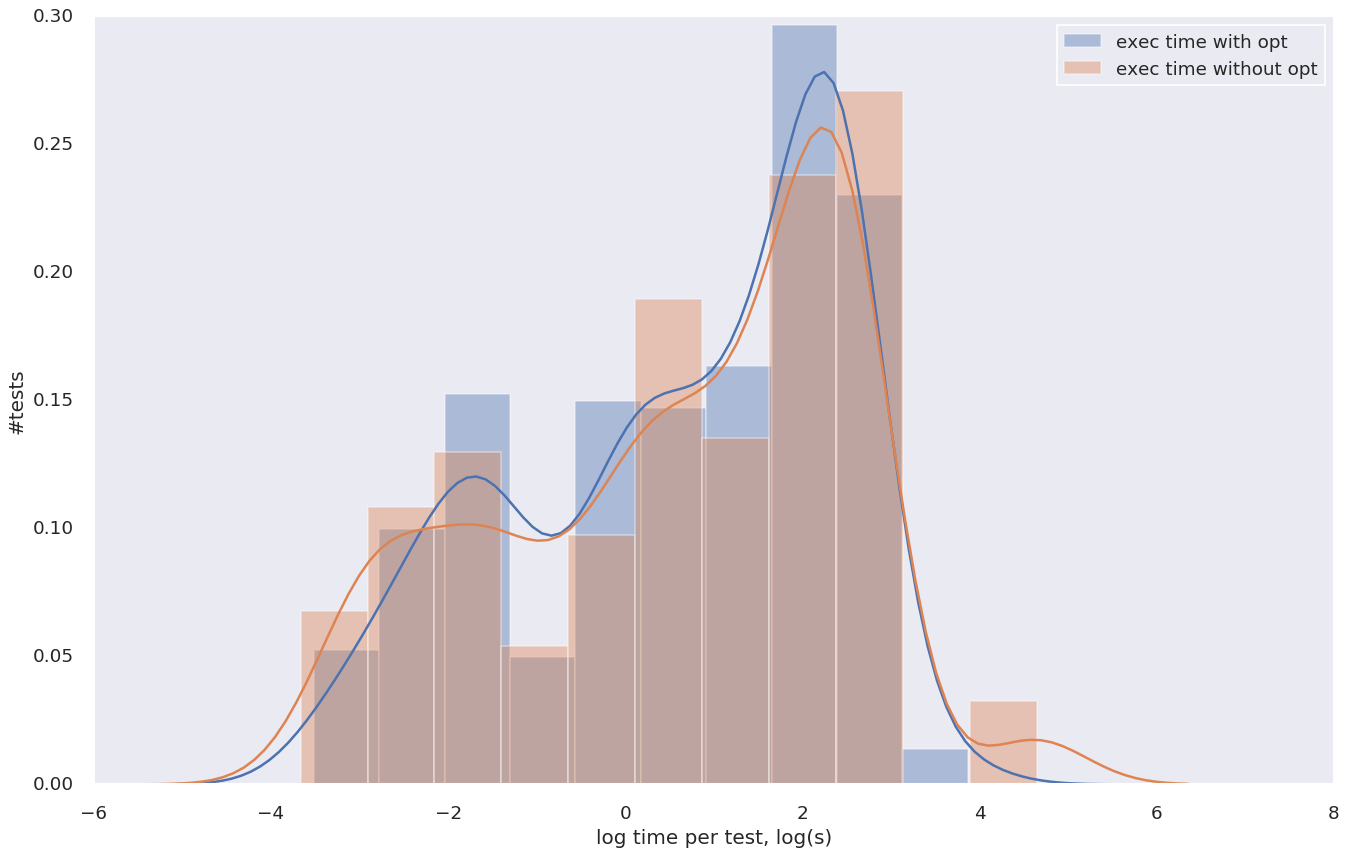

In [153]:
make_distplots(data_points_exec, data_points_exec_20, log=True)

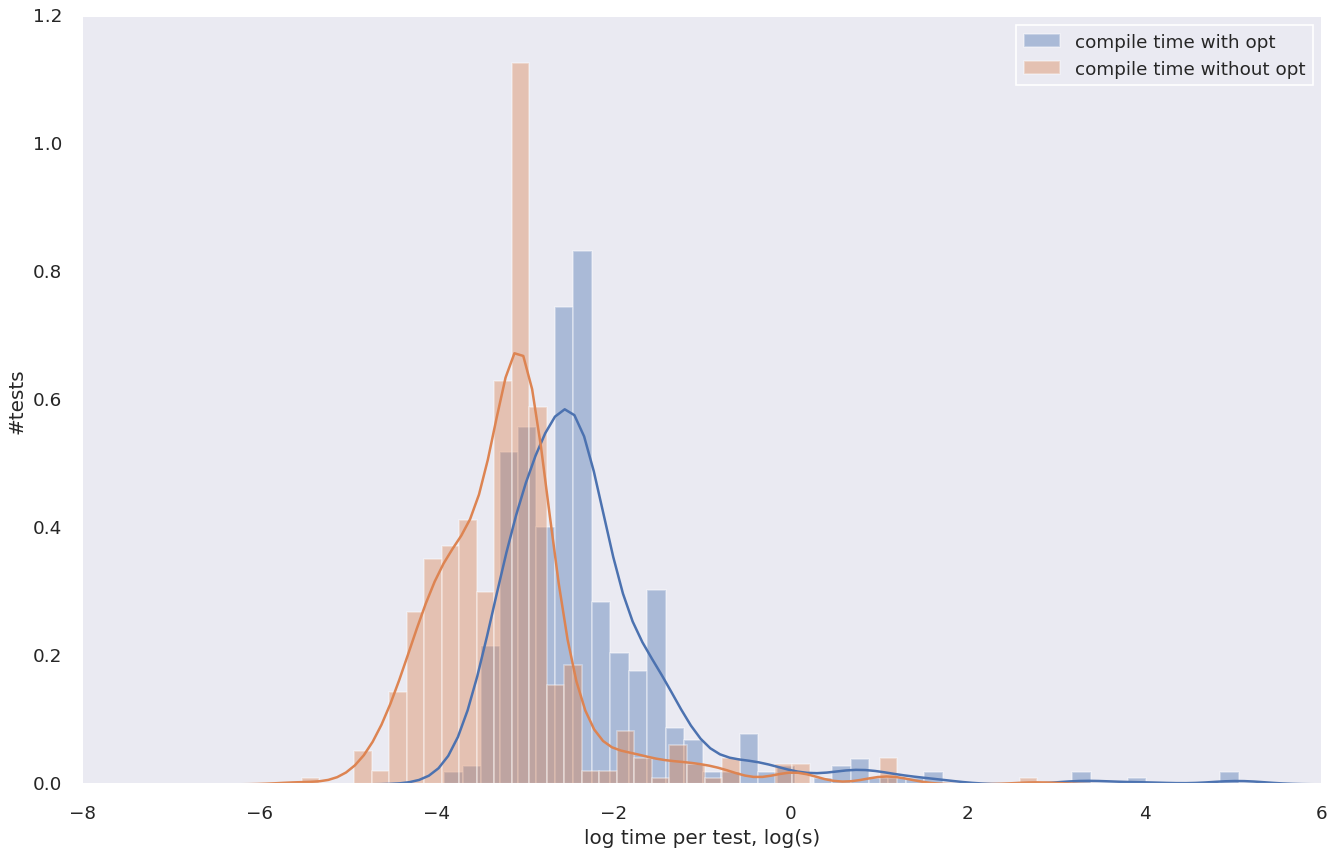

In [154]:
make_distplots(data_points_compile, data_points_compile_20, lab="compile")

In [125]:
sizes = np.array([d[0][0] for d in data_points_exec_20])
times = np.array([d[1] for d in data_points_exec_20])

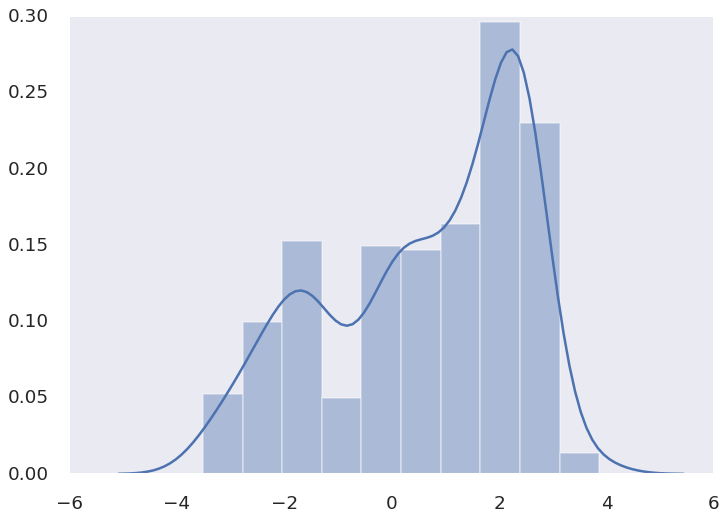

In [128]:
sns.distplot(np.log(times))

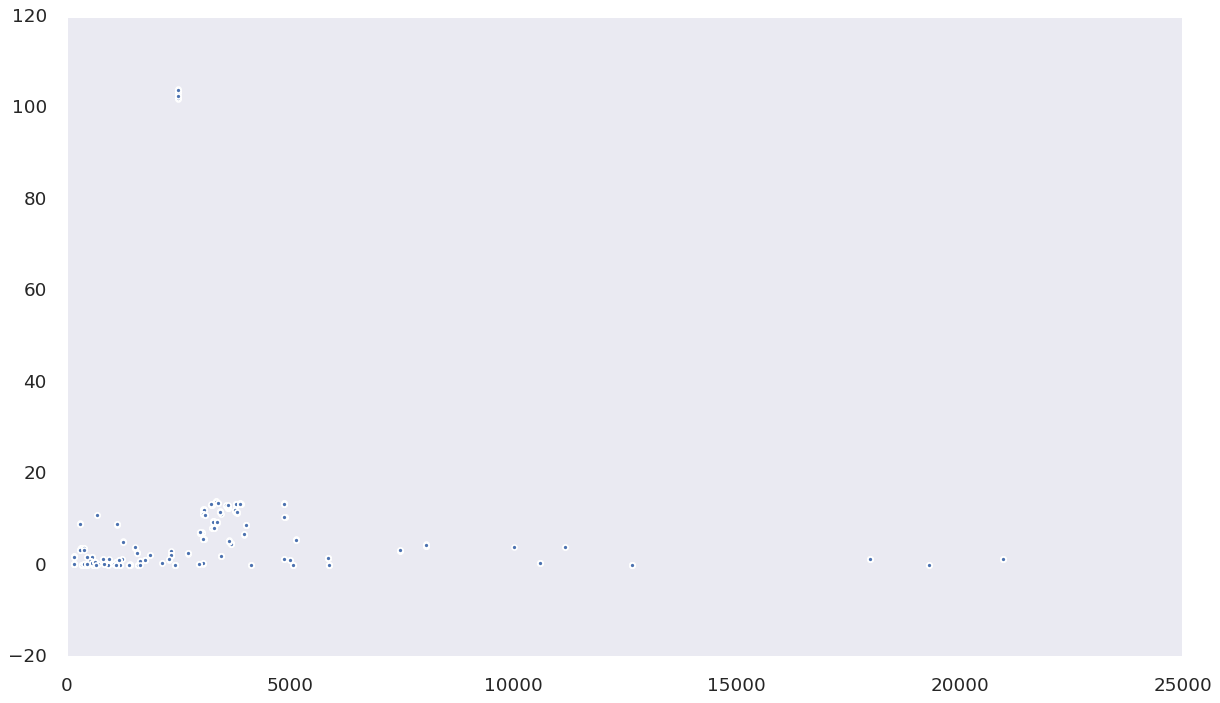

Log times per test


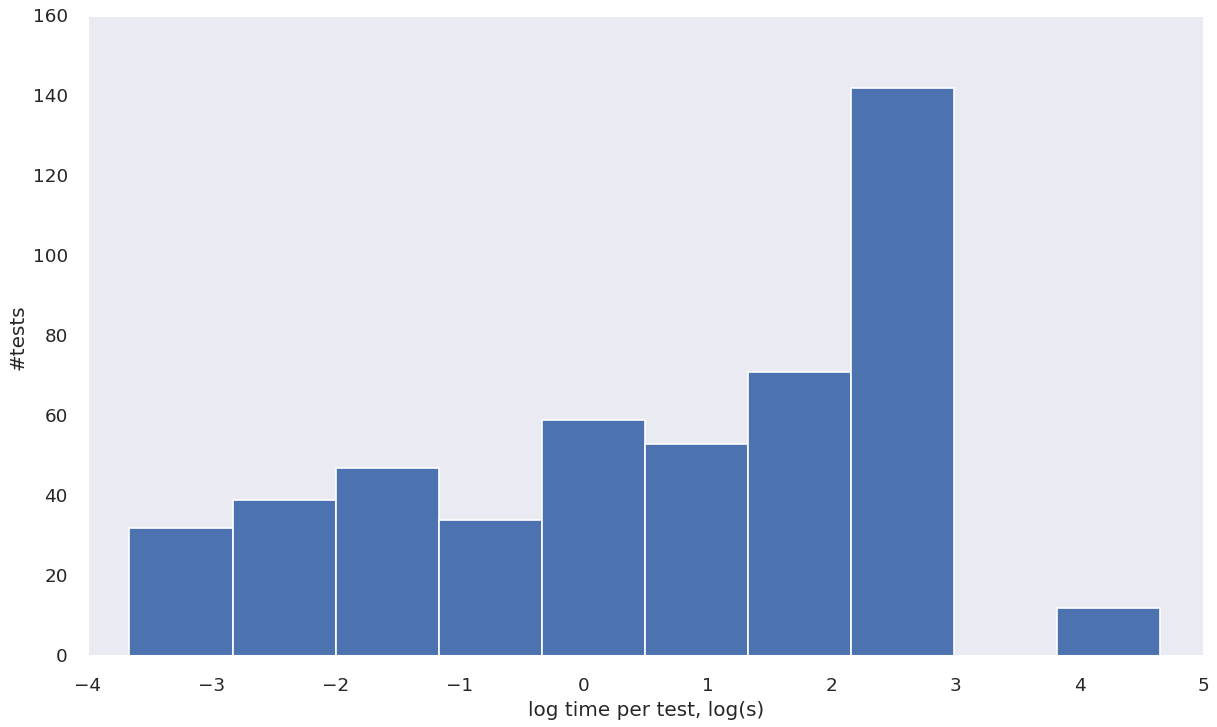

Log test sizes


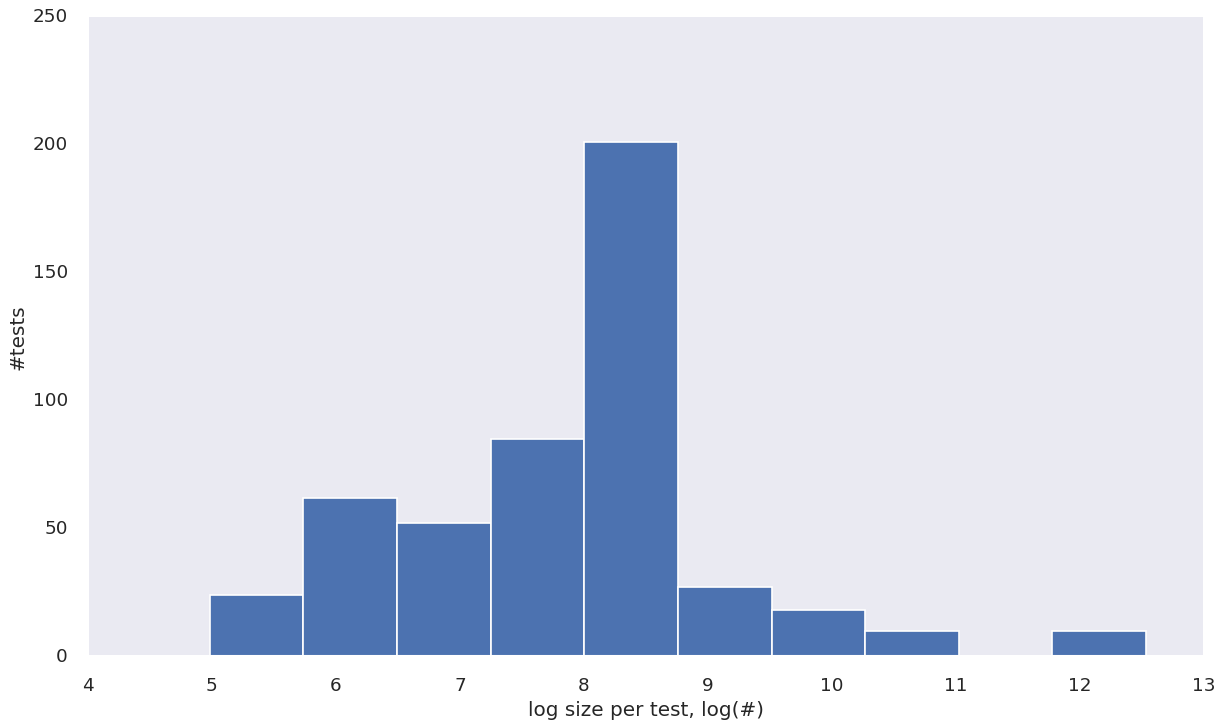

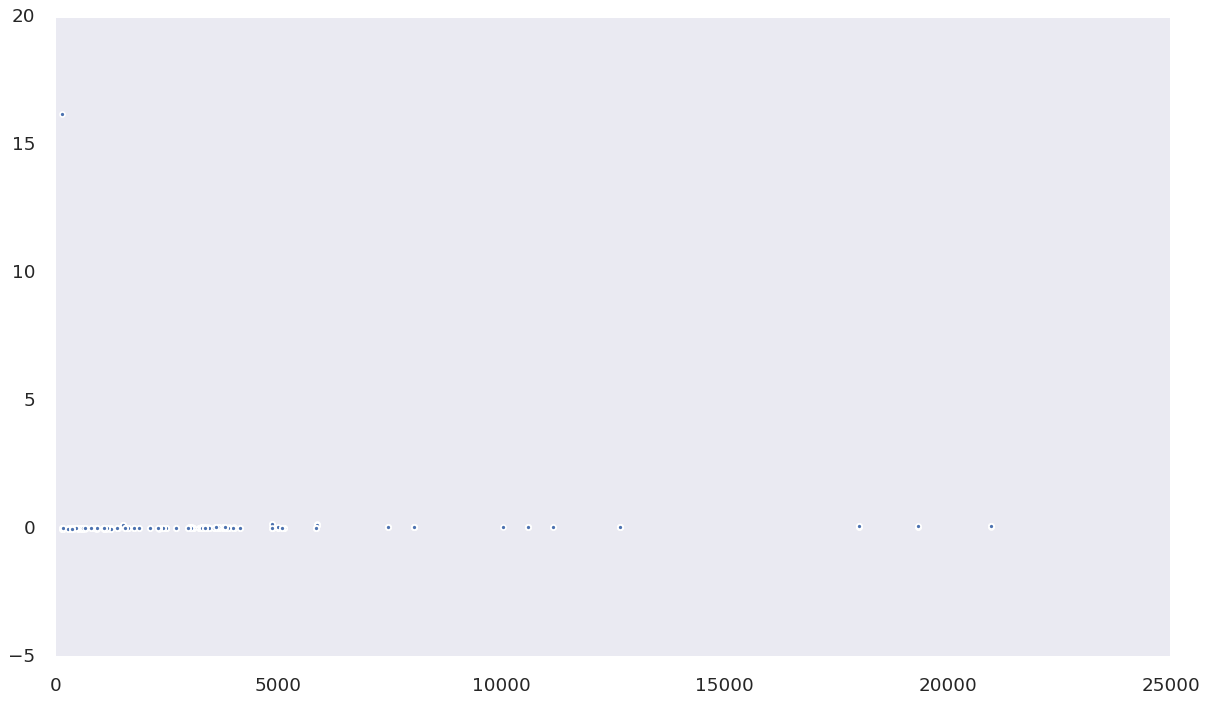

Log times per test


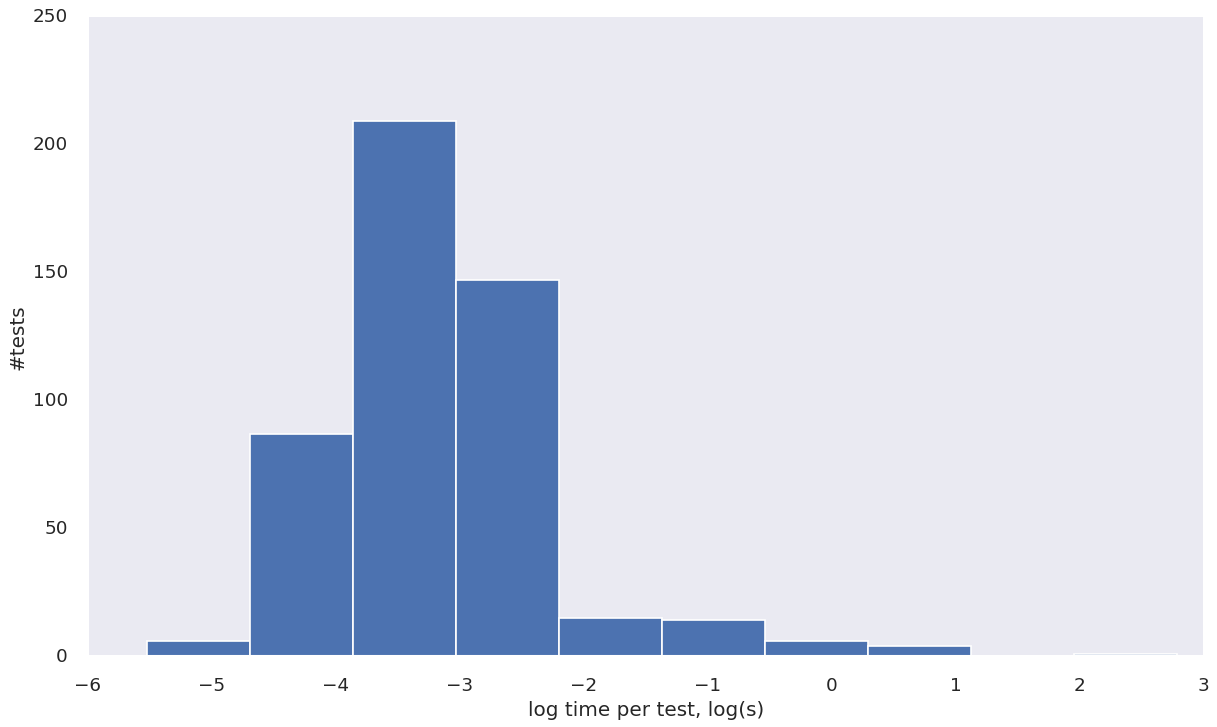

Log test sizes


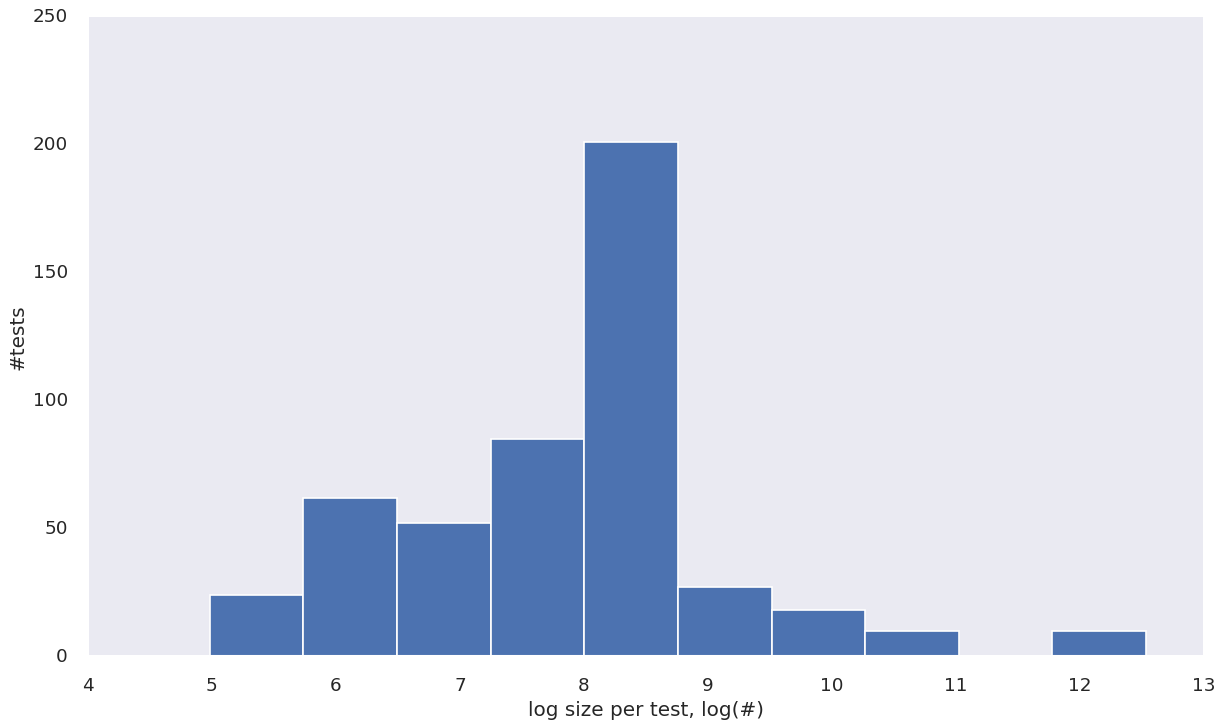

In [83]:
make_plots(data_points_exec)
make_plots(data_points_compile)